### Import Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import json

In [2]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Text processing
import re
import string
from collections import Counter

In [4]:
# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


### Download NLTK Data

In [5]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
# Machine Learning - Traditional Models
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier

In [7]:
# Metrics and Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc,
    roc_auc_score, precision_recall_curve, average_precision_score
)
from sklearn.preprocessing import label_binarize

In [8]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

### LOAD DATASETS

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
train_path = '/content/drive/MyDrive/Emotion_Text/Train_dataset.jsonl'
test_path = '/content/drive/MyDrive/Emotion_Text/Test_dataset.jsonl'
val_path = '/content/drive/MyDrive/Emotion_Text/Validation_dataset.jsonl'

In [11]:
def load_jsonl_to_df(path):
    data = []
    with open(path, 'r') as f:
        for line in f:
            line = line.strip()
            if line:
                try:
                    data.append(json.loads(line))
                except json.JSONDecodeError as e:
                    print(f"Skipping malformed JSON line in {path}: {line} - Error: {e}")
    return pd.DataFrame(data)

print("Loading train_df...")
train_df = load_jsonl_to_df(train_path)

print("Loading test_df...")
test_df = load_jsonl_to_df(test_path)

print("Loading val_df...")
val_df = load_jsonl_to_df(val_path)

print("DataFrames loaded successfully.")

Loading train_df...
Loading test_df...
Loading val_df...
DataFrames loaded successfully.


In [12]:
import os

# List the contents of the Emotion_Text directory in your Google Drive
# This will help you verify the correct file names and paths.

drive_path = '/content/drive/MyDrive/Emotion_Text/'

if os.path.exists(drive_path):
    print(f"Contents of {drive_path}:")
    for item in os.listdir(drive_path):
        print(f"- {item}")
else:
    print(f"The directory '{drive_path}' does not exist. Please ensure your Google Drive is mounted and the path is correct.")

Contents of /content/drive/MyDrive/Emotion_Text/:
- Test_dataset.jsonl
- Train_dataset.jsonl
- Validation_dataset.jsonl


In [13]:
train_df

text  label
0      i am just so sick of feeling like this and i j...      3
1      i do know that i am not ready to feel any roma...      2
2      i would being feeling strange or nauseous so i...      4
3       i feel agitated of the time running so real slow      4
4      ive worked particularly hard with this year on...      4
...                                                  ...    ...
15995  i need to make time for me and for doing thing...      2
15996  i feel this especially when i think back to si...      2
15997  i have discovered that every time i feel like ...      3
15998  i am starting to feel sorry for the muppet who...      0
15999  i do get lucky i just feel nervous about how b...      4

[16000 rows x 2 columns]

In [14]:
test_df

text  label
0     i feel enraged by the amount of people partici...      3
1     i am so ready to learn more and feel invigorat...      1
2     i but i have to say i am loving my house and w...      1
3     i feel her kicking i stop and just focus on he...      5
4     i feel proud of how he quickly picks up the co...      1
...                                                 ...    ...
1995  i have more energy then the first weeks and fe...      5
1996                        i feel slightly heartbroken      0
1997  i feel i can safely assume that either hes bee...      0
1998  i feel like an emotional pretzel at times twis...      0
1999                     i feel festive leave a comment      1

[2000 rows x 2 columns]

In [15]:
val_df

text  label
0                       i am alone in feeling uncertain      4
1     i want them to have time to get different loca...      1
2     i am also feeling a little unsure of how i fee...      4
3     i remember feeling as innocent as she looked t...      1
4     i am quite done with being made to feel like a...      0
...                                                 ...    ...
1995  im just gonna skip the gory details because by...      2
1996  i is distraught her eyes go so wide and glazed...      5
1997  i have spent a lot of my life feeling unhappy ...      0
1998  i remember watching and feeling a little surpr...      5
1999                    im feeling very petty right now      3

[2000 rows x 2 columns]

In [16]:
print(f"\nTotal Samples: {len(train_df) + len(val_df) + len(test_df)}")


Total Samples: 20000


In [17]:
# Emotion labels mapping
emotion_labels = {
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
}

In [18]:
# Add emotion names to dataframes
train_df['emotion_name'] = train_df['label'].map(emotion_labels)
val_df['emotion_name'] = val_df['label'].map(emotion_labels)
test_df['emotion_name'] = test_df['label'].map(emotion_labels)

In [19]:
print("\n DATASET INFORMATION:")
train_df.info()


 DATASET INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          16000 non-null  object
 1   label         16000 non-null  int64 
 2   emotion_name  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


In [20]:
train_df

text  label emotion_name
0      i am just so sick of feeling like this and i j...      3        Anger
1      i do know that i am not ready to feel any roma...      2         Love
2      i would being feeling strange or nauseous so i...      4         Fear
3       i feel agitated of the time running so real slow      4         Fear
4      ive worked particularly hard with this year on...      4         Fear
...                                                  ...    ...          ...
15995  i need to make time for me and for doing thing...      2         Love
15996  i feel this especially when i think back to si...      2         Love
15997  i have discovered that every time i feel like ...      3        Anger
15998  i am starting to feel sorry for the muppet who...      0      Sadness
15999  i do get lucky i just feel nervous about how b...      4         Fear

[16000 rows x 3 columns]

### BASIC DATA EXPLORATION

In [21]:
print("BASIC STATISTICS:")
print(train_df.describe())

BASIC STATISTICS:
              label
count  16000.000000
mean       2.499938
std        1.707830
min        0.000000
25%        1.000000
50%        2.500000
75%        4.000000
max        5.000000


In [22]:
print("\n MISSING VALUES CHECK:")
print("-" * 40)
print(f"Training Set Missing Values:\n{train_df.isnull().sum()}")
print(f"\nValidation Set Missing Values:\n{val_df.isnull().sum()}")
print(f"\nTest Set Missing Values:\n{test_df.isnull().sum()}")


 MISSING VALUES CHECK:
----------------------------------------
Training Set Missing Values:
text            0
label           0
emotion_name    0
dtype: int64

Validation Set Missing Values:
text            0
label           0
emotion_name    0
dtype: int64

Test Set Missing Values:
text            0
label           0
emotion_name    0
dtype: int64


In [23]:
# Check for duplicates
print("DUPLICATE CHECK:")
print(f"Training Set Duplicates: {train_df.duplicated().sum()}")
print(f"Validation Set Duplicates: {val_df.duplicated().sum()}")
print(f"Test Set Duplicates: {test_df.duplicated().sum()}")

DUPLICATE CHECK:
Training Set Duplicates: 0
Validation Set Duplicates: 0
Test Set Duplicates: 0


In [24]:
# Calculate distributions
train_dist = train_df['emotion_name'].value_counts().sort_index()
val_dist = val_df['emotion_name'].value_counts().sort_index()
test_dist = test_df['emotion_name'].value_counts().sort_index()

In [25]:
print("CLASS DISTRIBUTION:")
print("Training Set:")
print(train_dist)
print(f"\nValidation Set:")
print(val_dist)
print(f"\nTest Set:")
print(test_dist)

CLASS DISTRIBUTION:
Training Set:
emotion_name
Anger       2667
Fear        2667
Joy         2666
Love        2667
Sadness     2667
Surprise    2666
Name: count, dtype: int64

Validation Set:
emotion_name
Anger       334
Fear        333
Joy         333
Love        333
Sadness     333
Surprise    334
Name: count, dtype: int64

Test Set:
emotion_name
Anger       333
Fear        334
Joy         334
Love        333
Sadness     333
Surprise    333
Name: count, dtype: int64


### Visualization 1: Class Distribution - Bar Chart

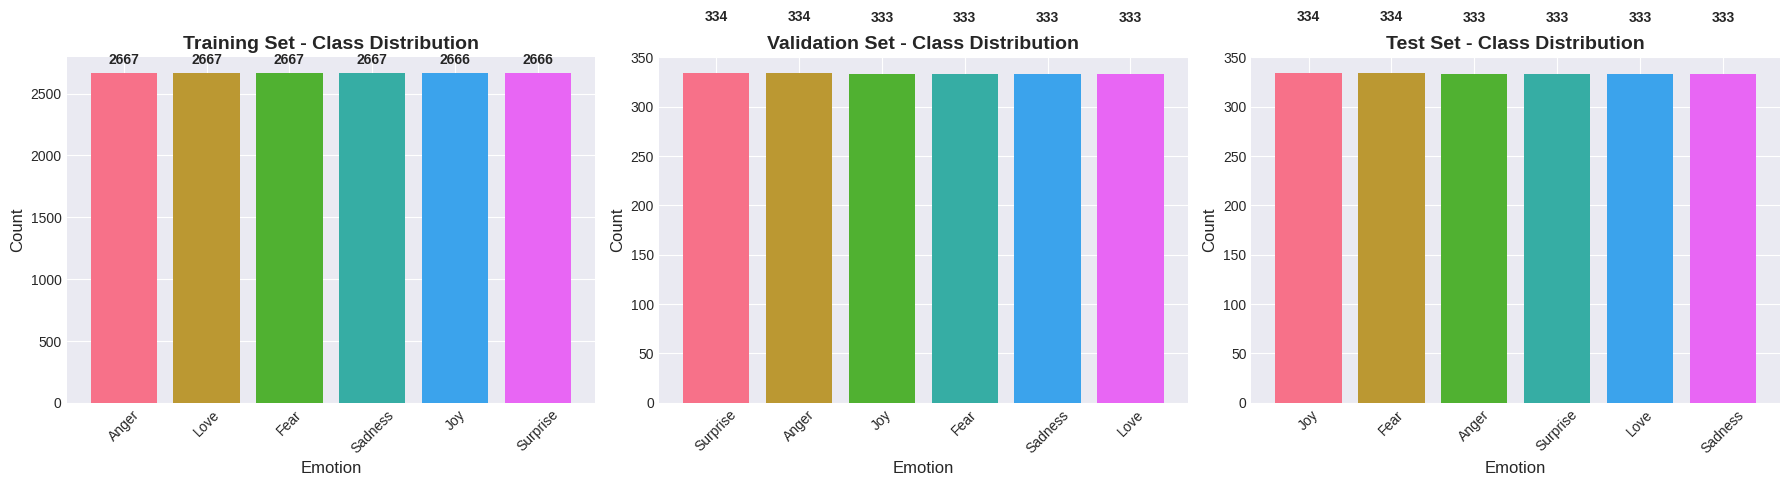

In [26]:
# Visualization 1: Class Distribution - Bar Chart
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (df, title) in enumerate([(train_df, 'Training Set'),
                                     (val_df, 'Validation Set'),
                                     (test_df, 'Test Set')]):
    emotion_counts = df['emotion_name'].value_counts()
    axes[idx].bar(emotion_counts.index, emotion_counts.values,
                  color=sns.color_palette("husl", 6))
    axes[idx].set_title(f'{title} - Class Distribution', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Emotion', fontsize=12)
    axes[idx].set_ylabel('Count', fontsize=12)
    axes[idx].tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for i, v in enumerate(emotion_counts.values):
        axes[idx].text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('class_distribution_bar.png', dpi=300, bbox_inches='tight')
plt.show()

### Visualization 2: Pie Chart - Training Set Distribution

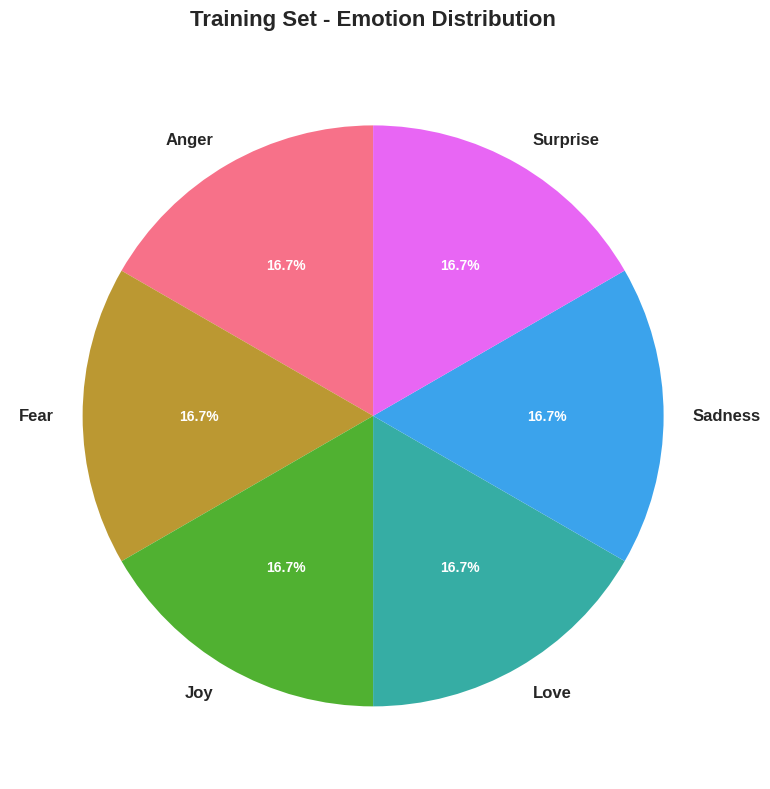

In [27]:
# Visualization 2: Pie Chart - Training Set Distribution
fig, ax = plt.subplots(figsize=(10, 8))
colors = sns.color_palette("husl", 6)
wedges, texts, autotexts = ax.pie(
    train_dist.values,
    labels=train_dist.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)
ax.set_title('Training Set - Emotion Distribution', fontsize=16, fontweight='bold', pad=20)
plt.setp(autotexts, size=10, weight="bold", color="white")
plt.tight_layout()
plt.savefig('emotion_distribution_pie.png', dpi=300, bbox_inches='tight')
plt.show()

### Calculate text lengths

In [28]:
# Calculate text lengths
train_df['text_length'] = train_df['text'].apply(len)
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))
print(" TEXT LENGTH STATISTICS:")
print(train_df[['text_length', 'word_count']].describe())

 TEXT LENGTH STATISTICS:
        text_length    word_count
count  16000.000000  16000.000000
mean      98.013063     19.386937
std       56.306394     11.065345
min        6.000000      2.000000
25%       54.750000     11.000000
50%       87.000000     17.000000
75%      129.000000     26.000000
max      356.000000     66.000000


### Visualization 3: Text Length Distribution by Emotion

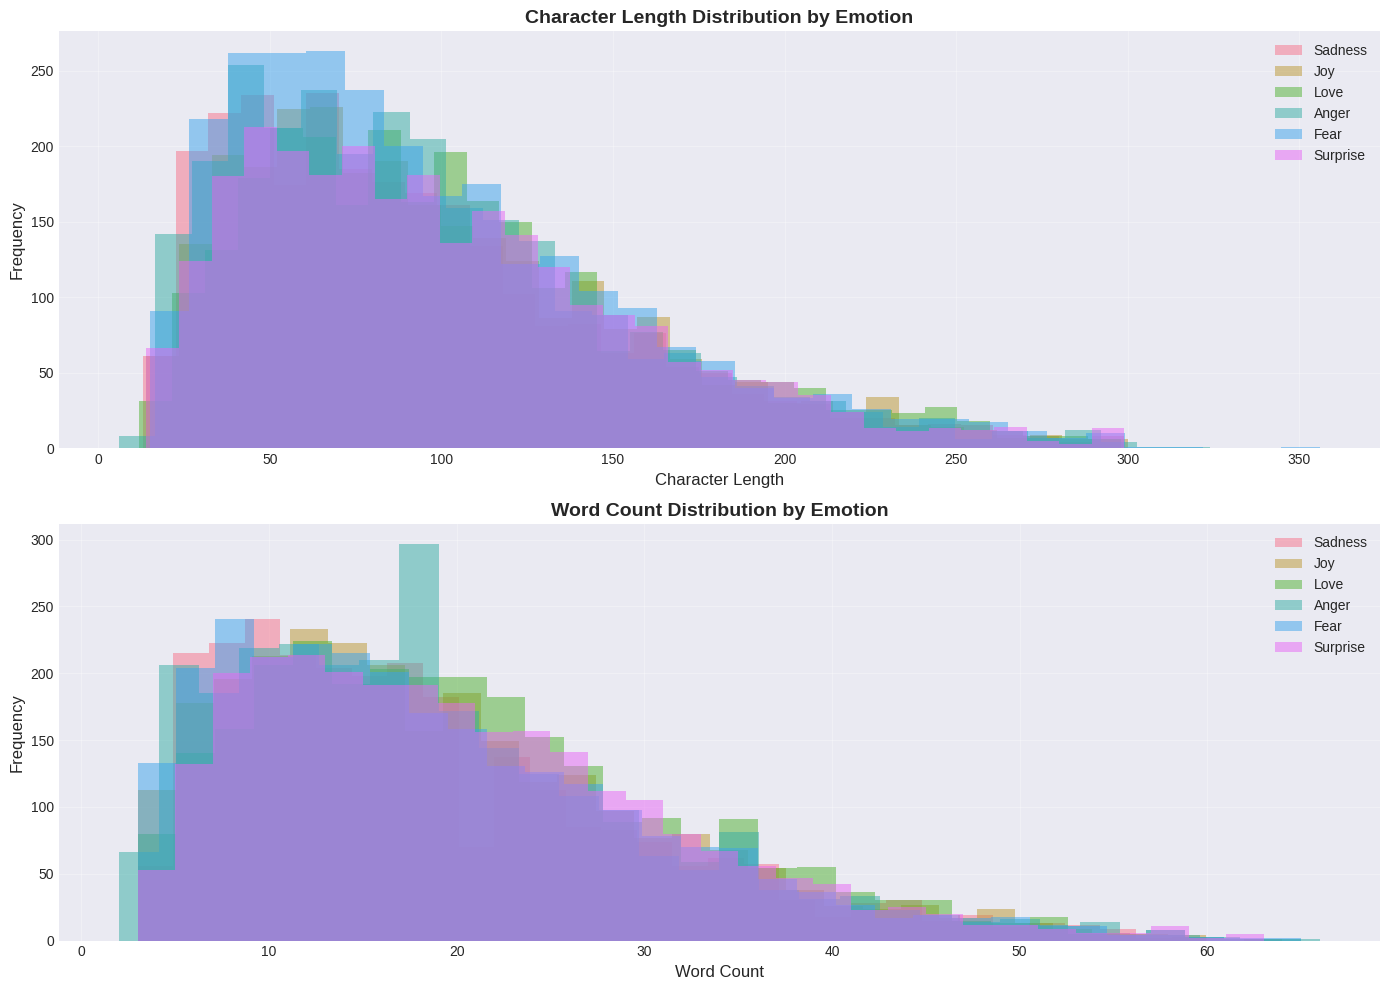

In [29]:
# Visualization 3: Text Length Distribution by Emotion
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Character length distribution
for emotion in emotion_labels.values():
    data = train_df[train_df['emotion_name'] == emotion]['text_length']
    axes[0].hist(data, alpha=0.5, label=emotion, bins=30)

axes[0].set_title('Character Length Distribution by Emotion', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Character Length', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Word count distribution
for emotion in emotion_labels.values():
    data = train_df[train_df['emotion_name'] == emotion]['word_count']
    axes[1].hist(data, alpha=0.5, label=emotion, bins=30)

axes[1].set_title('Word Count Distribution by Emotion', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Word Count', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('text_length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### Visualization 4: Box Plot - Text Length by Emotion

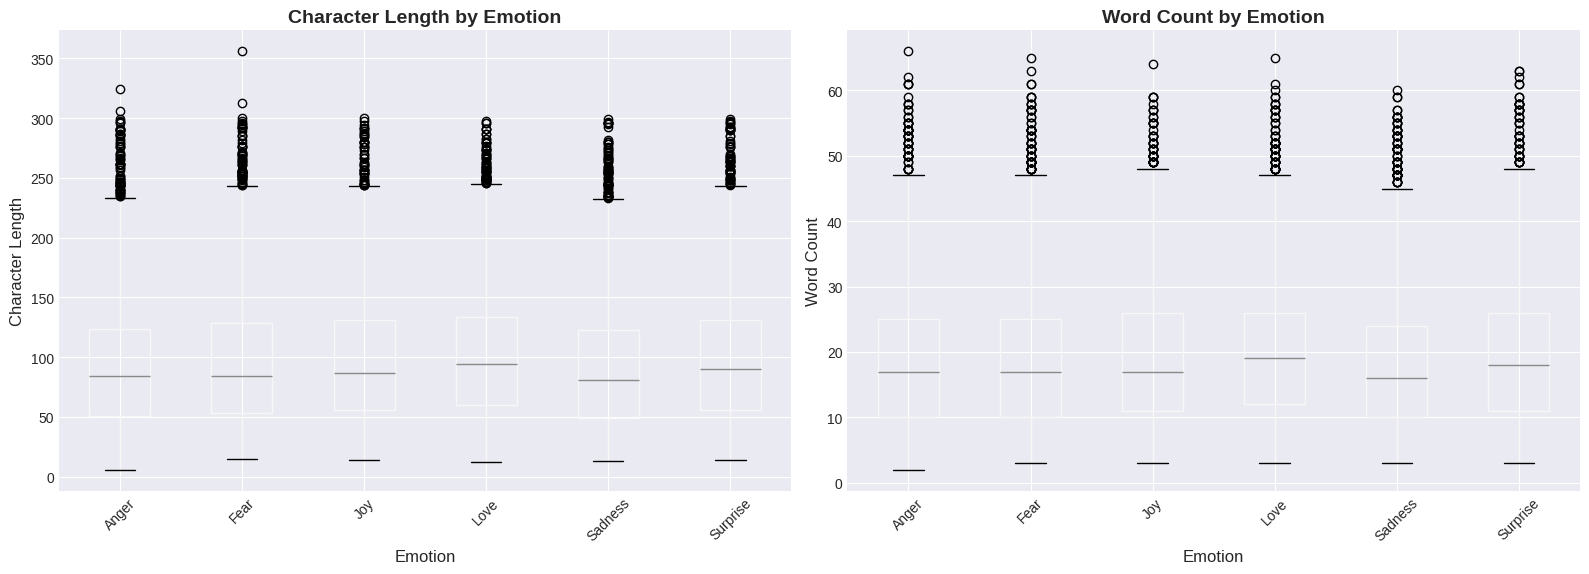

In [30]:
# Visualization 4: Box Plot - Text Length by Emotion
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Character length box plot
train_df.boxplot(column='text_length', by='emotion_name', ax=axes[0])
axes[0].set_title('Character Length by Emotion', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Emotion', fontsize=12)
axes[0].set_ylabel('Character Length', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
plt.sca(axes[0])
plt.xticks(rotation=45)

# Word count box plot
train_df.boxplot(column='word_count', by='emotion_name', ax=axes[1])
axes[1].set_title('Word Count by Emotion', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Emotion', fontsize=12)
axes[1].set_ylabel('Word Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
plt.sca(axes[1])
plt.xticks(rotation=45)

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.savefig('text_length_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

### TEXT PREPROCESSING CLASS

In [31]:
class TextPreprocessor:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        # Keep negation words as they're important for emotion
        self.stop_words -= {'not', 'no', 'nor', 'neither', 'never', 'none', 'nobody', 'nothing'}

    def remove_urls(self, text):
        """Remove URLs from text"""
        return re.sub(r'http\S+|www.\S+', '', text)

    def remove_mentions(self, text):
        """Remove @ mentions"""
        return re.sub(r'@\w+', '', text)

    def process_hashtags(self, text):
        """Remove # but keep the text"""
        return re.sub(r'#(\w+)', r'\1', text)

    def remove_special_chars(self, text):
        """Remove special characters and punctuation"""
        # Keep basic punctuation that might indicate emotion (! ?)
        text = re.sub(r'[^\w\s!?]', ' ', text)
        return text

    def to_lowercase(self, text):
        """Convert text to lowercase"""
        return text.lower()

    def normalize_whitespace(self, text):
        """Normalize whitespace"""
        return ' '.join(text.split())

    def remove_numbers(self, text):
        """Remove numbers"""
        return re.sub(r'\d+', '', text)

    def tokenize(self, text):
        """Tokenize text"""
        return word_tokenize(text)

    def remove_stopwords(self, tokens):
        """Remove stopwords"""
        return [token for token in tokens if token.lower() not in self.stop_words]

    def lemmatize(self, tokens):
        """Lemmatize tokens"""
        return [self.lemmatizer.lemmatize(token) for token in tokens]

    def preprocess(self, text, keep_tokens=False):

        # Step 1: Remove URLs
        text = self.remove_urls(text)

        # Step 2: Remove mentions
        text = self.remove_mentions(text)

        # Step 3: Process hashtags
        text = self.process_hashtags(text)

        # Step 4: Convert to lowercase
        text = self.to_lowercase(text)

        # Step 5: Remove special characters
        text = self.remove_special_chars(text)

        # Step 6: Remove numbers
        text = self.remove_numbers(text)

        # Step 7: Normalize whitespace
        text = self.normalize_whitespace(text)

        # Step 8: Tokenization
        tokens = self.tokenize(text)

        # Step 9: Remove stopwords
        tokens = self.remove_stopwords(tokens)

        # Step 10: Lemmatization
        tokens = self.lemmatize(tokens)

        # Remove empty tokens
        tokens = [t for t in tokens if len(t) > 1]

        if keep_tokens:
            return tokens
        else:
            return ' '.join(tokens)

# Initialize preprocessor
preprocessor = TextPreprocessor()

In [32]:
print("\n Text Preprocessor initialized")
print("\nPreprocessing Steps:")
print("  1. URL Removal")
print("  2. Mention Removal (@username)")
print("  3. Hashtag Processing (keep text, remove #)")
print("  4. Lowercase Conversion")
print("  5. Special Character Removal")
print("  6. Number Removal")
print("  7. Whitespace Normalization")
print("  8. Tokenization")
print("  9. Stopword Removal (keeping negations)")
print(" 10. Lemmatization")


 Text Preprocessor initialized

Preprocessing Steps:
  1. URL Removal
  2. Mention Removal (@username)
  3. Hashtag Processing (keep text, remove #)
  4. Lowercase Conversion
  5. Special Character Removal
  6. Number Removal
  7. Whitespace Normalization
  8. Tokenization
  9. Stopword Removal (keeping negations)
 10. Lemmatization


### BEFORE AND AFTER PREPROCESSING

In [33]:
nltk.download('punkt_tab')
# Select sample tweets for demonstration
sample_texts = train_df.sample(5, random_state=42)['text'].tolist()

print("BEFORE AND AFTER PREPROCESSING:")

preprocessing_examples = []
for i, text in enumerate(sample_texts, 1):
    cleaned = preprocessor.preprocess(text)
    preprocessing_examples.append({
        'Original': text,
        'Cleaned': cleaned
    })
    print(f"\nExample {i}:")
    print(f"Original: {text}")
    print(f"Cleaned:  {cleaned}")

BEFORE AND AFTER PREPROCESSING:


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



Example 1:
Original: ive reverted back to my original blog title and purpose because honestly ive never strayed from my initial feeling about the delicate balance amp integration of woman and mother
Cleaned:  ive reverted back original blog title purpose honestly ive never strayed initial feeling delicate balance amp integration woman mother

Example 2:
Original: i feel hated i feel like i dont belong and more and more i feel that i want to die
Cleaned:  feel hated feel like dont belong feel want die

Example 3:
Original: i look at the wall ok feeling slightly irate
Cleaned:  look wall ok feeling slightly irate

Example 4:
Original: i can still feel a tender area when i touch it
Cleaned:  still feel tender area touch

Example 5:
Original: i wasnt really feeling up to reviewiing it on ba but i was pretty impressed
Cleaned:  wasnt really feeling reviewiing ba pretty impressed


### Visualization of preprocessing effect

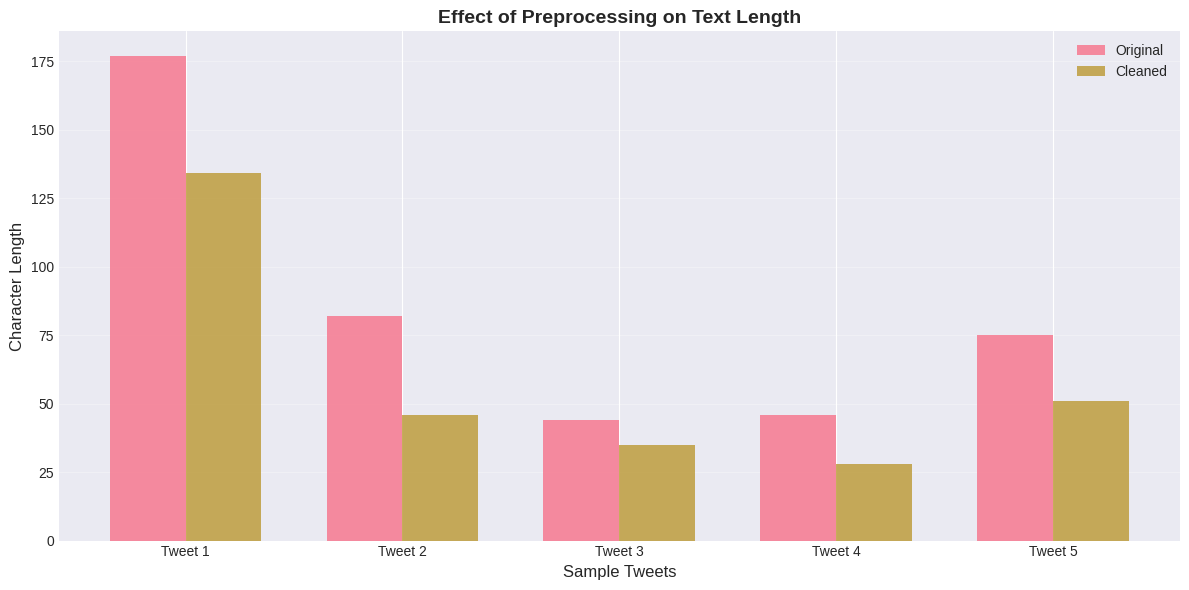

In [34]:
# Create visualization of preprocessing effect
fig, ax = plt.subplots(figsize=(12, 6))

original_lengths = [len(ex['Original']) for ex in preprocessing_examples]
cleaned_lengths = [len(ex['Cleaned']) for ex in preprocessing_examples]

x = np.arange(len(preprocessing_examples))
width = 0.35

bars1 = ax.bar(x - width/2, original_lengths, width, label='Original', alpha=0.8)
bars2 = ax.bar(x + width/2, cleaned_lengths, width, label='Cleaned', alpha=0.8)

ax.set_xlabel('Sample Tweets', fontsize=12)
ax.set_ylabel('Character Length', fontsize=12)
ax.set_title('Effect of Preprocessing on Text Length', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([f'Tweet {i+1}' for i in range(len(preprocessing_examples))])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('preprocessing_effect.png', dpi=300, bbox_inches='tight')
plt.show()

### APPLY PREPROCESSING

In [35]:
# Apply preprocessing
print("Processing training set...")
train_df['cleaned_text'] = train_df['text'].apply(lambda x: preprocessor.preprocess(x))

print("Processing validation set...")
val_df['cleaned_text'] = val_df['text'].apply(lambda x: preprocessor.preprocess(x))

print("Processing test set...")
test_df['cleaned_text'] = test_df['text'].apply(lambda x: preprocessor.preprocess(x))

print("Preprocessing completed for all datasets")

Processing training set...
Processing validation set...
Processing test set...
Preprocessing completed for all datasets


In [36]:
# Check for empty texts after preprocessing
empty_train = train_df[train_df['cleaned_text'].str.strip() == ''].shape[0]
empty_val = val_df[val_df['cleaned_text'].str.strip() == ''].shape[0]
empty_test = test_df[test_df['cleaned_text'].str.strip() == ''].shape[0]

print(f"\nEmpty texts after preprocessing:")
print(f"  Training: {empty_train}")
print(f"  Validation: {empty_val}")
print(f"  Test: {empty_test}")


Empty texts after preprocessing:
  Training: 1
  Validation: 0
  Test: 0


In [37]:
if empty_train > 0:
    train_df = train_df[train_df['cleaned_text'].str.strip() != '']
    print(f" Removed {empty_train} empty texts from training set")

 Removed 1 empty texts from training set


In [38]:
# Get all tokens
all_tokens = []
for text in train_df['cleaned_text']:
    all_tokens.extend(text.split())

# Vocabulary statistics
vocab_size = len(set(all_tokens))
total_tokens = len(all_tokens)
avg_tokens_per_doc = total_tokens / len(train_df)

print(f" VOCABULARY STATISTICS:")
print(f"  Total unique words (vocabulary size): {vocab_size:,}")
print(f"  Total tokens: {total_tokens:,}")
print(f"  Average tokens per document: {avg_tokens_per_doc:.2f}")

 VOCABULARY STATISTICS:
  Total unique words (vocabulary size): 13,733
  Total tokens: 152,849
  Average tokens per document: 9.55


### MOST COMMON WORDS

In [39]:
# Most common words
word_freq = Counter(all_tokens)
most_common = word_freq.most_common(30)

print(f" TOP 30 MOST FREQUENT WORDS:")
print("-" * 80)
for word, freq in most_common:
    print(f"  {word:.<30} {freq:>6,}")


 TOP 30 MOST FREQUENT WORDS:
--------------------------------------------------------------------------------
  feel.......................... 11,298
  feeling.......................  5,630
  like..........................  2,745
  im............................  2,312
  not...........................  1,895
  time..........................  1,017
  really........................    991
  know..........................    908
  get...........................    851
  little........................    811
  people........................    723
  would.........................    683
  still.........................    683
  one...........................    678
  thing.........................    658
  make..........................    644
  think.........................    615
  day...........................    606
  ive...........................    602
  life..........................    595
  even..........................    594
  want..........................    591
  way.....

### Visualization: Top words

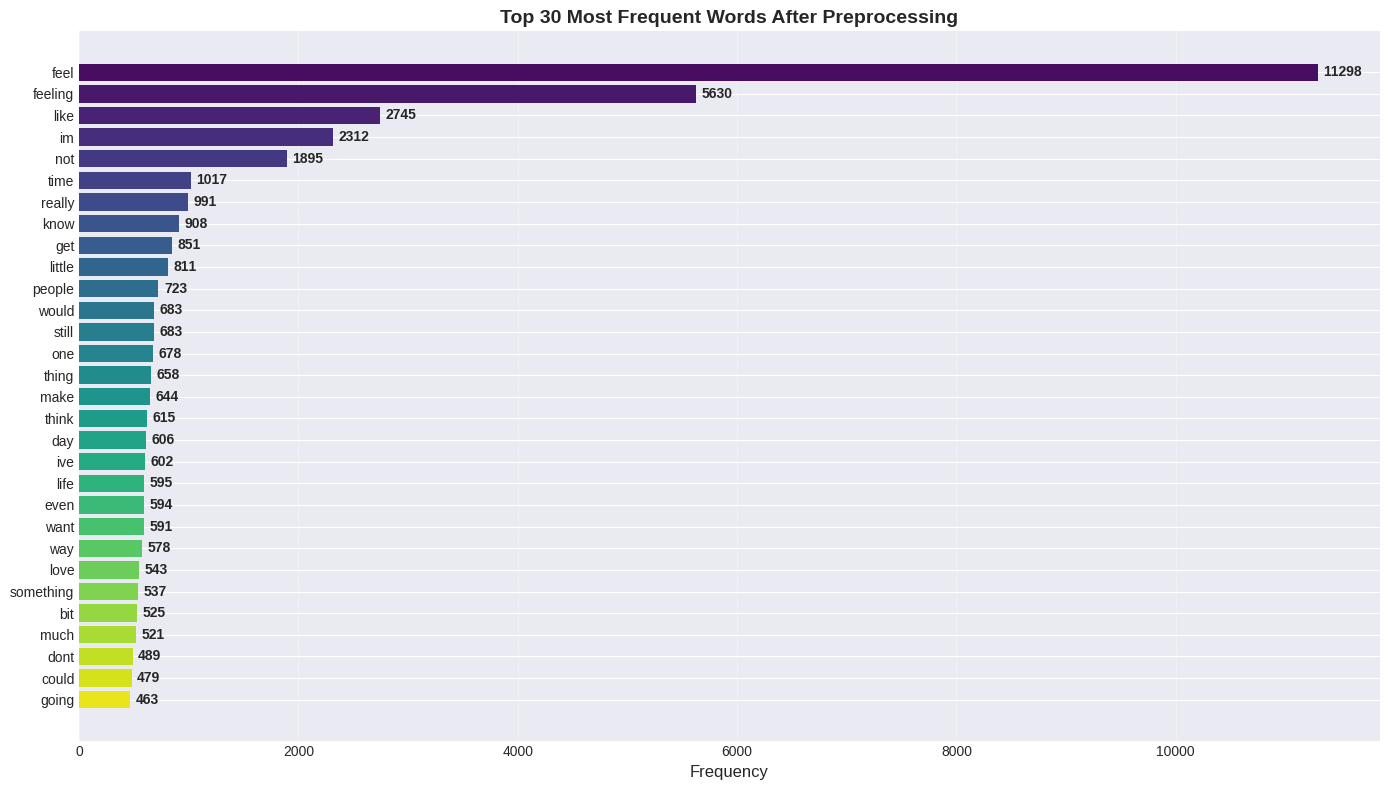

In [40]:
# Visualization: Top words
fig, ax = plt.subplots(figsize=(14, 8))
words, freqs = zip(*most_common)
ax.barh(range(len(words)), freqs, color=sns.color_palette("viridis", len(words)))
ax.set_yticks(range(len(words)))
ax.set_yticklabels(words)
ax.set_xlabel('Frequency', fontsize=12)
ax.set_title('Top 30 Most Frequent Words After Preprocessing', fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.grid(True, alpha=0.3, axis='x')

for i, v in enumerate(freqs):
    ax.text(v + 50, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('top_words_frequency.png', dpi=300, bbox_inches='tight')
plt.show()

In [41]:
# Get top words for each emotion
emotion_words = {}
for emotion in emotion_labels.values():
    emotion_texts = train_df[train_df['emotion_name'] == emotion]['cleaned_text']
    emotion_tokens = []
    for text in emotion_texts:
        emotion_tokens.extend(text.split())
    emotion_word_freq = Counter(emotion_tokens)
    emotion_words[emotion] = emotion_word_freq.most_common(10)

print(" TOP 10 WORDS FOR EACH EMOTION:")

for emotion, words in emotion_words.items():
    print(f"\n{emotion}:")
    for word, freq in words:
        print(f"  {word:.<25} {freq:>5,}")

 TOP 10 WORDS FOR EACH EMOTION:

Sadness:
  feel..................... 1,900
  feeling..................   935
  like.....................   491
  im.......................   387
  not......................   305
  time.....................   192
  know.....................   151
  really...................   150
  get......................   150
  little...................   128

Joy:
  feel..................... 1,984
  feeling..................   832
  like.....................   475
  im.......................   350
  not......................   301
  really...................   167
  time.....................   165
  make.....................   142
  know.....................   135
  one......................   130

Love:
  feel..................... 1,952
  feeling..................   873
  like.....................   560
  im.......................   367
  not......................   362
  love.....................   200
  really...................   172
  one......................

### Visualization: Top words by emotion

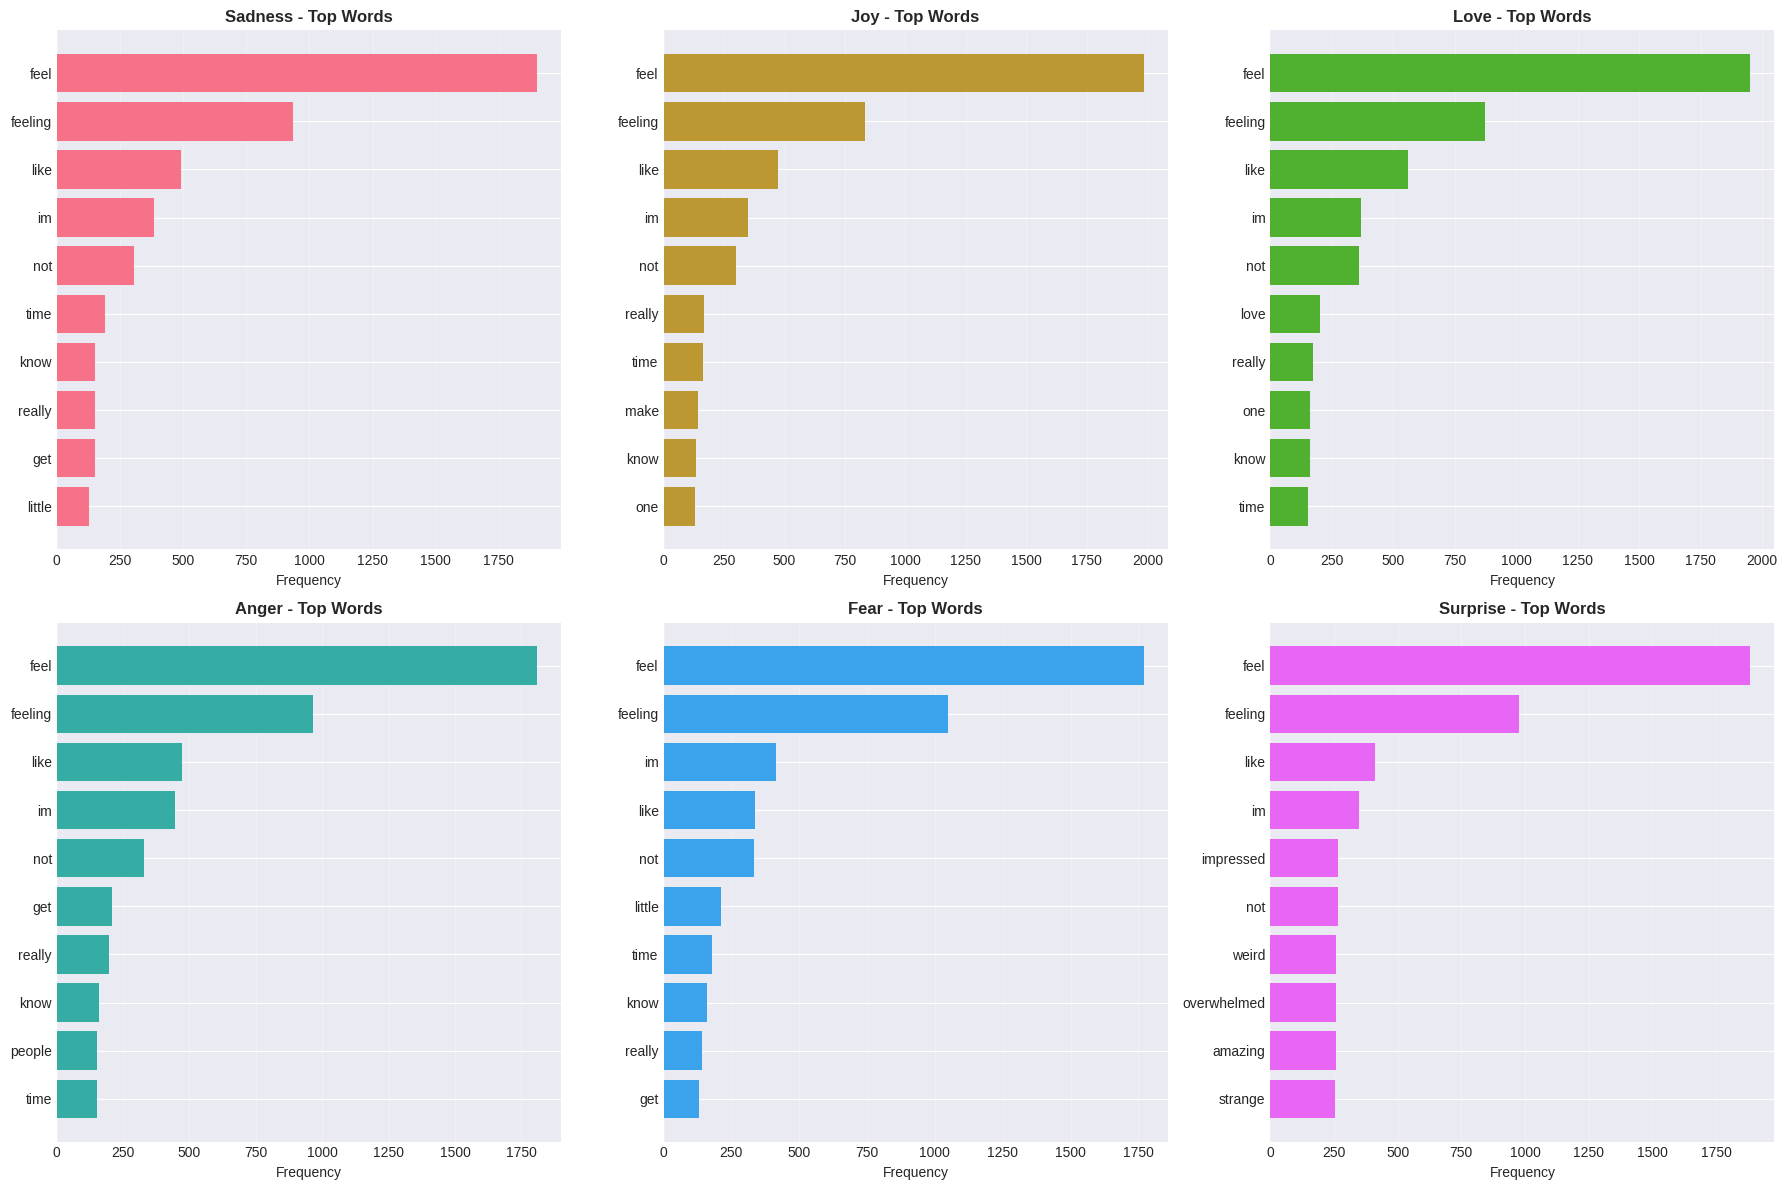

In [42]:
# Visualization: Top words by emotion
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (emotion, words) in enumerate(emotion_words.items()):
    word_list, freq_list = zip(*words)
    axes[idx].barh(range(len(word_list)), freq_list,
                   color=sns.color_palette("husl", 6)[idx])
    axes[idx].set_yticks(range(len(word_list)))
    axes[idx].set_yticklabels(word_list)
    axes[idx].set_xlabel('Frequency', fontsize=10)
    axes[idx].set_title(f'{emotion} - Top Words', fontsize=12, fontweight='bold')
    axes[idx].invert_yaxis()
    axes[idx].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('emotion_specific_words.png', dpi=300, bbox_inches='tight')
plt.show()

In [43]:
# Prepare data
X_train = train_df['cleaned_text'].values
y_train = train_df['label'].values

X_val = val_df['cleaned_text'].values
y_val = val_df['label'].values

X_test = test_df['cleaned_text'].values
y_test = test_df['label'].values


In [44]:
print(f"\n DATA SHAPES:")
print(f"  Training: {X_train.shape} samples")
print(f"  Validation: {X_val.shape} samples")
print(f"  Test: {X_test.shape} samples")



 DATA SHAPES:
  Training: (15999,) samples
  Validation: (2000,) samples
  Test: (2000,) samples


### TF-IDF FEATURE EXTRACTION

In [45]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),  # Unigrams and bigrams
    min_df=2,
    max_df=0.8,
    sublinear_tf=True
)


In [46]:
print("\n Fitting TF-IDF vectorizer on training data...")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"\n TF-IDF Vectorization completed")
print(f"  Feature dimensions: {X_train_tfidf.shape[1]}")
print(f"  Training matrix shape: {X_train_tfidf.shape}")
print(f"  Validation matrix shape: {X_val_tfidf.shape}")
print(f"  Test matrix shape: {X_test_tfidf.shape}")


 Fitting TF-IDF vectorizer on training data...

 TF-IDF Vectorization completed
  Feature dimensions: 5000
  Training matrix shape: (15999, 5000)
  Validation matrix shape: (2000, 5000)
  Test matrix shape: (2000, 5000)


### MODEL 1: MULTINOMIAL NAIVE BAYES

In [47]:
# MODEL 1: MULTINOMIAL NAIVE BAYES
print("\n" + "=" * 80)
print("MODEL 1: MULTINOMIAL NAIVE BAYES")
print("=" * 80)
print("\n Training Multinomial Naive Bayes...")
mnb_model = MultinomialNB(alpha=1.0)
mnb_model.fit(X_train_tfidf, y_train)


MODEL 1: MULTINOMIAL NAIVE BAYES

 Training Multinomial Naive Bayes...


MultinomialNB()

In [48]:
# Predictions
mnb_train_pred = mnb_model.predict(X_train_tfidf)
mnb_val_pred = mnb_model.predict(X_val_tfidf)
mnb_test_pred = mnb_model.predict(X_test_tfidf)

In [49]:
# Training accuracy
mnb_train_acc = accuracy_score(y_train, mnb_train_pred)
mnb_val_acc = accuracy_score(y_val, mnb_val_pred)
mnb_test_acc = accuracy_score(y_test, mnb_test_pred)

In [50]:
print(f"\n Naive Bayes Training Completed")
print(f"\n ACCURACY SCORES:")
print(f"  Training Accuracy:   {mnb_train_acc:.4f} ({mnb_train_acc*100:.2f}%)")
print(f"  Validation Accuracy: {mnb_val_acc:.4f} ({mnb_val_acc*100:.2f}%)")
print(f"  Test Accuracy:       {mnb_test_acc:.4f} ({mnb_test_acc*100:.2f}%)")


 Naive Bayes Training Completed

 ACCURACY SCORES:
  Training Accuracy:   0.9407 (94.07%)
  Validation Accuracy: 0.8755 (87.55%)
  Test Accuracy:       0.8835 (88.35%)


### MODEL 1: MULTINOMIAL NAIVE BAYES (EVALUATION)

In [51]:
# Performance Metrics
def calculate_detailed_metrics(y_true, y_pred, model_name):
    """Calculate comprehensive performance metrics"""

    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Macro Precision': precision_score(y_true, y_pred, average='macro'),
        'Macro Recall': recall_score(y_true, y_pred, average='macro'),
        'Macro F1-Score': f1_score(y_true, y_pred, average='macro'),
        'Weighted Precision': precision_score(y_true, y_pred, average='weighted'),
        'Weighted Recall': recall_score(y_true, y_pred, average='weighted'),
        'Weighted F1-Score': f1_score(y_true, y_pred, average='weighted'),
    }

    return metrics

In [52]:
# Calculate MNB metrics
mnb_metrics = calculate_detailed_metrics(y_test, mnb_test_pred, 'Multinomial Naive Bayes')

print("\n NAIVE BAYES - PERFORMACE METRICS:")
print("-" * 80)
for metric, value in mnb_metrics.items():
    if metric != 'Model':
        print(f"  {metric:.<35} {value:.4f} ({value*100:.2f}%)")


 NAIVE BAYES - PERFORMACE METRICS:
--------------------------------------------------------------------------------
  Accuracy........................... 0.8835 (88.35%)
  Macro Precision.................... 0.8862 (88.62%)
  Macro Recall....................... 0.8836 (88.36%)
  Macro F1-Score..................... 0.8829 (88.29%)
  Weighted Precision................. 0.8862 (88.62%)
  Weighted Recall.................... 0.8835 (88.35%)
  Weighted F1-Score.................. 0.8828 (88.28%)


In [53]:
# Per-class detailed metrics
from sklearn.metrics import precision_recall_fscore_support

mnb_prec, mnb_rec, mnb_f1, mnb_support = precision_recall_fscore_support(
    y_test, mnb_test_pred, average=None, zero_division=0
)

mnb_per_class = pd.DataFrame({
    'Emotion': list(emotion_labels.values()),
    'Precision': mnb_prec,
    'Recall': mnb_rec,
    'F1-Score': mnb_f1,
    'Support': mnb_support
})

print("\n NAIVE BAYES - PER-CLASS METRICS:")
print("-" * 80)
print(mnb_per_class.to_string(index=False))


 NAIVE BAYES - PER-CLASS METRICS:
--------------------------------------------------------------------------------
 Emotion  Precision   Recall  F1-Score  Support
 Sadness   0.935897 0.876877  0.905426      333
     Joy   0.909722 0.784431  0.842444      334
    Love   0.871935 0.960961  0.914286      333
   Anger   0.906832 0.876877  0.891603      333
    Fear   0.860606 0.850299  0.855422      334
Surprise   0.832021 0.951952  0.887955      333


In [54]:
# Classification Report
print(f"\n CLASSIFICATION REPORT (Test Set):")
print("-" * 80)
mnb_report = classification_report(y_test, mnb_test_pred, target_names=list(emotion_labels.values()),digits=4)
print(mnb_report)


 CLASSIFICATION REPORT (Test Set):
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

     Sadness     0.9359    0.8769    0.9054       333
         Joy     0.9097    0.7844    0.8424       334
        Love     0.8719    0.9610    0.9143       333
       Anger     0.9068    0.8769    0.8916       333
        Fear     0.8606    0.8503    0.8554       334
    Surprise     0.8320    0.9520    0.8880       333

    accuracy                         0.8835      2000
   macro avg     0.8862    0.8836    0.8829      2000
weighted avg     0.8862    0.8835    0.8828      2000



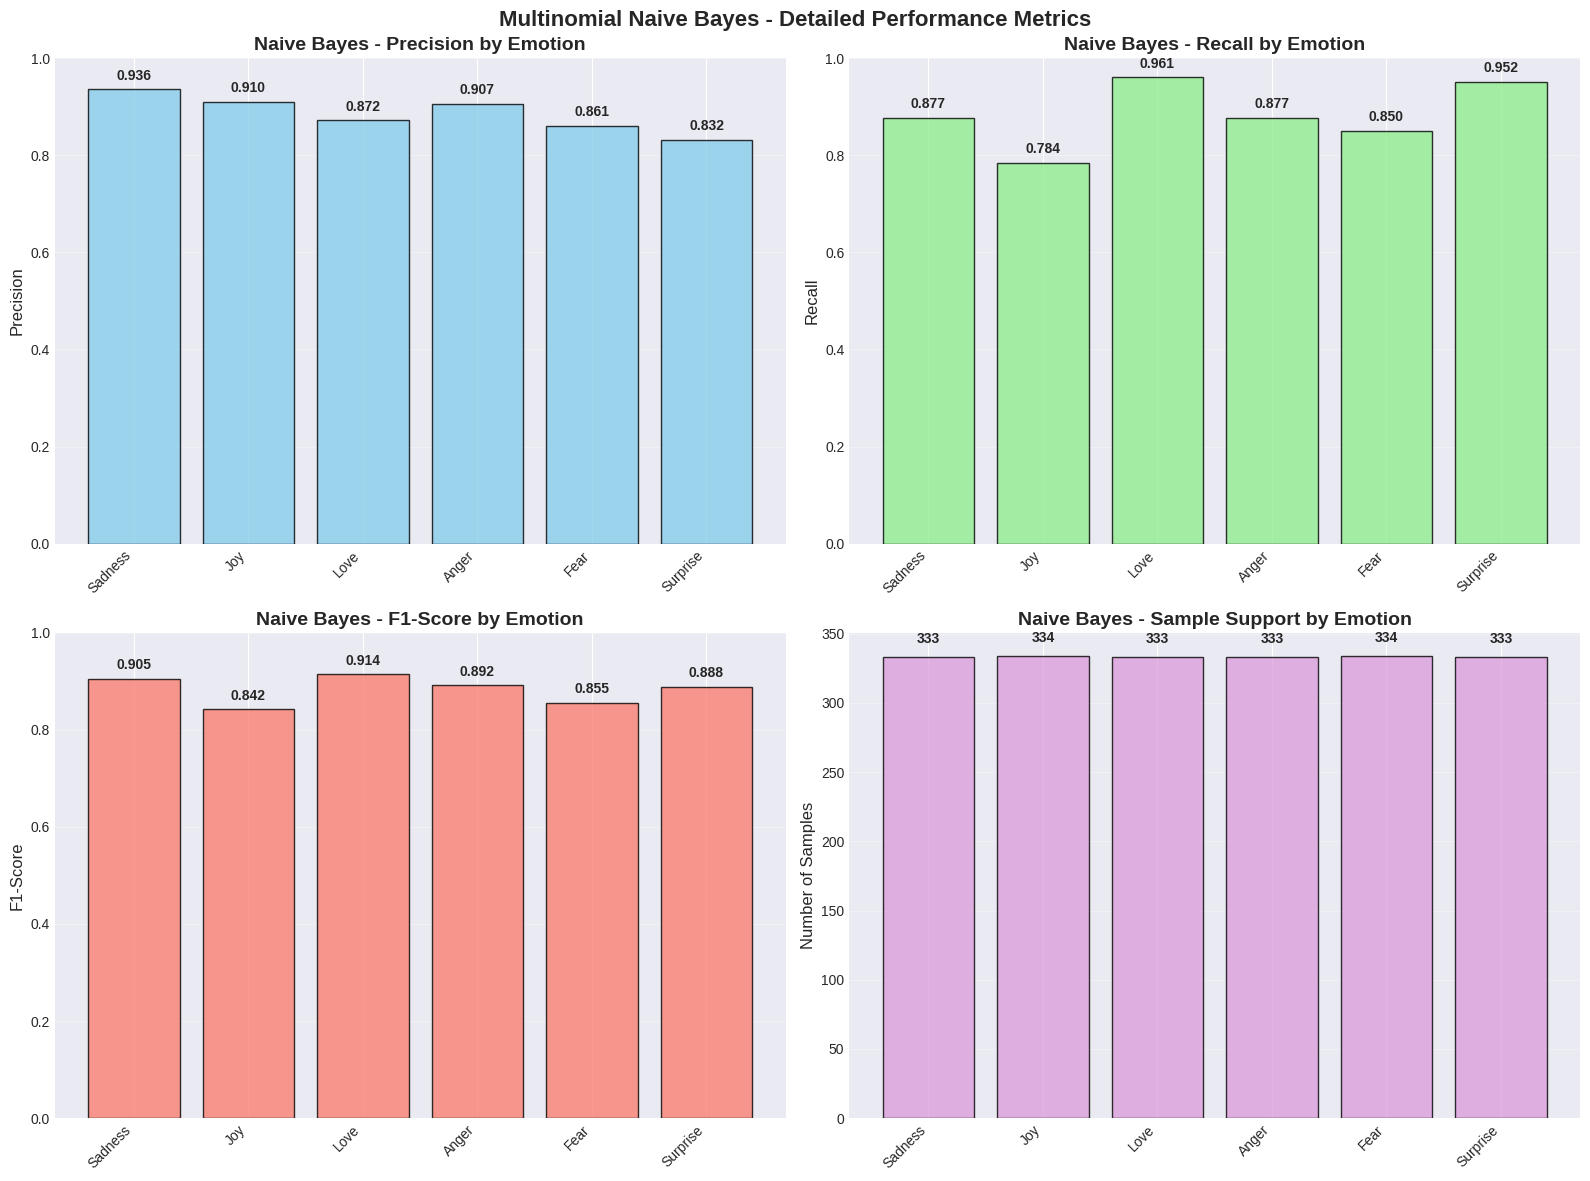

In [55]:
# Visualization: Metrics Bar Chart for MNB
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Precision
axes[0, 0].bar(mnb_per_class['Emotion'], mnb_per_class['Precision'],
               color='skyblue', alpha=0.8, edgecolor='black')
axes[0, 0].set_title('Naive Bayes - Precision by Emotion', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Precision', fontsize=12)
axes[0, 0].set_ylim([0, 1.0])
axes[0, 0].grid(True, alpha=0.3, axis='y')
plt.setp(axes[0, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(mnb_per_class['Precision']):
    axes[0, 0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# Recall
axes[0, 1].bar(mnb_per_class['Emotion'], mnb_per_class['Recall'],
               color='lightgreen', alpha=0.8, edgecolor='black')
axes[0, 1].set_title('Naive Bayes - Recall by Emotion', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Recall', fontsize=12)
axes[0, 1].set_ylim([0, 1.0])
axes[0, 1].grid(True, alpha=0.3, axis='y')
plt.setp(axes[0, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(mnb_per_class['Recall']):
    axes[0, 1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# F1-Score
axes[1, 0].bar(mnb_per_class['Emotion'], mnb_per_class['F1-Score'],
               color='salmon', alpha=0.8, edgecolor='black')
axes[1, 0].set_title('Naive Bayes - F1-Score by Emotion', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('F1-Score', fontsize=12)
axes[1, 0].set_ylim([0, 1.0])
axes[1, 0].grid(True, alpha=0.3, axis='y')
plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(mnb_per_class['F1-Score']):
    axes[1, 0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# Support
axes[1, 1].bar(mnb_per_class['Emotion'], mnb_per_class['Support'],
               color='plum', alpha=0.8, edgecolor='black')
axes[1, 1].set_title('Naive Bayes - Sample Support by Emotion', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Number of Samples', fontsize=12)
axes[1, 1].grid(True, alpha=0.3, axis='y')
plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(mnb_per_class['Support']):
    axes[1, 1].text(i, v + 10, f'{int(v)}', ha='center', fontweight='bold')

plt.suptitle('Multinomial Naive Bayes - Detailed Performance Metrics',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('mnb_detailed_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

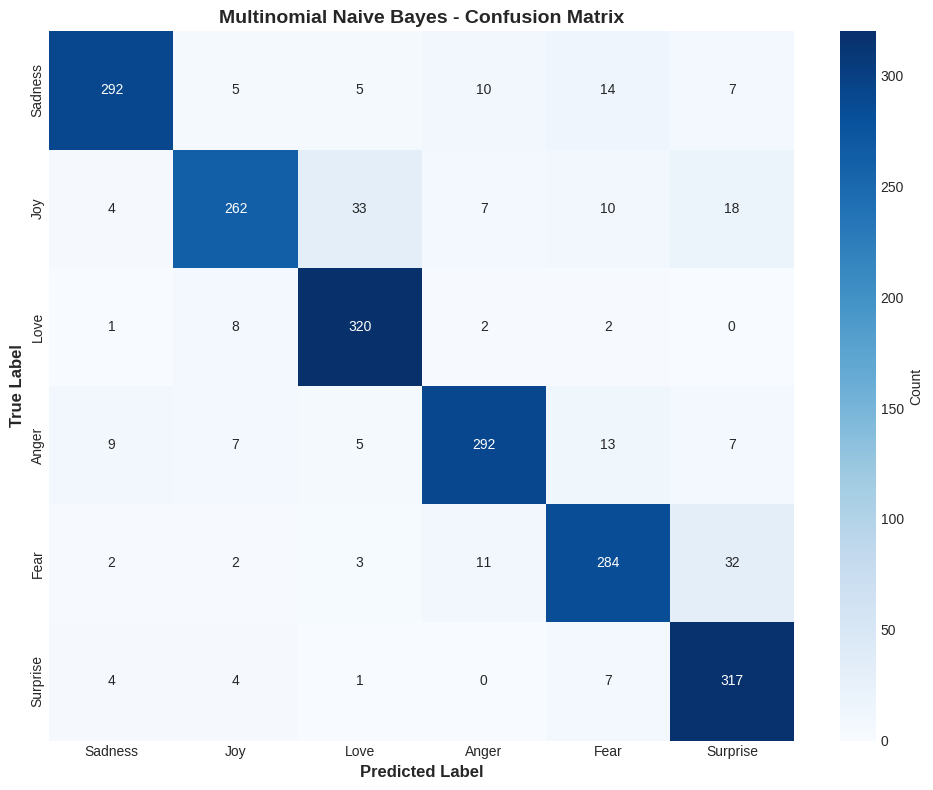

In [56]:
# Confusion Matrix
mnb_cm = confusion_matrix(y_test, mnb_test_pred)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(mnb_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(emotion_labels.values()),
            yticklabels=list(emotion_labels.values()),
            cbar_kws={'label': 'Count'})
ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax.set_title('Multinomial Naive Bayes - Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('mnb_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

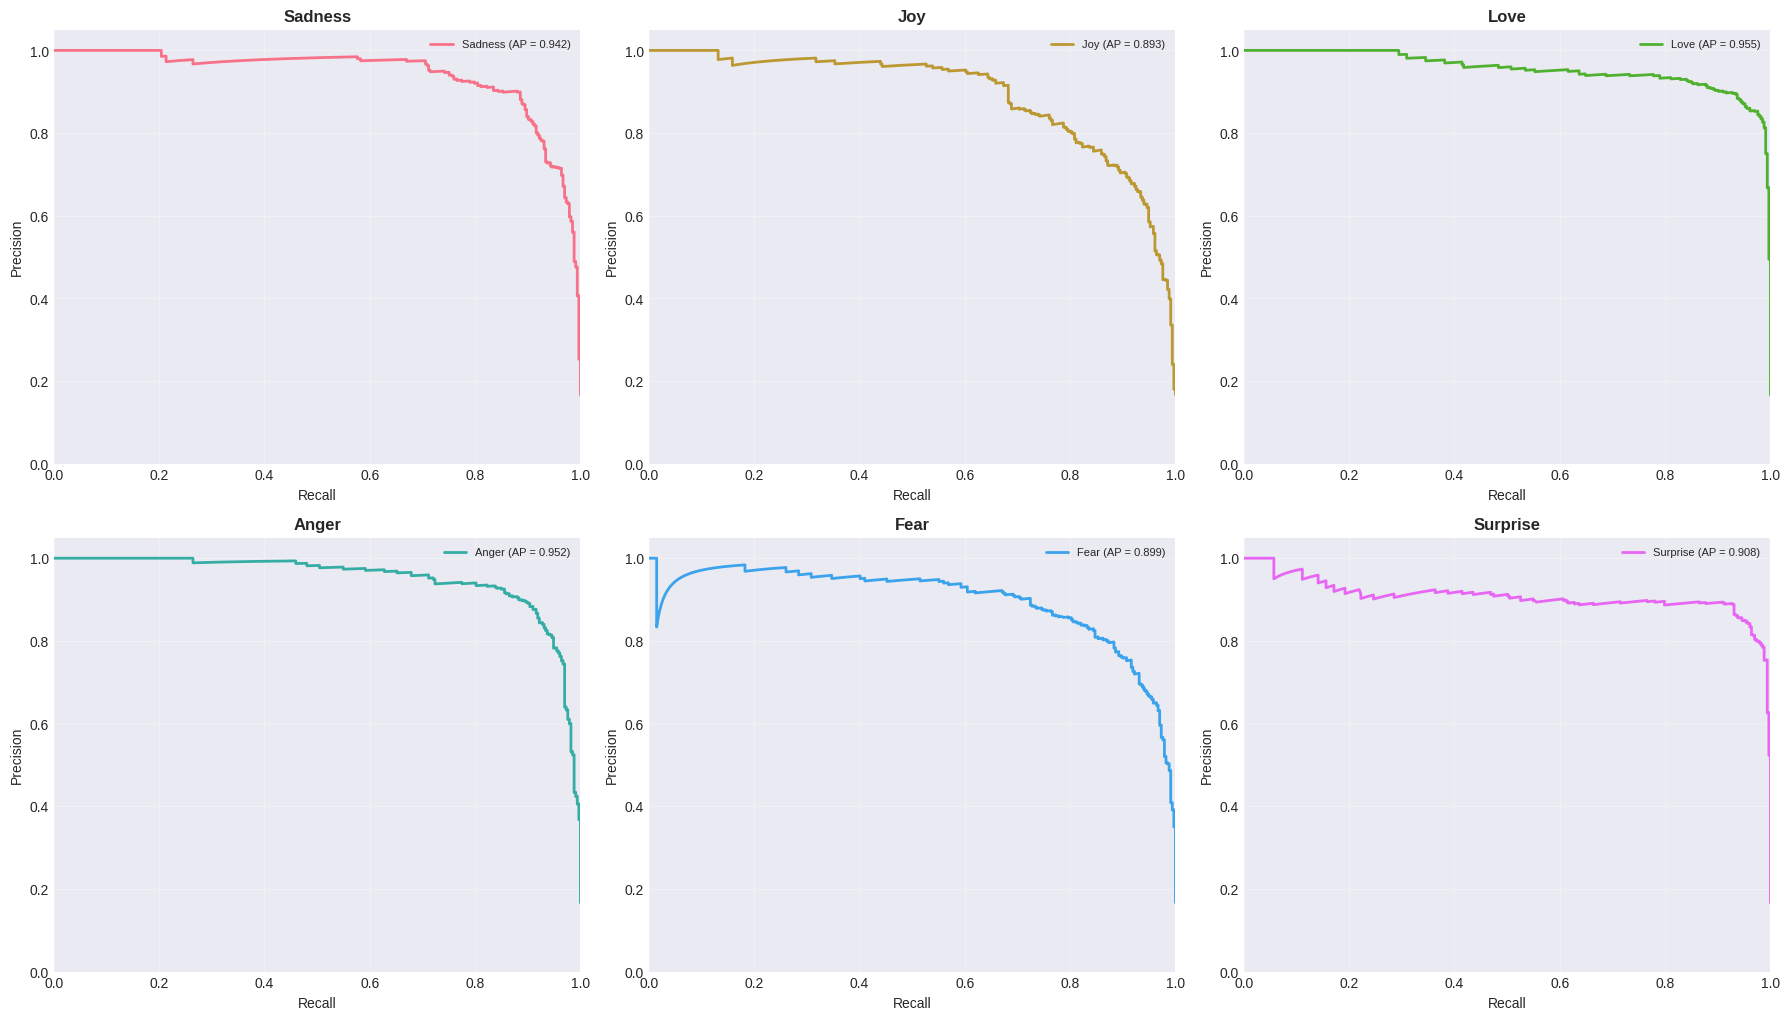

In [57]:
# Binarize labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
n_classes = y_test_bin.shape[1]

# Predict probabilities
mnb_proba = mnb_model.predict_proba(X_test_tfidf)

# Colors for each class
colors = sns.color_palette("husl", n_classes)

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, (color, emotion) in enumerate(zip(colors, emotion_labels.values())):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], mnb_proba[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], mnb_proba[:, i])

    ax = axes[i]
    ax.plot(recall, precision, color=color, lw=2,
            label=f'{emotion} (AP = {avg_precision:.3f})')

    ax.set_xlabel('Recall', fontsize=10)
    ax.set_ylabel('Precision', fontsize=10)
    ax.set_title(f'{emotion}', fontsize=12, fontweight='bold')
    ax.legend(loc="best", fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])

# Hide unused subplots if n_classes < 9
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('mnb_precision_recall_grid.png', dpi=300, bbox_inches='tight')
plt.show()


### Sample Predictions for MNB

In [58]:
# Sample Predictions for MNB
print("\n NAIVE BAYES - SAMPLE PREDICTIONS:")
print("-" * 100)

sample_indices = np.random.choice(len(test_df), 10, replace=False)
mnb_samples = []

for idx in sample_indices:
    actual_idx = test_df.index[idx]
    text = test_df.loc[actual_idx, 'text']
    true_label = y_test[idx]
    pred_label = mnb_test_pred[idx]

    text_tfidf = tfidf_vectorizer.transform([test_df.loc[actual_idx, 'cleaned_text']])
    probabilities = mnb_model.predict_proba(text_tfidf)[0]
    confidence = probabilities[pred_label]

    mnb_samples.append({
        'Text': text[:60] + '...' if len(text) > 60 else text,
        'True': emotion_labels[true_label],
        'Predicted': emotion_labels[pred_label],
        'Confidence': f'{confidence:.2%}',
        'Correct': '100%' if true_label == pred_label else '0%'
    })

mnb_samples_df = pd.DataFrame(mnb_samples)
print(mnb_samples_df.to_string(index=False))


 NAIVE BAYES - SAMPLE PREDICTIONS:
----------------------------------------------------------------------------------------------------
                                                           Text     True Predicted Confidence Correct
i wake up in the morning after a great night with my dear hu...    Anger     Anger     51.23%    100%
i have a strong feeling were going to come back from this to...  Sadness       Joy     25.30%      0%
              i feel so hopeless and usually just want o scream  Sadness   Sadness     55.08%    100%
i can think of jim and all that we had and not feel that col...    Anger     Anger     46.45%    100%
                       i feel frightened in a kind of a raw way     Fear      Fear     82.78%    100%
i imagine that the school bullying that followed made everyt...  Sadness   Sadness     45.42%    100%
i feel is fans are really supporting me and telling me im st...     Love      Love     33.76%    100%
i feel as though at any moment i could lose my 

### MODEL 2: LOGISTIC REGRESSION

In [59]:
#  MODEL 2: LOGISTIC REGRESSION
print("\n" + "=" * 80)
print("MODEL 2: LOGISTIC REGRESSION")
print("=" * 80)

print("\n Training Logistic Regression...")
lr_model = LogisticRegression(
    max_iter=1000,
    C=1.0,
    penalty='l2',
    solver='lbfgs',
    random_state=42,
    n_jobs=-1
)
lr_model.fit(X_train_tfidf, y_train)


MODEL 2: LOGISTIC REGRESSION

 Training Logistic Regression...


LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)

In [60]:
# Predictions
lr_train_pred = lr_model.predict(X_train_tfidf)
lr_val_pred = lr_model.predict(X_val_tfidf)
lr_test_pred = lr_model.predict(X_test_tfidf)

In [61]:
# Accuracy
lr_train_acc = accuracy_score(y_train, lr_train_pred)
lr_val_acc = accuracy_score(y_val, lr_val_pred)
lr_test_acc = accuracy_score(y_test, lr_test_pred)

In [62]:
print(f"\n Logistic Regression Training Completed")
print(f"\n ACCURACY SCORES:")
print(f"  Training Accuracy:   {lr_train_acc:.4f} ({lr_train_acc*100:.2f}%)")
print(f"  Validation Accuracy: {lr_val_acc:.4f} ({lr_val_acc*100:.2f}%)")
print(f"  Test Accuracy:       {lr_test_acc:.4f} ({lr_test_acc*100:.2f}%)")


 Logistic Regression Training Completed

 ACCURACY SCORES:
  Training Accuracy:   0.9566 (95.66%)
  Validation Accuracy: 0.9040 (90.40%)
  Test Accuracy:       0.9160 (91.60%)


### MODEL 2 - LOGISTIC REGRESSION (EVALUATION)

In [63]:
# Calculate LR metrics
lr_metrics = calculate_detailed_metrics(y_test, lr_test_pred, 'Logistic Regression')

print("\n LOGISTIC REGRESSION - PERFORMANCE METRICS:")
print("-" * 80)
for metric, value in lr_metrics.items():
    if metric != 'Model':
        print(f"  {metric:.<35} {value:.4f} ({value*100:.2f}%)")

# Per-class detailed metrics
lr_prec, lr_rec, lr_f1, lr_support = precision_recall_fscore_support(
    y_test, lr_test_pred, average=None, zero_division=0
)

lr_per_class = pd.DataFrame({
    'Emotion': list(emotion_labels.values()),
    'Precision': lr_prec,
    'Recall': lr_rec,
    'F1-Score': lr_f1,
    'Support': lr_support
})

print("\n LOGISTIC REGRESSION - PER-CLASS METRICS:")
print("-" * 80)
print(lr_per_class.to_string(index=False))


 LOGISTIC REGRESSION - PERFORMANCE METRICS:
--------------------------------------------------------------------------------
  Accuracy........................... 0.9160 (91.60%)
  Macro Precision.................... 0.9166 (91.66%)
  Macro Recall....................... 0.9161 (91.61%)
  Macro F1-Score..................... 0.9155 (91.55%)
  Weighted Precision................. 0.9166 (91.66%)
  Weighted Recall.................... 0.9160 (91.60%)
  Weighted F1-Score.................. 0.9155 (91.55%)

 LOGISTIC REGRESSION - PER-CLASS METRICS:
--------------------------------------------------------------------------------
 Emotion  Precision   Recall  F1-Score  Support
 Sadness   0.936170 0.924925  0.930514      333
     Joy   0.931373 0.853293  0.890625      334
    Love   0.913408 0.981982  0.946454      333
   Anger   0.940439 0.900901  0.920245      333
    Fear   0.880734 0.862275  0.871407      334
Surprise   0.897507 0.972973  0.933718      333


In [64]:
# Classification Report
print(f"\n CLASSIFICATION REPORT (Test Set):")
print("-" * 80)
lr_report = classification_report(y_test, lr_test_pred,
                                   target_names=list(emotion_labels.values()),
                                   digits=4)
print(lr_report)


 CLASSIFICATION REPORT (Test Set):
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

     Sadness     0.9362    0.9249    0.9305       333
         Joy     0.9314    0.8533    0.8906       334
        Love     0.9134    0.9820    0.9465       333
       Anger     0.9404    0.9009    0.9202       333
        Fear     0.8807    0.8623    0.8714       334
    Surprise     0.8975    0.9730    0.9337       333

    accuracy                         0.9160      2000
   macro avg     0.9166    0.9161    0.9155      2000
weighted avg     0.9166    0.9160    0.9155      2000



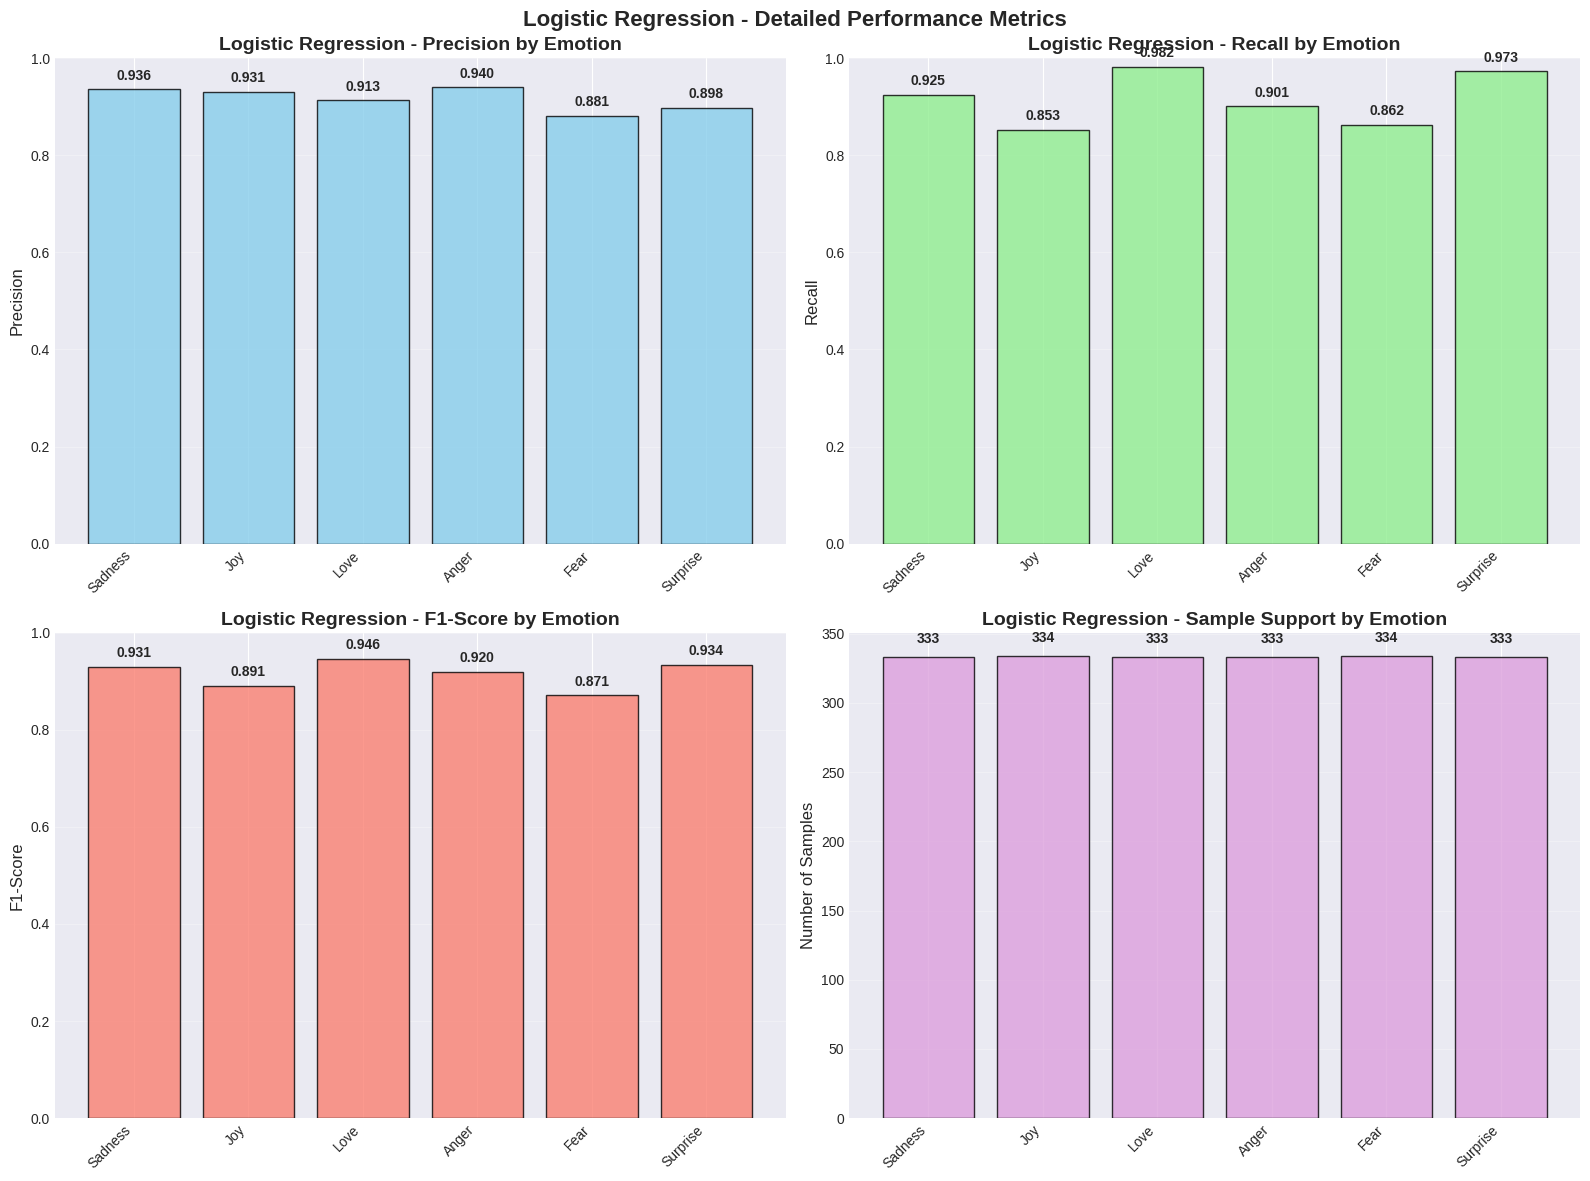

In [65]:
# Visualization: Metrics Bar Chart for LR
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Precision
axes[0, 0].bar(lr_per_class['Emotion'], lr_per_class['Precision'],
               color='skyblue', alpha=0.8, edgecolor='black')
axes[0, 0].set_title('Logistic Regression - Precision by Emotion', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Precision', fontsize=12)
axes[0, 0].set_ylim([0, 1.0])
axes[0, 0].grid(True, alpha=0.3, axis='y')
plt.setp(axes[0, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(lr_per_class['Precision']):
    axes[0, 0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# Recall
axes[0, 1].bar(lr_per_class['Emotion'], lr_per_class['Recall'],
               color='lightgreen', alpha=0.8, edgecolor='black')
axes[0, 1].set_title('Logistic Regression - Recall by Emotion', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Recall', fontsize=12)
axes[0, 1].set_ylim([0, 1.0])
axes[0, 1].grid(True, alpha=0.3, axis='y')
plt.setp(axes[0, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(lr_per_class['Recall']):
    axes[0, 1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# F1-Score
axes[1, 0].bar(lr_per_class['Emotion'], lr_per_class['F1-Score'],
               color='salmon', alpha=0.8, edgecolor='black')
axes[1, 0].set_title('Logistic Regression - F1-Score by Emotion', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('F1-Score', fontsize=12)
axes[1, 0].set_ylim([0, 1.0])
axes[1, 0].grid(True, alpha=0.3, axis='y')
plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(lr_per_class['F1-Score']):
    axes[1, 0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# Support
axes[1, 1].bar(lr_per_class['Emotion'], lr_per_class['Support'],
               color='plum', alpha=0.8, edgecolor='black')
axes[1, 1].set_title('Logistic Regression - Sample Support by Emotion', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Number of Samples', fontsize=12)
axes[1, 1].grid(True, alpha=0.3, axis='y')
plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(lr_per_class['Support']):
    axes[1, 1].text(i, v + 10, f'{int(v)}', ha='center', fontweight='bold')

plt.suptitle('Logistic Regression - Detailed Performance Metrics',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('lr_detailed_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

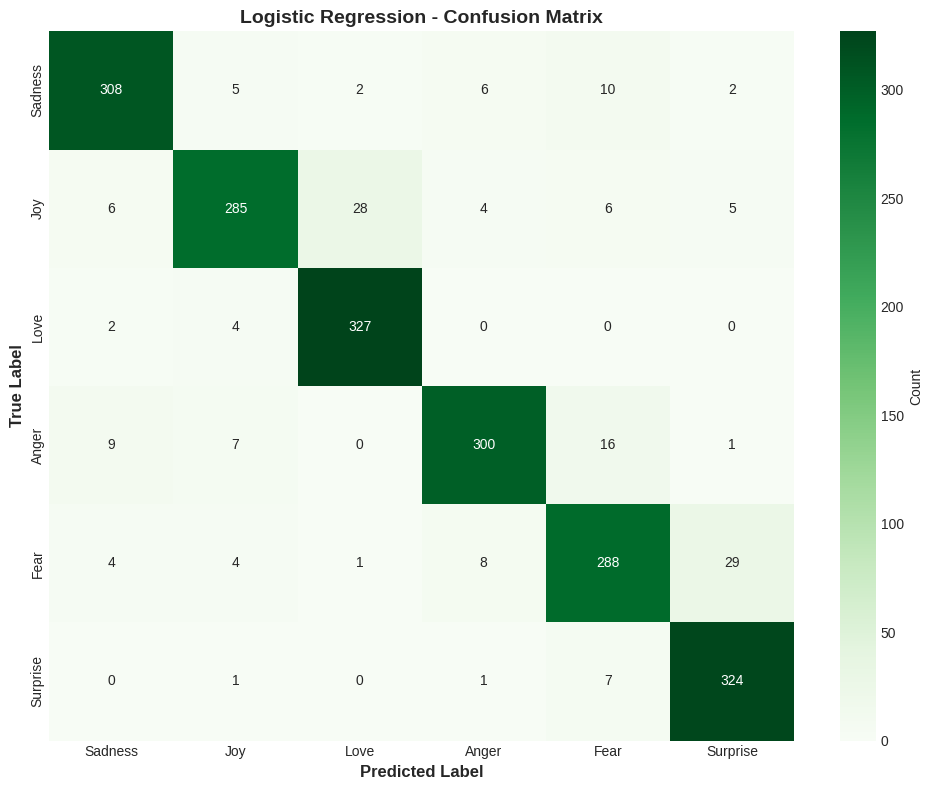

In [66]:
# Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_test_pred)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=list(emotion_labels.values()),
            yticklabels=list(emotion_labels.values()),
            cbar_kws={'label': 'Count'})
ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax.set_title('Logistic Regression - Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('lr_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

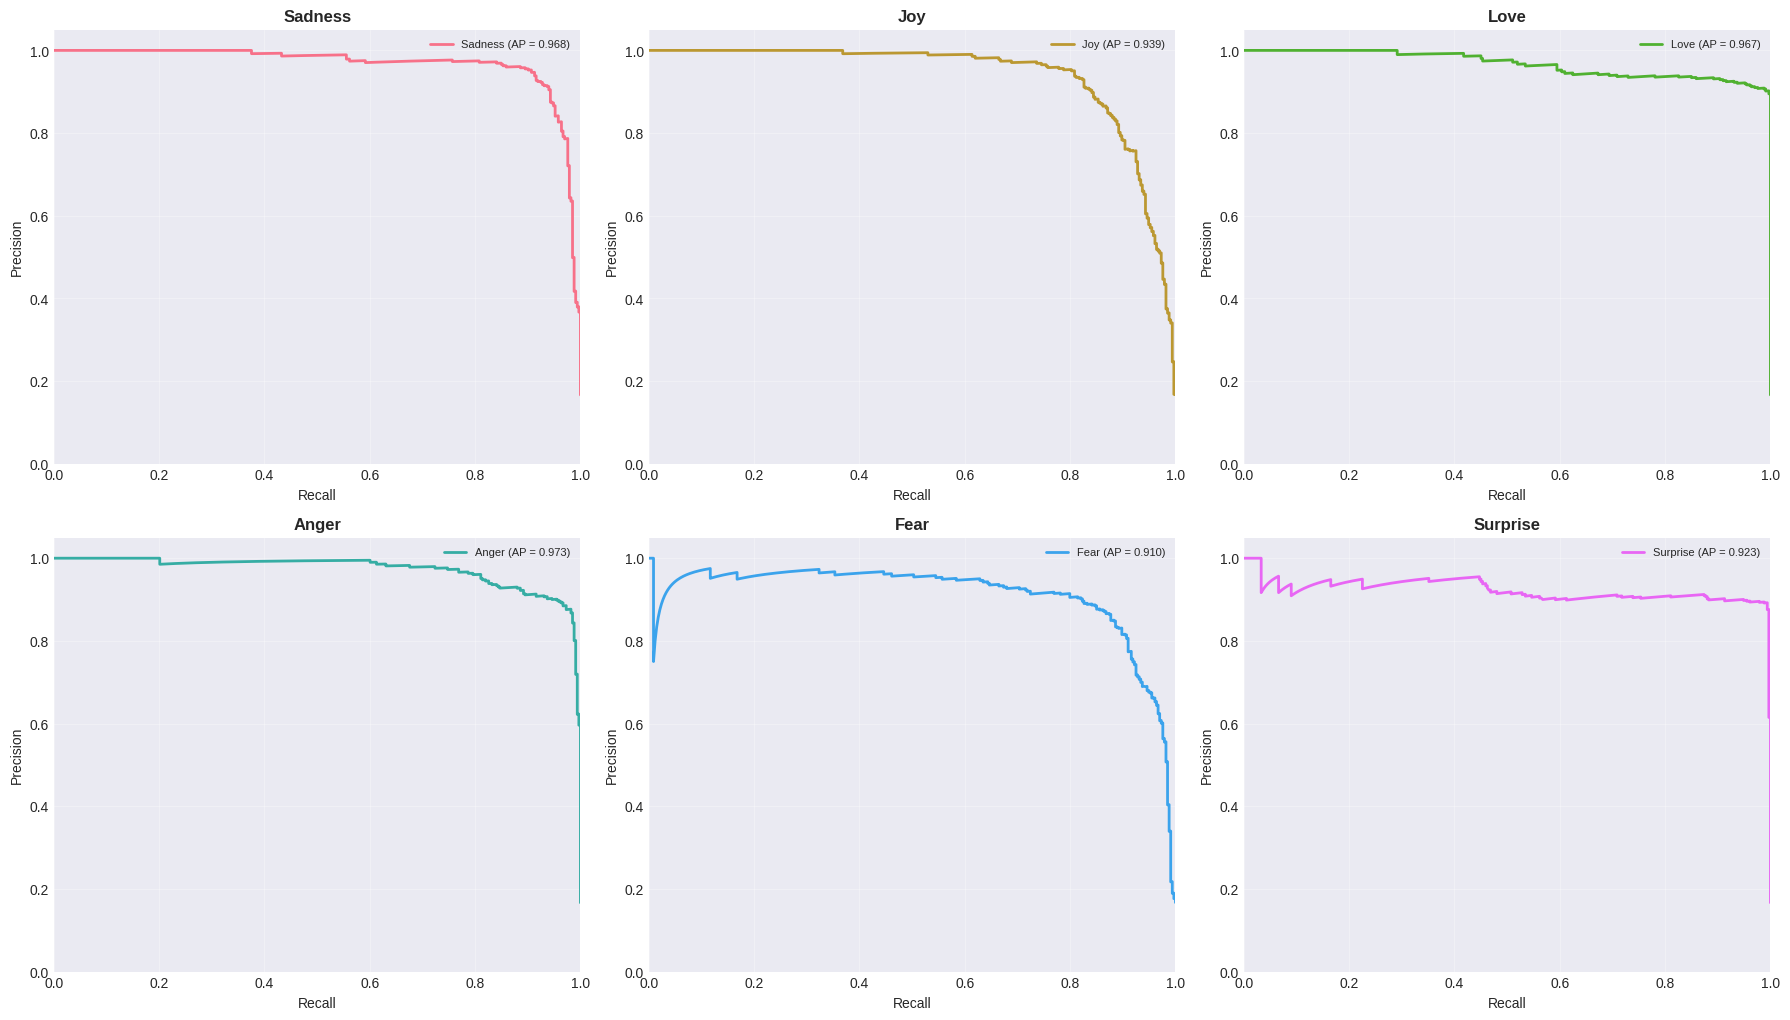

In [67]:
# Predict probabilities
lr_proba = lr_model.predict_proba(X_test_tfidf)

# Number of classes
n_classes = len(emotion_labels)

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()  # flatten to easily index

for i, (color, emotion) in enumerate(zip(colors, emotion_labels.values())):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], lr_proba[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], lr_proba[:, i])

    ax = axes[i]
    ax.plot(recall, precision, color=color, lw=2,
            label=f'{emotion} (AP = {avg_precision:.3f})')

    ax.set_xlabel('Recall', fontsize=10)
    ax.set_ylabel('Precision', fontsize=10)
    ax.set_title(f'{emotion}', fontsize=12, fontweight='bold')
    ax.legend(loc="best", fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('lr_precision_recall_grid.png', dpi=300, bbox_inches='tight')
plt.show()


### Sample Predictions for LOGISTIC REGRESSION

In [68]:
# Sample Predictions for LR
print("\nLOGISTIC REGRESSION - SAMPLE PREDICTIONS:")
print("-" * 80)

lr_samples = []

for idx in sample_indices:
    actual_idx = test_df.index[idx]
    text = test_df.loc[actual_idx, 'text']
    true_label = y_test[idx]
    pred_label = lr_test_pred[idx]

    text_tfidf = tfidf_vectorizer.transform([test_df.loc[actual_idx, 'cleaned_text']])
    probabilities = lr_model.predict_proba(text_tfidf)[0]
    confidence = probabilities[pred_label]

    lr_samples.append({
        'Text': text[:60] + '...' if len(text) > 60 else text,
        'True': emotion_labels[true_label],
        'Predicted': emotion_labels[pred_label],
        'Confidence': f'{confidence:.2%}',
        'Correct': 'YES' if true_label == pred_label else 'NO'
    })

lr_samples_df = pd.DataFrame(lr_samples)
print(lr_samples_df.to_string(index=False))


LOGISTIC REGRESSION - SAMPLE PREDICTIONS:
--------------------------------------------------------------------------------
                                                           Text     True Predicted Confidence Correct
i wake up in the morning after a great night with my dear hu...    Anger     Anger     60.74%     YES
i have a strong feeling were going to come back from this to...  Sadness       Joy     34.47%      NO
              i feel so hopeless and usually just want o scream  Sadness   Sadness     77.94%     YES
i can think of jim and all that we had and not feel that col...    Anger     Anger     73.95%     YES
                       i feel frightened in a kind of a raw way     Fear      Fear     93.77%     YES
i imagine that the school bullying that followed made everyt...  Sadness   Sadness     58.83%     YES
i feel is fans are really supporting me and telling me im st...     Love      Love     68.08%     YES
i feel as though at any moment i could lose my salvation bec

###  MODEL 3: SUPPORT VECTOR MACHINE (SVM)

In [69]:
#  MODEL 3: SUPPORT VECTOR MACHINE (SVM)
print("\n" + "=" * 80)
print("MODEL 3: SUPPORT VECTOR MACHINE (LinearSVC)")
print("=" * 80)

print("\n Training SVM (this may take a few minutes)...")
svm_model = LinearSVC(
    C=1.0,
    max_iter=2000,
    random_state=42,
    dual=False
)
svm_model.fit(X_train_tfidf, y_train)


MODEL 3: SUPPORT VECTOR MACHINE (LinearSVC)

 Training SVM (this may take a few minutes)...


LinearSVC(dual=False, max_iter=2000, random_state=42)

In [70]:
# Predictions
svm_train_pred = svm_model.predict(X_train_tfidf)
svm_val_pred = svm_model.predict(X_val_tfidf)
svm_test_pred = svm_model.predict(X_test_tfidf)

In [71]:
# Accuracy
svm_train_acc = accuracy_score(y_train, svm_train_pred)
svm_val_acc = accuracy_score(y_val, svm_val_pred)
svm_test_acc = accuracy_score(y_test, svm_test_pred)

In [72]:
print(f"\n SVM Training Completed")
print(f"\n ACCURACY SCORES:")
print(f"  Training Accuracy:   {svm_train_acc:.4f} ({svm_train_acc*100:.2f}%)")
print(f"  Validation Accuracy: {svm_val_acc:.4f} ({svm_val_acc*100:.2f}%)")
print(f"  Test Accuracy:       {svm_test_acc:.4f} ({svm_test_acc*100:.2f}%)")


 SVM Training Completed

 ACCURACY SCORES:
  Training Accuracy:   0.9792 (97.92%)
  Validation Accuracy: 0.9090 (90.90%)
  Test Accuracy:       0.9130 (91.30%)


### MODEL 3: SUPPORT VECTOR MACHINE (EVALUATION)

In [73]:
# Calculate SVM metrics
svm_metrics = calculate_detailed_metrics(y_test, svm_test_pred, 'Support Vector Machine')

print("\nSVM - PERFORMANCE METRICS:")
print("-" * 80)
for metric, value in svm_metrics.items():
    if metric != 'Model':
        print(f"  {metric:.<35} {value:.4f} ({value*100:.2f}%)")

# Per-class detailed metrics
svm_prec, svm_rec, svm_f1, svm_support = precision_recall_fscore_support(
    y_test, svm_test_pred, average=None, zero_division=0
)

svm_per_class = pd.DataFrame({
    'Emotion': list(emotion_labels.values()),
    'Precision': svm_prec,
    'Recall': svm_rec,
    'F1-Score': svm_f1,
    'Support': svm_support
})

print("\nSVM - PER-CLASS METRICS:")
print("-" * 80)
print(svm_per_class.to_string(index=False))


SVM - PERFORMANCE METRICS:
--------------------------------------------------------------------------------
  Accuracy........................... 0.9130 (91.30%)
  Macro Precision.................... 0.9134 (91.34%)
  Macro Recall....................... 0.9131 (91.31%)
  Macro F1-Score..................... 0.9126 (91.26%)
  Weighted Precision................. 0.9134 (91.34%)
  Weighted Recall.................... 0.9130 (91.30%)
  Weighted F1-Score.................. 0.9126 (91.26%)

SVM - PER-CLASS METRICS:
--------------------------------------------------------------------------------
 Emotion  Precision   Recall  F1-Score  Support
 Sadness   0.939024 0.924925  0.931921      333
     Joy   0.922330 0.853293  0.886470      334
    Love   0.917379 0.966967  0.941520      333
   Anger   0.928349 0.894895  0.911315      333
    Fear   0.879154 0.871257  0.875188      334
Surprise   0.894444 0.966967  0.929293      333


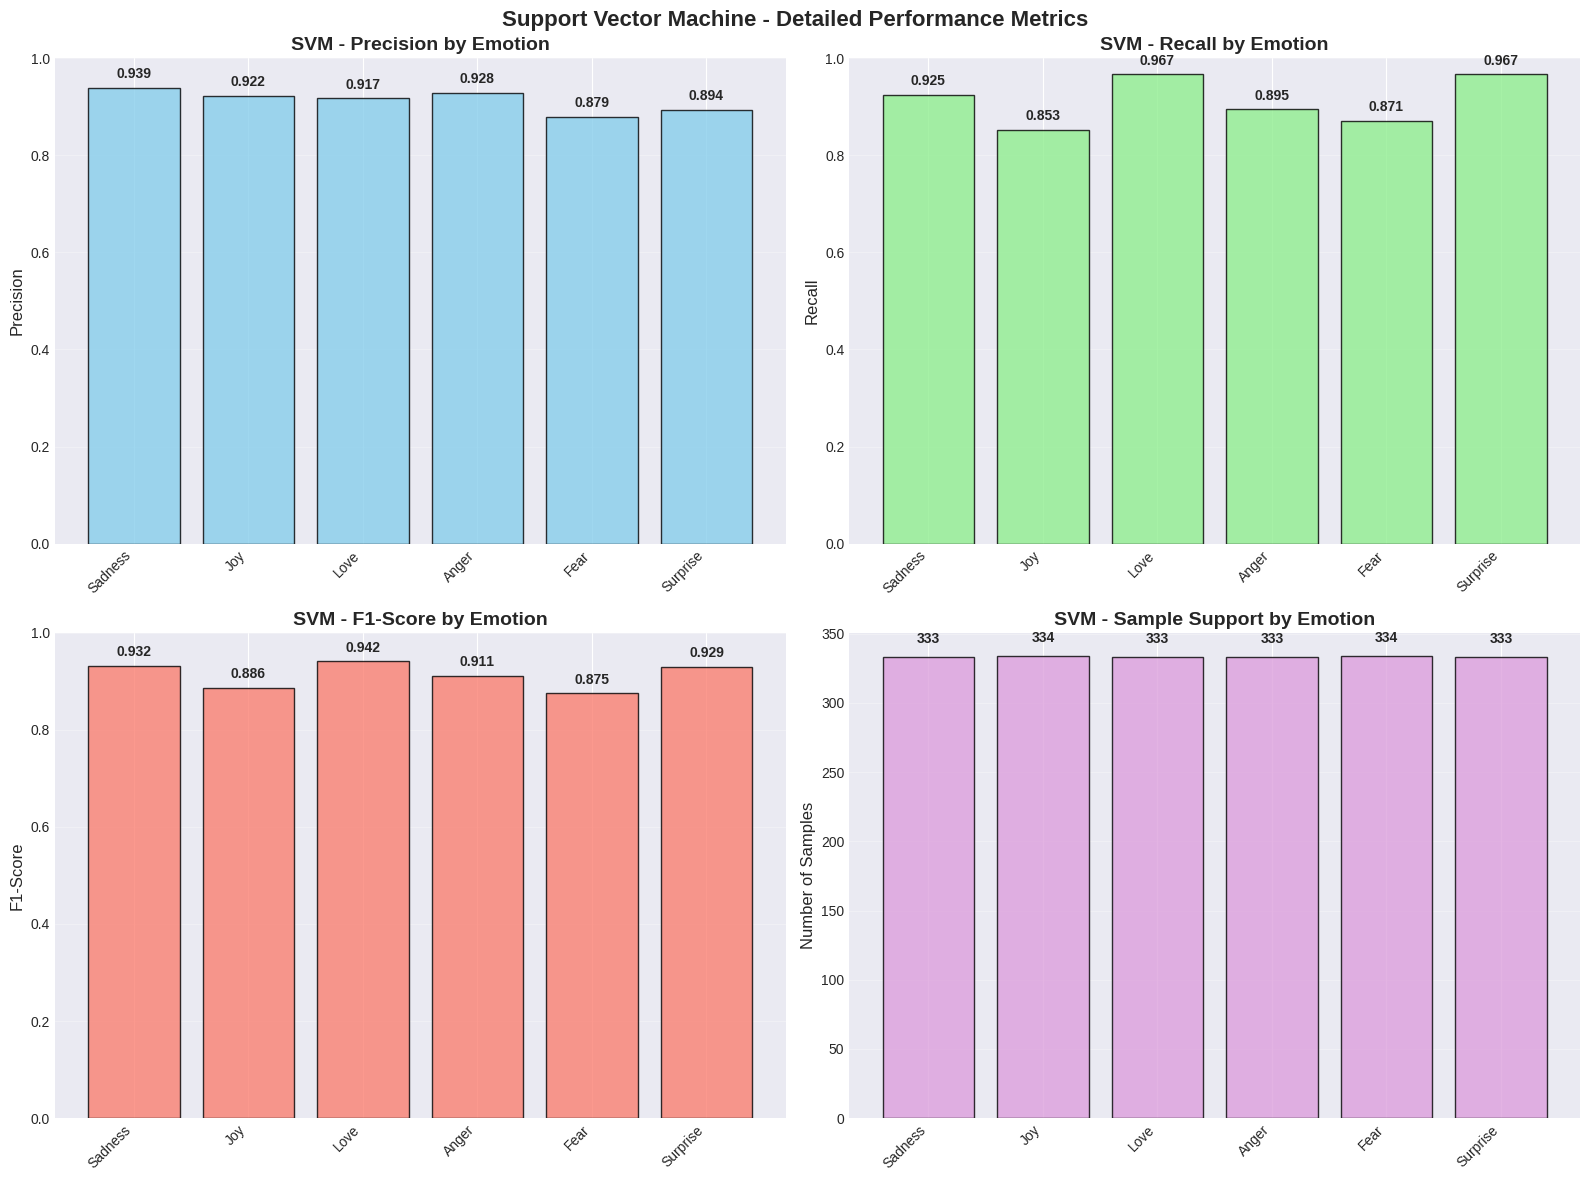

In [74]:
# Visualization: Metrics Bar Chart for SVM
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Precision
axes[0, 0].bar(svm_per_class['Emotion'], svm_per_class['Precision'],
               color='skyblue', alpha=0.8, edgecolor='black')
axes[0, 0].set_title('SVM - Precision by Emotion', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Precision', fontsize=12)
axes[0, 0].set_ylim([0, 1.0])
axes[0, 0].grid(True, alpha=0.3, axis='y')
plt.setp(axes[0, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(svm_per_class['Precision']):
    axes[0, 0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# Recall
axes[0, 1].bar(svm_per_class['Emotion'], svm_per_class['Recall'],
               color='lightgreen', alpha=0.8, edgecolor='black')
axes[0, 1].set_title('SVM - Recall by Emotion', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Recall', fontsize=12)
axes[0, 1].set_ylim([0, 1.0])
axes[0, 1].grid(True, alpha=0.3, axis='y')
plt.setp(axes[0, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(svm_per_class['Recall']):
    axes[0, 1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# F1-Score
axes[1, 0].bar(svm_per_class['Emotion'], svm_per_class['F1-Score'],
               color='salmon', alpha=0.8, edgecolor='black')
axes[1, 0].set_title('SVM - F1-Score by Emotion', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('F1-Score', fontsize=12)
axes[1, 0].set_ylim([0, 1.0])
axes[1, 0].grid(True, alpha=0.3, axis='y')
plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(svm_per_class['F1-Score']):
    axes[1, 0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# Support
axes[1, 1].bar(svm_per_class['Emotion'], svm_per_class['Support'],
               color='plum', alpha=0.8, edgecolor='black')
axes[1, 1].set_title('SVM - Sample Support by Emotion', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Number of Samples', fontsize=12)
axes[1, 1].grid(True, alpha=0.3, axis='y')
plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(svm_per_class['Support']):
    axes[1, 1].text(i, v + 10, f'{int(v)}', ha='center', fontweight='bold')

plt.suptitle('Support Vector Machine - Detailed Performance Metrics',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('svm_detailed_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

In [75]:
# Classification Report
print(f"\n CLASSIFICATION REPORT (Test Set):")
print("-" * 80)
svm_report = classification_report(y_test, svm_test_pred,
                                    target_names=list(emotion_labels.values()),
                                    digits=4)
print(svm_report)


 CLASSIFICATION REPORT (Test Set):
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

     Sadness     0.9390    0.9249    0.9319       333
         Joy     0.9223    0.8533    0.8865       334
        Love     0.9174    0.9670    0.9415       333
       Anger     0.9283    0.8949    0.9113       333
        Fear     0.8792    0.8713    0.8752       334
    Surprise     0.8944    0.9670    0.9293       333

    accuracy                         0.9130      2000
   macro avg     0.9134    0.9131    0.9126      2000
weighted avg     0.9134    0.9130    0.9126      2000



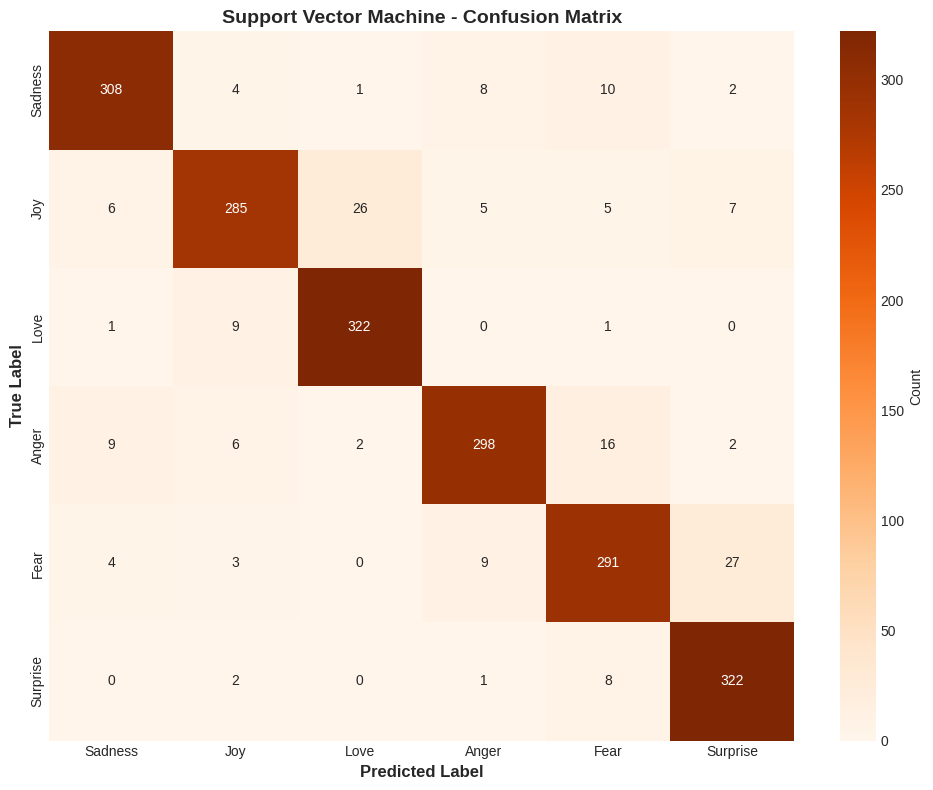

In [76]:
# Confusion Matrix
svm_cm = confusion_matrix(y_test, svm_test_pred)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=list(emotion_labels.values()),
            yticklabels=list(emotion_labels.values()),
            cbar_kws={'label': 'Count'})
ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax.set_title('Support Vector Machine - Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('svm_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


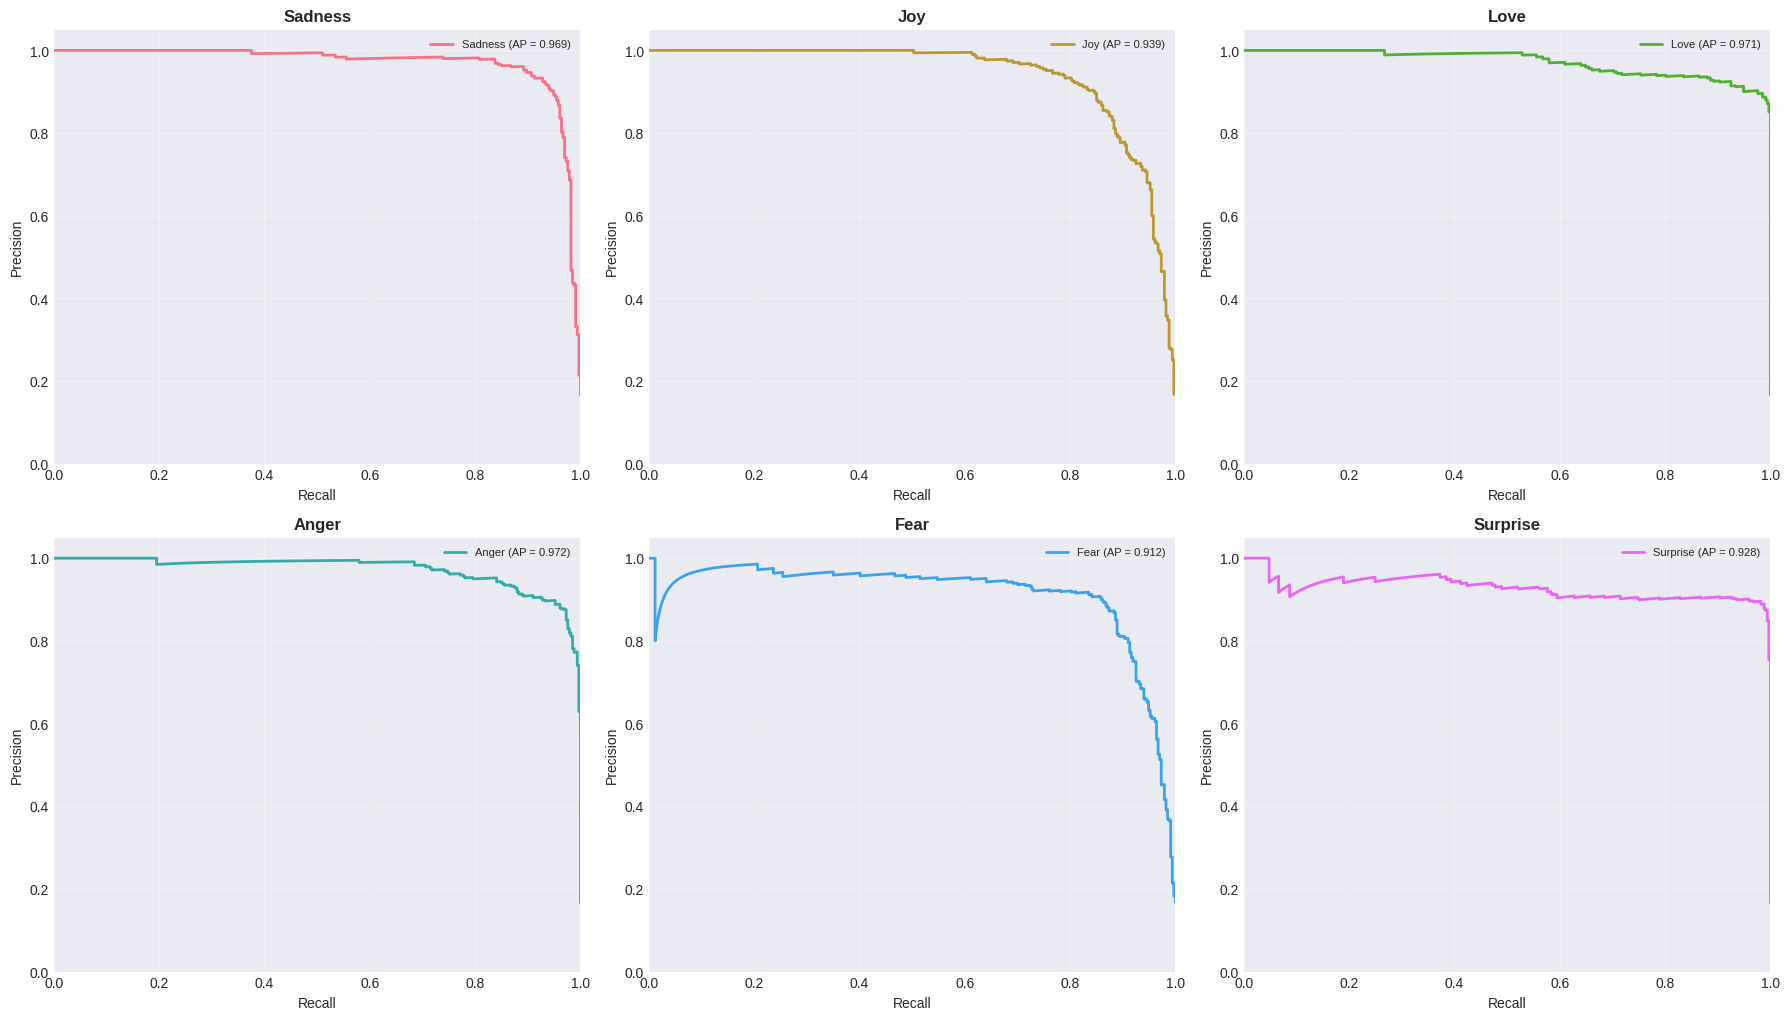

In [77]:
from scipy.special import softmax

# Get decision scores and convert to probabilities
svm_decision = svm_model.decision_function(X_test_tfidf)
svm_proba = softmax(svm_decision, axis=1)

# Number of classes
n_classes = y_test_bin.shape[1]

# Colors for each class
colors = sns.color_palette("husl", n_classes)

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, (color, emotion) in enumerate(zip(colors, emotion_labels.values())):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], svm_proba[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], svm_proba[:, i])

    ax = axes[i]
    ax.plot(recall, precision, color=color, lw=2,
            label=f'{emotion} (AP = {avg_precision:.3f})')

    ax.set_xlabel('Recall', fontsize=10)
    ax.set_ylabel('Precision', fontsize=10)
    ax.set_title(f'{emotion}', fontsize=12, fontweight='bold')
    ax.legend(loc="best", fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])

# Hide unused subplots if n_classes < 9
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('svm_precision_recall_grid.png', dpi=300, bbox_inches='tight')
plt.show()


### Sample Predictions for SVM

In [78]:
# Sample Predictions for SVM
print("\n SVM - SAMPLE PREDICTIONS:")
print("-" * 80)

svm_samples = []

for idx in sample_indices:
    actual_idx = test_df.index[idx]
    text = test_df.loc[actual_idx, 'text']
    true_label = y_test[idx]
    pred_label = svm_test_pred[idx]

    text_tfidf = tfidf_vectorizer.transform([test_df.loc[actual_idx, 'cleaned_text']])
    decision_values = svm_model.decision_function(text_tfidf)[0]
    probabilities = softmax(decision_values)
    confidence = probabilities[pred_label]

    svm_samples.append({
        'Text': text[:60] + '...' if len(text) > 60 else text,
        'True': emotion_labels[true_label],
        'Predicted': emotion_labels[pred_label],
        'Confidence': f'{confidence:.2%}',
        'Correct': 'YES' if true_label == pred_label else 'NO'
    })

svm_samples_df = pd.DataFrame(svm_samples)
print(svm_samples_df.to_string(index=False))


 SVM - SAMPLE PREDICTIONS:
--------------------------------------------------------------------------------
                                                           Text     True Predicted Confidence Correct
i wake up in the morning after a great night with my dear hu...    Anger     Anger     46.41%     YES
i have a strong feeling were going to come back from this to...  Sadness   Sadness     26.39%     YES
              i feel so hopeless and usually just want o scream  Sadness   Sadness     64.00%     YES
i can think of jim and all that we had and not feel that col...    Anger     Anger     66.59%     YES
                       i feel frightened in a kind of a raw way     Fear      Fear     87.58%     YES
i imagine that the school bullying that followed made everyt...  Sadness   Sadness     46.98%     YES
i feel is fans are really supporting me and telling me im st...     Love      Love     65.84%     YES
i feel as though at any moment i could lose my salvation bec...  Sadness   

### COMPARISON OF TRADITIONAL ML MODELS

In [79]:
print("COMPARISON OF TRADITIONAL ML MODELS")

# Create comparison DataFrame
comparison_data = {
    'Model': ['Naive Bayes', 'Logistic Regression', 'SVM'],
    'Train Accuracy': [mnb_train_acc, lr_train_acc, svm_train_acc],
    'Validation Accuracy': [mnb_val_acc, lr_val_acc, svm_val_acc],
    'Test Accuracy': [mnb_test_acc, lr_test_acc, svm_test_acc]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n MODEL ACCURACY COMPARISON:")
print("-" * 80)
print(comparison_df.to_string(index=False))

COMPARISON OF TRADITIONAL ML MODELS

 MODEL ACCURACY COMPARISON:
--------------------------------------------------------------------------------
              Model  Train Accuracy  Validation Accuracy  Test Accuracy
        Naive Bayes        0.940684               0.8755         0.8835
Logistic Regression        0.956622               0.9040         0.9160
                SVM        0.979186               0.9090         0.9130


### Visualization: Model Comparison

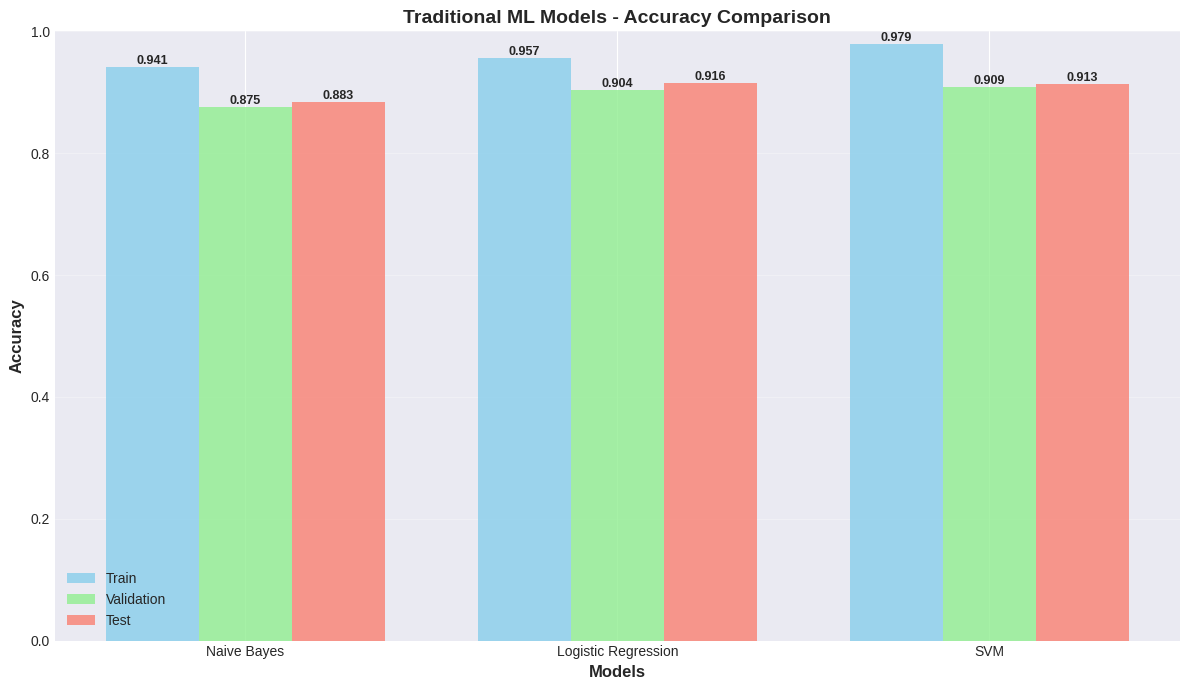

In [80]:
# Visualization: Model Comparison
fig, ax = plt.subplots(figsize=(12, 7))

x = np.arange(len(comparison_df['Model']))
width = 0.25

bars1 = ax.bar(x - width, comparison_df['Train Accuracy'], width,
               label='Train', alpha=0.8, color='skyblue')
bars2 = ax.bar(x, comparison_df['Validation Accuracy'], width,
               label='Validation', alpha=0.8, color='lightgreen')
bars3 = ax.bar(x + width, comparison_df['Test Accuracy'], width,
               label='Test', alpha=0.8, color='salmon')

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Traditional ML Models - Accuracy Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Model'])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0, 1.0])

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('ml_models_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

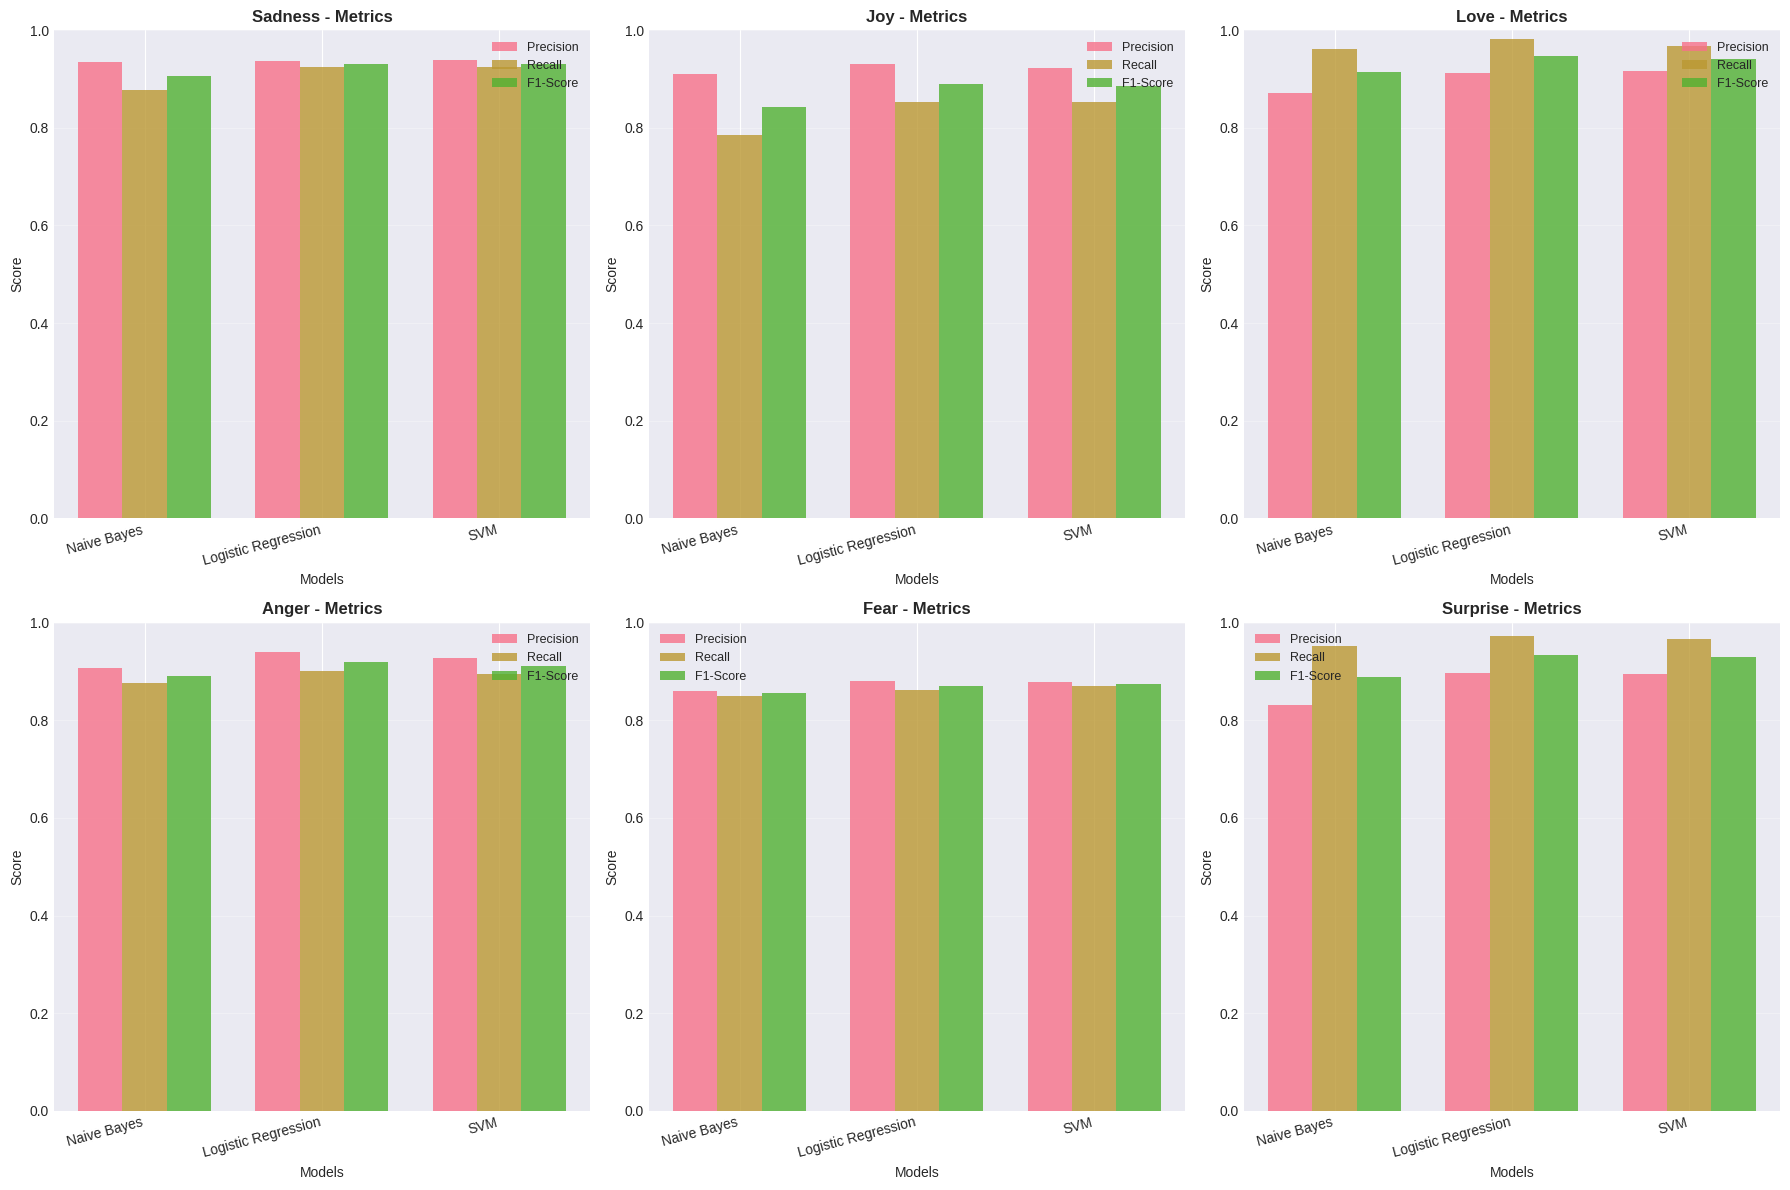

In [81]:
# Per-class performance comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Get per-class metrics for each model
from sklearn.metrics import precision_recall_fscore_support

models_data = [
    ('Naive Bayes', mnb_test_pred),
    ('Logistic Regression', lr_test_pred),
    ('SVM', svm_test_pred)
]

for idx, emotion_label in enumerate(emotion_labels.values()):
    emotion_idx = list(emotion_labels.values()).index(emotion_label)

    precisions = []
    recalls = []
    f1_scores = []

    for model_name, predictions in models_data:
        prec, rec, f1, _ = precision_recall_fscore_support(
            y_test, predictions, average=None, zero_division=0
        )
        precisions.append(prec[emotion_idx])
        recalls.append(rec[emotion_idx])
        f1_scores.append(f1[emotion_idx])

    x = np.arange(len(models_data))
    width = 0.25

    axes[idx].bar(x - width, precisions, width, label='Precision', alpha=0.8)
    axes[idx].bar(x, recalls, width, label='Recall', alpha=0.8)
    axes[idx].bar(x + width, f1_scores, width, label='F1-Score', alpha=0.8)

    axes[idx].set_xlabel('Models', fontsize=10)
    axes[idx].set_ylabel('Score', fontsize=10)
    axes[idx].set_title(f'{emotion_label} - Metrics', fontsize=12, fontweight='bold')
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels([m[0] for m in models_data], rotation=15, ha='right')
    axes[idx].legend(fontsize=9)
    axes[idx].set_ylim([0, 1.0])
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('per_class_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

### MODEL 4 - ENSEMBLE (TRAINING)

In [82]:
print("\n Creating ensemble model (Soft Voting)...")

# Create ensemble with the three traditional ML models
ensemble_model = VotingClassifier(
    estimators=[
        ('naive_bayes', mnb_model),
        ('logistic_regression', lr_model),
        ('svm', svm_model)
    ],
    voting='hard',  # Use hard voting (majority vote)
    n_jobs=-1
)


 Creating ensemble model (Soft Voting)...


In [83]:
# Train ensemble model
print(" Training ensemble model...")
ensemble_model.fit(X_train_tfidf, y_train)

 Training ensemble model...


VotingClassifier(estimators=[('naive_bayes', MultinomialNB()),
                             ('logistic_regression',
                              LogisticRegression(max_iter=1000, n_jobs=-1,
                                                 random_state=42)),
                             ('svm',
                              LinearSVC(dual=False, max_iter=2000,
                                        random_state=42))],
                 n_jobs=-1)

In [84]:
# Predictions
ensemble_train_pred = ensemble_model.predict(X_train_tfidf)
ensemble_val_pred = ensemble_model.predict(X_val_tfidf)
ensemble_test_pred = ensemble_model.predict(X_test_tfidf)

In [85]:
# Accuracy
ensemble_train_acc = accuracy_score(y_train, ensemble_train_pred)
ensemble_val_acc = accuracy_score(y_val, ensemble_val_pred)
ensemble_test_acc = accuracy_score(y_test, ensemble_test_pred)

In [86]:
print(f"\n Ensemble Model Training Completed")
print(f"\n ACCURACY SCORES:")
print(f"  Training Accuracy:   {ensemble_train_acc:.4f} ({ensemble_train_acc*100:.2f}%)")
print(f"  Validation Accuracy: {ensemble_val_acc:.4f} ({ensemble_val_acc*100:.2f}%)")
print(f"  Test Accuracy:       {ensemble_test_acc:.4f} ({ensemble_test_acc*100:.2f}%)")



 Ensemble Model Training Completed

 ACCURACY SCORES:
  Training Accuracy:   0.9617 (96.17%)
  Validation Accuracy: 0.9060 (90.60%)
  Test Accuracy:       0.9170 (91.70%)


### MODEL 4 - ENSEMBLE (EVALUATION)

In [87]:
# Calculate Ensemble metrics
ensemble_metrics = {
    'Model': 'Ensemble (Voting Classifier)',
    'Accuracy': accuracy_score(y_test, ensemble_test_pred),
    'Macro Precision': precision_score(y_test, ensemble_test_pred, average='macro'),
    'Macro Recall': recall_score(y_test, ensemble_test_pred, average='macro'),
    'Macro F1-Score': f1_score(y_test, ensemble_test_pred, average='macro'),
    'Weighted Precision': precision_score(y_test, ensemble_test_pred, average='weighted'),
    'Weighted Recall': recall_score(y_test, ensemble_test_pred, average='weighted'),
    'Weighted F1-Score': f1_score(y_test, ensemble_test_pred, average='weighted'),
}

print("\n ENSEMBLE MODEL - COMPREHENSIVE METRICS:")
print("-" * 80)
for metric, value in ensemble_metrics.items():
    if metric != 'Model':
        print(f"  {metric:.<35} {value:.4f} ({value*100:.2f}%)")

# Per-class detailed metrics
ensemble_prec, ensemble_rec, ensemble_f1, ensemble_support = precision_recall_fscore_support(
    y_test, ensemble_test_pred, average=None, zero_division=0
)

ensemble_per_class = pd.DataFrame({
    'Emotion': list(emotion_labels.values()),
    'Precision': ensemble_prec,
    'Recall': ensemble_rec,
    'F1-Score': ensemble_f1,
    'Support': ensemble_support
})

print("\n ENSEMBLE MODEL - PER-CLASS METRICS:")
print("-" * 80)
print(ensemble_per_class.to_string(index=False))


 ENSEMBLE MODEL - COMPREHENSIVE METRICS:
--------------------------------------------------------------------------------
  Accuracy........................... 0.9170 (91.70%)
  Macro Precision.................... 0.9177 (91.77%)
  Macro Recall....................... 0.9171 (91.71%)
  Macro F1-Score..................... 0.9165 (91.65%)
  Weighted Precision................. 0.9177 (91.77%)
  Weighted Recall.................... 0.9170 (91.70%)
  Weighted F1-Score.................. 0.9164 (91.64%)

 ENSEMBLE MODEL - PER-CLASS METRICS:
--------------------------------------------------------------------------------
 Emotion  Precision   Recall  F1-Score  Support
 Sadness   0.948012 0.930931  0.939394      333
     Joy   0.931148 0.850299  0.888889      334
    Love   0.913408 0.981982  0.946454      333
   Anger   0.934783 0.903904  0.919084      333
    Fear   0.888889 0.862275  0.875380      334
Surprise   0.890110 0.972973  0.929699      333


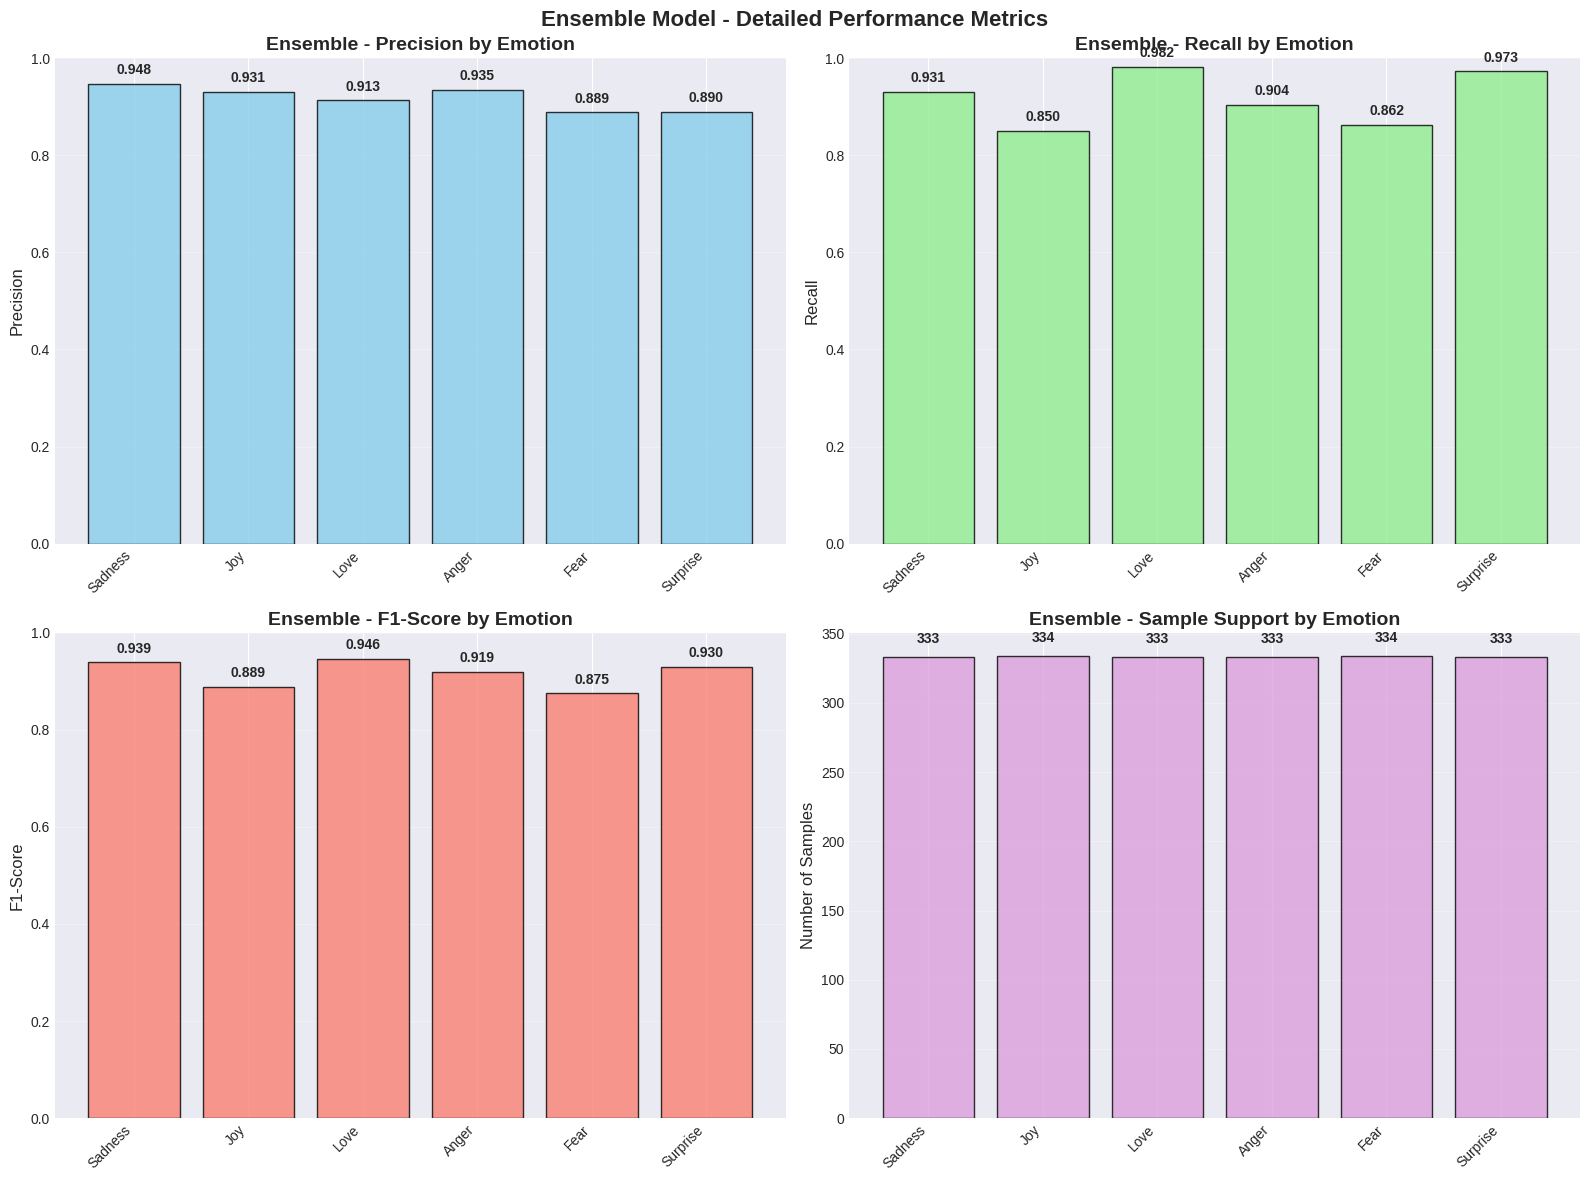

In [88]:
# Visualization: Metrics Bar Chart for Ensemble
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Precision
axes[0, 0].bar(ensemble_per_class['Emotion'], ensemble_per_class['Precision'],
               color='skyblue', alpha=0.8, edgecolor='black')
axes[0, 0].set_title('Ensemble - Precision by Emotion', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Precision', fontsize=12)
axes[0, 0].set_ylim([0, 1.0])
axes[0, 0].grid(True, alpha=0.3, axis='y')
plt.setp(axes[0, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(ensemble_per_class['Precision']):
    axes[0, 0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# Recall
axes[0, 1].bar(ensemble_per_class['Emotion'], ensemble_per_class['Recall'],
               color='lightgreen', alpha=0.8, edgecolor='black')
axes[0, 1].set_title('Ensemble - Recall by Emotion', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Recall', fontsize=12)
axes[0, 1].set_ylim([0, 1.0])
axes[0, 1].grid(True, alpha=0.3, axis='y')
plt.setp(axes[0, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(ensemble_per_class['Recall']):
    axes[0, 1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# F1-Score
axes[1, 0].bar(ensemble_per_class['Emotion'], ensemble_per_class['F1-Score'],
               color='salmon', alpha=0.8, edgecolor='black')
axes[1, 0].set_title('Ensemble - F1-Score by Emotion', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('F1-Score', fontsize=12)
axes[1, 0].set_ylim([0, 1.0])
axes[1, 0].grid(True, alpha=0.3, axis='y')
plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(ensemble_per_class['F1-Score']):
    axes[1, 0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# Support
axes[1, 1].bar(ensemble_per_class['Emotion'], ensemble_per_class['Support'],
               color='plum', alpha=0.8, edgecolor='black')
axes[1, 1].set_title('Ensemble - Sample Support by Emotion', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Number of Samples', fontsize=12)
axes[1, 1].grid(True, alpha=0.3, axis='y')
plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(ensemble_per_class['Support']):
    axes[1, 1].text(i, v + 10, f'{int(v)}', ha='center', fontweight='bold')

plt.suptitle('Ensemble Model - Detailed Performance Metrics',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('ensemble_detailed_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

In [89]:
# Classification Report
print(f"\n CLASSIFICATION REPORT (Test Set):")
print("-" * 80)
ensemble_report = classification_report(y_test, ensemble_test_pred,
                                        target_names=list(emotion_labels.values()),
                                        digits=4)
print(ensemble_report)


 CLASSIFICATION REPORT (Test Set):
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

     Sadness     0.9480    0.9309    0.9394       333
         Joy     0.9311    0.8503    0.8889       334
        Love     0.9134    0.9820    0.9465       333
       Anger     0.9348    0.9039    0.9191       333
        Fear     0.8889    0.8623    0.8754       334
    Surprise     0.8901    0.9730    0.9297       333

    accuracy                         0.9170      2000
   macro avg     0.9177    0.9171    0.9165      2000
weighted avg     0.9177    0.9170    0.9164      2000



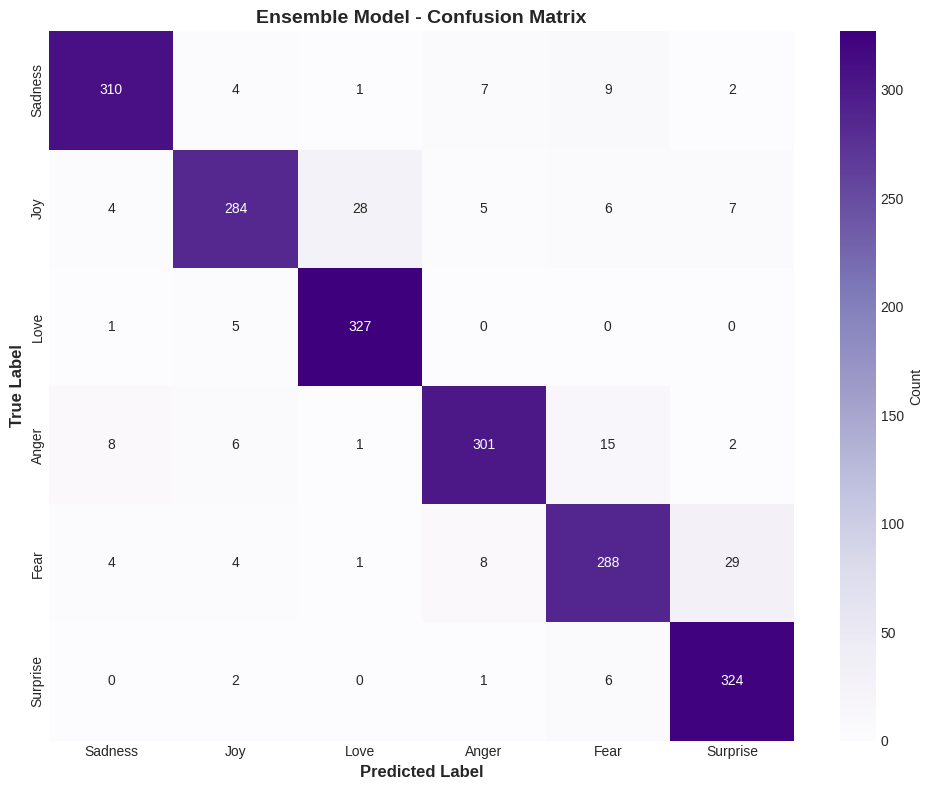

In [90]:
# Confusion Matrix
ensemble_cm = confusion_matrix(y_test, ensemble_test_pred)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(ensemble_cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=list(emotion_labels.values()),
            yticklabels=list(emotion_labels.values()),
            cbar_kws={'label': 'Count'})
ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax.set_title('Ensemble Model - Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('ensemble_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


 ENSEMBLE VOTING ANALYSIS:
--------------------------------------------------------------------------------

Voting Agreement Distribution:
  Unanimous (3/3)..........  1824 (91.20%)
  Majority (2/3)...........   173 (8.65%)
  Split (1/1/1)............     3 (0.15%)


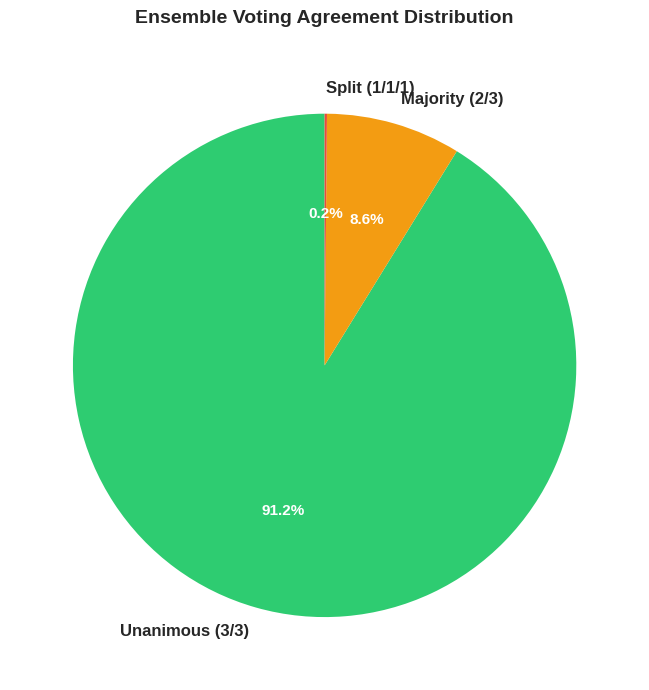

In [91]:
# Voting Analysis - Show how each model voted
print("\n ENSEMBLE VOTING ANALYSIS:")
print("-" * 80)

# Get predictions from each base model
mnb_preds = mnb_model.predict(X_test_tfidf)
lr_preds = lr_model.predict(X_test_tfidf)
svm_preds = svm_model.predict(X_test_tfidf)

# Analyze voting patterns
voting_agreement = []
for i in range(len(y_test)):
    votes = [mnb_preds[i], lr_preds[i], svm_preds[i]]
    unique_votes = len(set(votes))

    if unique_votes == 1:
        agreement = 'Unanimous (3/3)'
    elif unique_votes == 2:
        agreement = 'Majority (2/3)'
    else:
        agreement = 'Split (1/1/1)'

    voting_agreement.append(agreement)

voting_counts = pd.Series(voting_agreement).value_counts()
print("\nVoting Agreement Distribution:")
for agreement, count in voting_counts.items():
    percentage = count / len(y_test) * 100
    print(f"  {agreement:.<25} {count:>5} ({percentage:.2f}%)")

# Visualization: Voting Agreement
fig, ax = plt.subplots(figsize=(10, 7))
colors_vote = ['#2ecc71', '#f39c12', '#e74c3c']
wedges, texts, autotexts = ax.pie(
    voting_counts.values,
    labels=voting_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_vote,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)
ax.set_title('Ensemble Voting Agreement Distribution', fontsize=14, fontweight='bold', pad=20)
plt.setp(autotexts, size=11, weight="bold", color="white")
plt.tight_layout()
plt.savefig('ensemble_voting_agreement.png', dpi=300, bbox_inches='tight')
plt.show()

### SAMPLE PREDICTIONS WITH VOTING BREAKDOWN

In [92]:
# Sample Predictions with Individual Model Votes
print("\n ENSEMBLE - SAMPLE PREDICTIONS WITH VOTING BREAKDOWN:")
print("=" * 150)

sample_indices = np.random.choice(len(test_df), 10, replace=False)
ensemble_samples = []

for idx in sample_indices:
    actual_idx = test_df.index[idx]
    text = test_df.loc[actual_idx, 'text']
    true_label = y_test[idx]
    ensemble_pred = ensemble_test_pred[idx]

    # Get individual predictions
    mnb_pred = mnb_preds[idx]
    lr_pred = lr_preds[idx]
    svm_pred = svm_preds[idx]

    print(f"\nSample {len(ensemble_samples) + 1}:")
    print(f"Text: {text}")
    print(f"True Emotion: {emotion_labels[true_label]}")
    print(f"Voting Breakdown:")
    print(f"  Naive Bayes:        {emotion_labels[mnb_pred]}")
    print(f"  Logistic Regression: {emotion_labels[lr_pred]}")
    print(f"  SVM:                {emotion_labels[svm_pred]}")
    print(f"Final Prediction:     {emotion_labels[ensemble_pred]} {'CORRECT' if true_label == ensemble_pred else 'INCORRECT'}")

    ensemble_samples.append({
        'Text': text[:50] + '...' if len(text) > 50 else text,
        'True': emotion_labels[true_label],
        'MNB': emotion_labels[mnb_pred],
        'LR': emotion_labels[lr_pred],
        'SVM': emotion_labels[svm_pred],
        'Ensemble': emotion_labels[ensemble_pred],
        'Correct': 'TRUE' if true_label == ensemble_pred else 'FALSE'
    })

ensemble_samples_df = pd.DataFrame(ensemble_samples)
print("\n" + "=" * 100)
print("SUMMARY TABLE:")
print(ensemble_samples_df.to_string(index=False))


 ENSEMBLE - SAMPLE PREDICTIONS WITH VOTING BREAKDOWN:

Sample 1:
Text: i feel terrified worried concerned confused frustrated impatient
True Emotion: Fear
Voting Breakdown:
  Naive Bayes:        Fear
  Logistic Regression: Fear
  SVM:                Fear
Final Prediction:     Fear CORRECT

Sample 2:
Text: i feel humiliated to have it revealed outside of the house itself
True Emotion: Sadness
Voting Breakdown:
  Naive Bayes:        Sadness
  Logistic Regression: Sadness
  SVM:                Sadness
Final Prediction:     Sadness CORRECT

Sample 3:
Text: i feel glad to have let this go i dont have to bother with them they arent in my life that is empowering liberating
True Emotion: Joy
Voting Breakdown:
  Naive Bayes:        Joy
  Logistic Regression: Joy
  SVM:                Joy
Final Prediction:     Joy CORRECT

Sample 4:
Text: i have a feeling sims will either be horrible or awesome
True Emotion: Sadness
Voting Breakdown:
  Naive Bayes:        Sadness
  Logistic Regression: Sadness


### MODEL COMPARISION

In [93]:
# comparison DataFrame
comparison_data_updated = {
    'Model': ['Naive Bayes', 'Logistic Regression', 'SVM', 'Ensemble'],
    'Train Accuracy': [mnb_train_acc, lr_train_acc, svm_train_acc, ensemble_train_acc],
    'Validation Accuracy': [mnb_val_acc, lr_val_acc, svm_val_acc, ensemble_val_acc],
    'Test Accuracy': [mnb_test_acc, lr_test_acc, svm_test_acc, ensemble_test_acc]
}

comparison_df_updated = pd.DataFrame(comparison_data_updated)
print("\n MODEL ACCURACY COMPARISON:")
print("-" * 80)
print(comparison_df_updated.to_string(index=False))


 MODEL ACCURACY COMPARISON:
--------------------------------------------------------------------------------
              Model  Train Accuracy  Validation Accuracy  Test Accuracy
        Naive Bayes        0.940684               0.8755         0.8835
Logistic Regression        0.956622               0.9040         0.9160
                SVM        0.979186               0.9090         0.9130
           Ensemble        0.961685               0.9060         0.9170


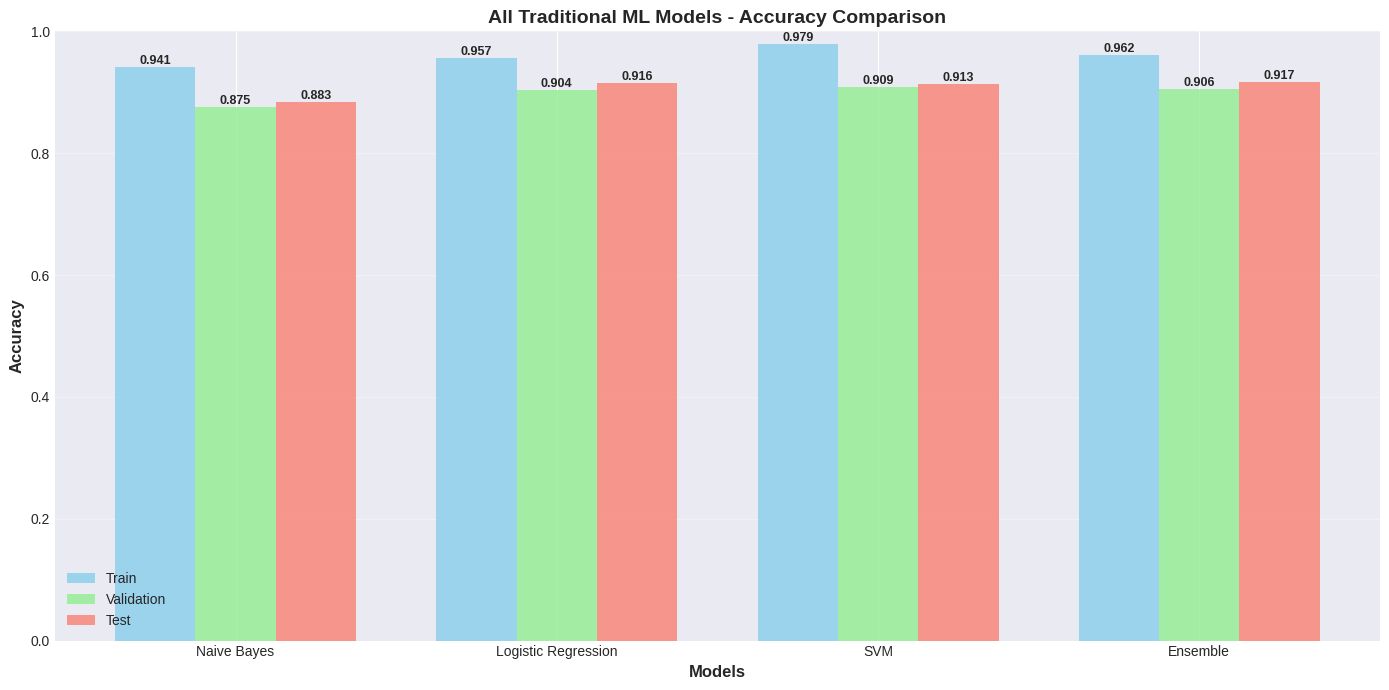

In [94]:
# Visualization: Updated Model Comparison
fig, ax = plt.subplots(figsize=(14, 7))

x = np.arange(len(comparison_df_updated['Model']))
width = 0.25

bars1 = ax.bar(x - width, comparison_df_updated['Train Accuracy'], width,
               label='Train', alpha=0.8, color='skyblue')
bars2 = ax.bar(x, comparison_df_updated['Validation Accuracy'], width,
               label='Validation', alpha=0.8, color='lightgreen')
bars3 = ax.bar(x + width, comparison_df_updated['Test Accuracy'], width,
               label='Test', alpha=0.8, color='salmon')

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('All Traditional ML Models - Accuracy Comparison',
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df_updated['Model'])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0, 1.0])

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('all_ml_models_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


 Plotting ROC curves for Naive Bayes...


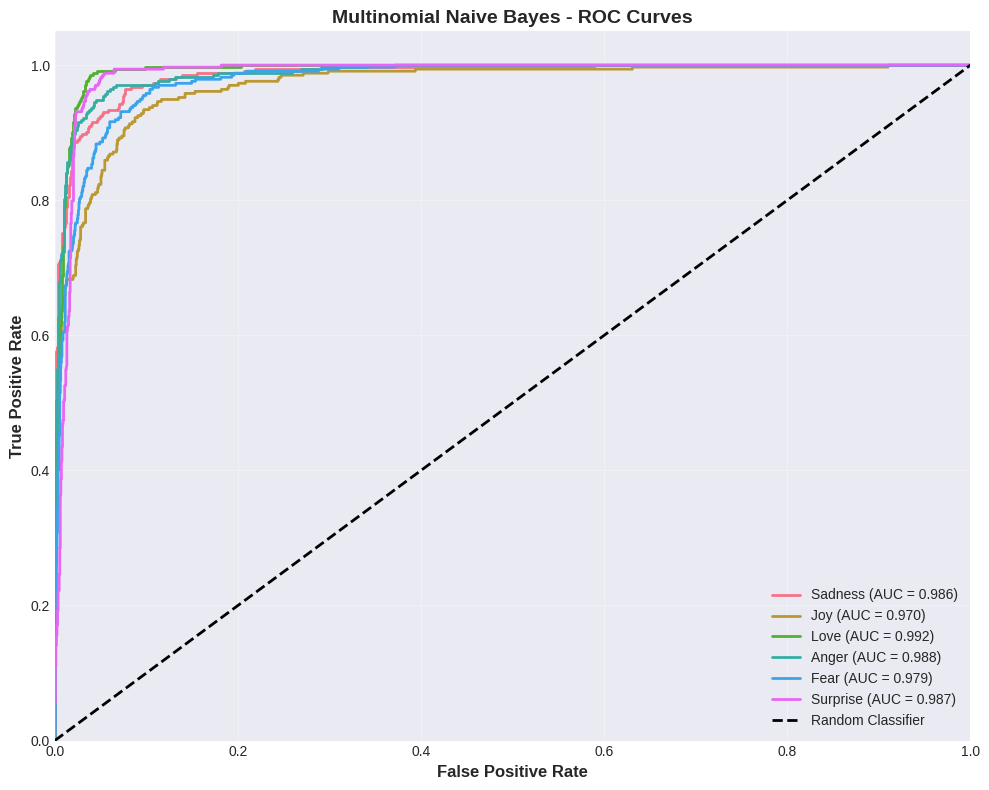

In [95]:
#  ROC CURVES - MULTICLASS

# Binarize the labels for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
n_classes = y_test_bin.shape[1]

# Naive Bayes probabilities
mnb_proba = mnb_model.predict_proba(X_test_tfidf)

# Logistic Regression probabilities
lr_proba = lr_model.predict_proba(X_test_tfidf)

# For SVM, we need to use decision_function and normalize
svm_decision = svm_model.decision_function(X_test_tfidf)
# Normalize SVM decision function to probabilities
from scipy.special import softmax
svm_proba = softmax(svm_decision, axis=1)

# Function to plot ROC curves
def plot_roc_curves(y_true_bin, y_proba, model_name, colors):
    """Plot ROC curves for multiclass classification"""
    fig, ax = plt.subplots(figsize=(10, 8))

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    emotion_names = list(emotion_labels.values())
    for i, emotion in enumerate(emotion_names):
        ax.plot(fpr[i], tpr[i], color=colors[i], lw=2,
                label=f'{emotion} (AUC = {roc_auc[i]:.3f})')

    # Plot diagonal
    ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
    ax.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
    ax.set_title(f'{model_name} - ROC Curves', fontsize=14, fontweight='bold')
    ax.legend(loc="lower right", fontsize=10)
    ax.grid(True, alpha=0.3)

    return fig, roc_auc

# Define colors for emotions
emotion_colors = sns.color_palette("husl", 6)

# Plot ROC for Naive Bayes
print("\n Plotting ROC curves for Naive Bayes...")
fig_mnb, mnb_auc = plot_roc_curves(y_test_bin, mnb_proba,
                                     'Multinomial Naive Bayes', emotion_colors)
plt.tight_layout()
plt.savefig('mnb_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()


 Plotting ROC curves for Logistic Regression...


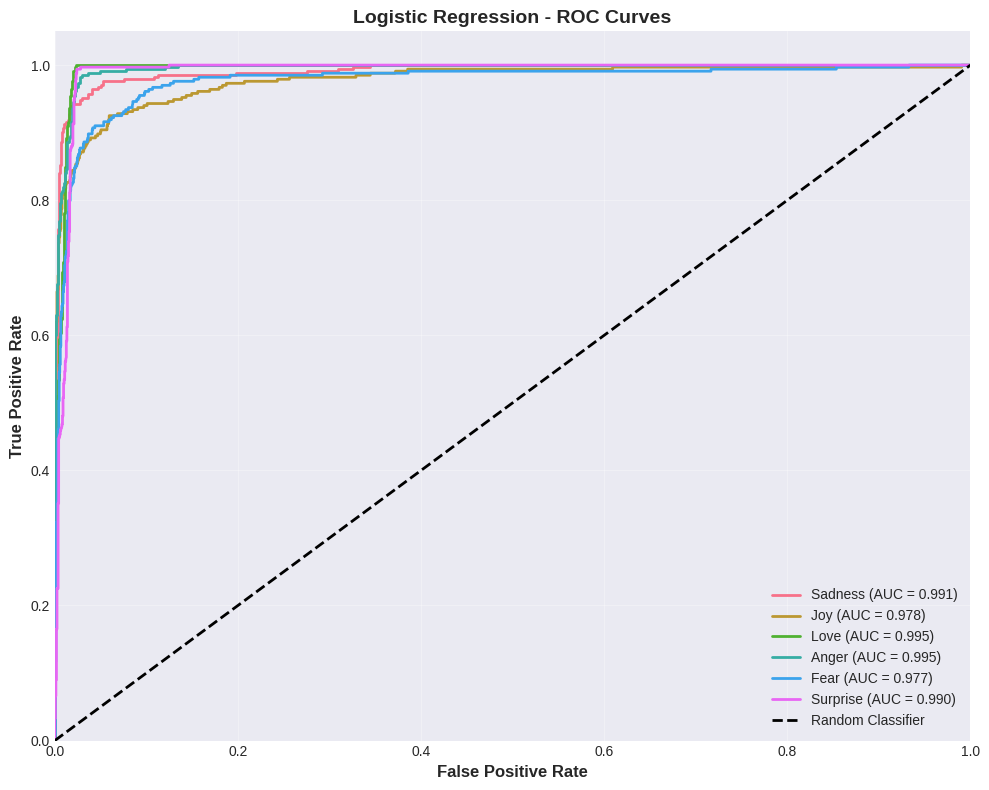

In [96]:
# Plot ROC for Logistic Regression
print("\n Plotting ROC curves for Logistic Regression...")
fig_lr, lr_auc = plot_roc_curves(y_test_bin, lr_proba,
                                  'Logistic Regression', emotion_colors)
plt.tight_layout()
plt.savefig('lr_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()


 Plotting ROC curves for SVM...


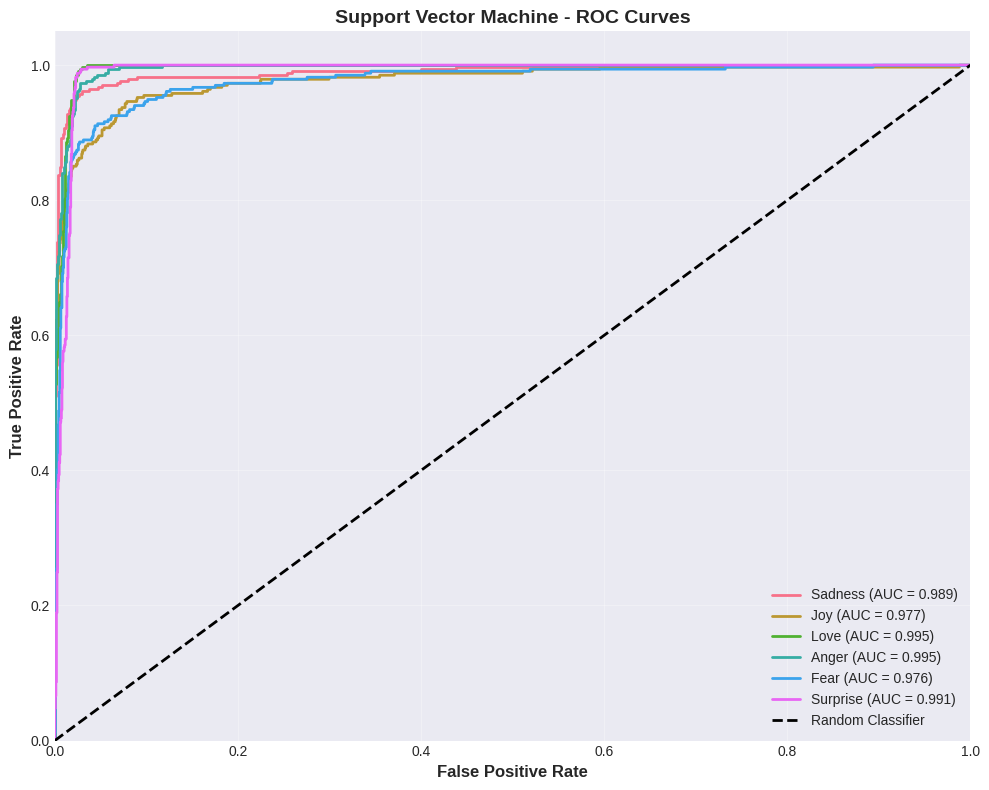

In [97]:
# Plot ROC for SVM
print("\n Plotting ROC curves for SVM...")
fig_svm, svm_auc = plot_roc_curves(y_test_bin, svm_proba,
                                    'Support Vector Machine', emotion_colors)
plt.tight_layout()
plt.savefig('svm_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

### AUC SCORE COMPARISION

In [98]:
# Create comparison DataFrame for AUC scores
auc_comparison = pd.DataFrame({
    'Emotion': list(emotion_labels.values()),
    'Naive Bayes': [mnb_auc[i] for i in range(n_classes)],
    'Logistic Regression': [lr_auc[i] for i in range(n_classes)],
    'SVM': [svm_auc[i] for i in range(n_classes)]
})

print("\n AUC SCORES BY EMOTION:")
print("-" * 80)
print(auc_comparison.to_string(index=False))


 AUC SCORES BY EMOTION:
--------------------------------------------------------------------------------
 Emotion  Naive Bayes  Logistic Regression      SVM
 Sadness     0.985679             0.991151 0.989382
     Joy     0.970199             0.977783 0.977269
    Love     0.992130             0.994689 0.995051
   Anger     0.987862             0.994848 0.994772
    Fear     0.978737             0.976669 0.976051
Surprise     0.986911             0.990130 0.990568


In [99]:
# Calculate macro-average AUC
macro_auc = {
    'Naive Bayes': np.mean(list(mnb_auc.values())),
    'Logistic Regression': np.mean(list(lr_auc.values())),
    'SVM': np.mean(list(svm_auc.values()))
}

print("\n MACRO-AVERAGE AUC:")
print("-" * 80)
for model, auc_score in macro_auc.items():
    print(f"  {model:.<30} {auc_score:.4f}")



 MACRO-AVERAGE AUC:
--------------------------------------------------------------------------------
  Naive Bayes................... 0.9836
  Logistic Regression........... 0.9875
  SVM........................... 0.9872


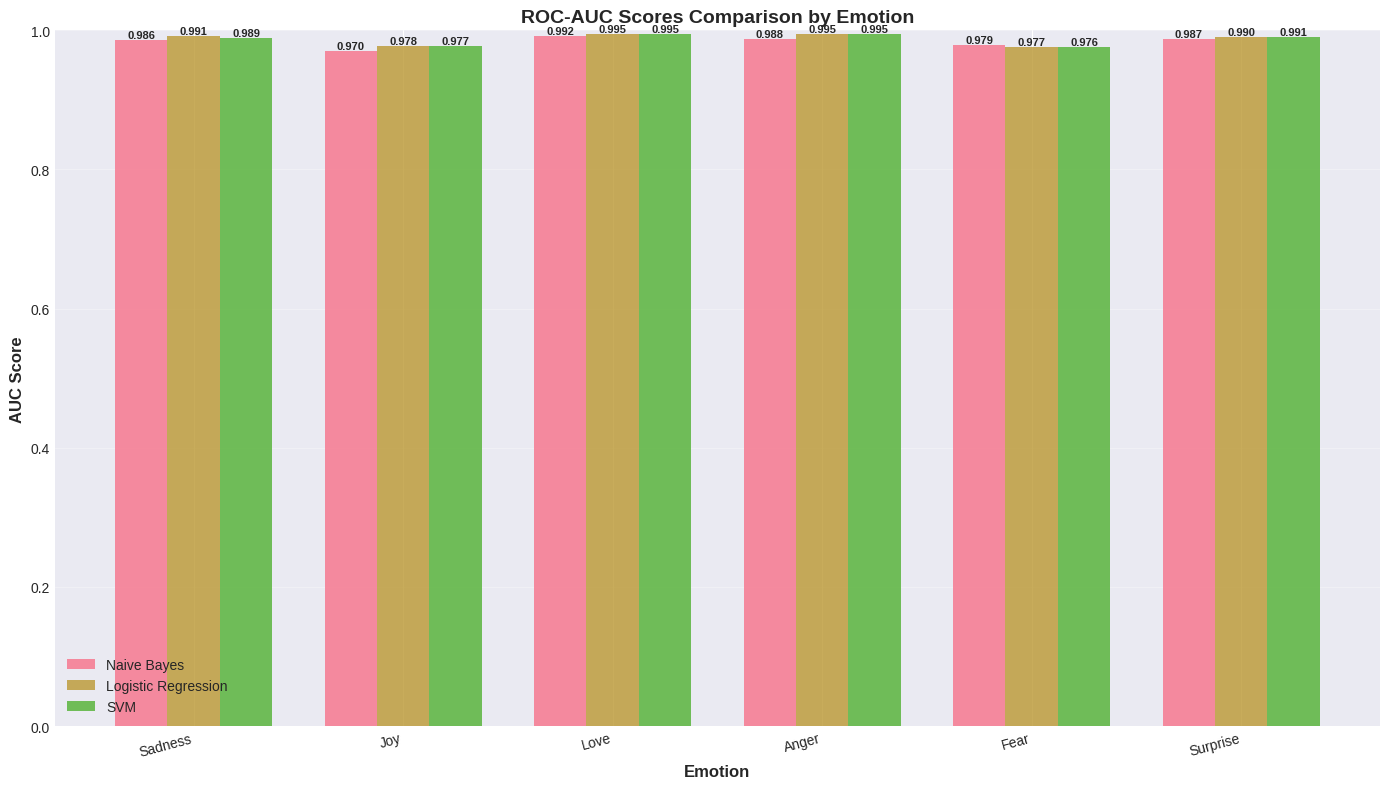

In [100]:
# Visualization: AUC Comparison
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(auc_comparison['Emotion']))
width = 0.25

bars1 = ax.bar(x - width, auc_comparison['Naive Bayes'], width,
               label='Naive Bayes', alpha=0.8)
bars2 = ax.bar(x, auc_comparison['Logistic Regression'], width,
               label='Logistic Regression', alpha=0.8)
bars3 = ax.bar(x + width, auc_comparison['SVM'], width,
               label='SVM', alpha=0.8)

ax.set_xlabel('Emotion', fontsize=12, fontweight='bold')
ax.set_ylabel('AUC Score', fontsize=12, fontweight='bold')
ax.set_title('ROC-AUC Scores Comparison by Emotion', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(auc_comparison['Emotion'], rotation=15, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0, 1.0])

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.savefig('auc_scores_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

### MODEL COMPARISION STATISTICS

In [101]:
# Create comprehensive summary
summary_data = {
    'Model': ['Naive Bayes', 'Logistic Regression', 'SVM', 'Ensemble'],
    'Test Accuracy': [mnb_test_acc, lr_test_acc, svm_test_acc, ensemble_test_acc],
    'Macro Avg F1': [
        f1_score(y_test, mnb_test_pred, average='macro'),
        f1_score(y_test, lr_test_pred, average='macro'),
        f1_score(y_test, svm_test_pred, average='macro'),
        f1_score(y_test, ensemble_test_pred, average='macro')
    ],
    'Macro Avg Precision': [
        precision_score(y_test, mnb_test_pred, average='macro'),
        precision_score(y_test, lr_test_pred, average='macro'),
        precision_score(y_test, svm_test_pred, average='macro'),
        precision_score(y_test, ensemble_test_pred, average='macro')
    ],
    'Macro Avg Recall': [
        recall_score(y_test, mnb_test_pred, average='macro'),
        recall_score(y_test, lr_test_pred, average='macro'),
        recall_score(y_test, svm_test_pred, average='macro'),
        recall_score(y_test, ensemble_test_pred, average='macro')
    ],
    'Macro Avg AUC': [
        macro_auc['Naive Bayes'],
        macro_auc['Logistic Regression'],
        macro_auc['SVM'],
        np.nan  # Ensemble doesn't have probabilities for AUC
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n COMPREHENSIVE MODEL SUMMARY:")
print("-" * 100)
print(summary_df.to_string(index=False))


 COMPREHENSIVE MODEL SUMMARY:
----------------------------------------------------------------------------------------------------
              Model  Test Accuracy  Macro Avg F1  Macro Avg Precision  Macro Avg Recall  Macro Avg AUC
        Naive Bayes         0.8835      0.882856             0.886169          0.883566       0.983586
Logistic Regression         0.9160      0.915494             0.916605          0.916058       0.987545
                SVM         0.9130      0.912618             0.913447          0.913051       0.987182
           Ensemble         0.9170      0.916483             0.917725          0.917061            NaN


### CUSTOM PREDICTION SYSTEM FOR ALL MODELS

In [102]:
# CUSTOM PREDICTION SYSTEM FOR ALL MODELS
class EmotionPredictor:
    """
    Complete emotion prediction system for all models
    """

    def __init__(self, preprocessor, vectorizer, models, emotion_labels):
        self.preprocessor = preprocessor
        self.vectorizer = vectorizer
        self.models = models
        self.emotion_labels = emotion_labels

    def predict_single_model(self, text, model_name):
        """Predict emotion using a single model"""
        # Preprocess
        cleaned_text = self.preprocessor.preprocess(text)
        text_tfidf = self.vectorizer.transform([cleaned_text])

        # Get model
        model = self.models[model_name]

        # Predict
        prediction = model.predict(text_tfidf)[0]

        # Get probabilities if available
        if hasattr(model, 'predict_proba'):
            probabilities = model.predict_proba(text_tfidf)[0]
        elif hasattr(model, 'decision_function'):
            from scipy.special import softmax
            decision = model.decision_function(text_tfidf)[0]
            probabilities = softmax(decision)
        else:
            probabilities = None

        return prediction, probabilities

    def predict_all_models(self, text, show_details=True):
        """Predict using all models and show comparison"""

        results = {}

        for model_name in self.models.keys():
            prediction, probabilities = self.predict_single_model(text, model_name)

            results[model_name] = {
                'prediction': self.emotion_labels[prediction],
                'prediction_label': prediction,
                'probabilities': probabilities
            }

        if show_details:
            print(f"\n{'='*80}")
            print(f"TEXT: {text}")
            print(f"{'='*80}")

            for model_name, result in results.items():
                print(f"\n{model_name}:")
                print(f"  Predicted Emotion: {result['prediction']}")

                if result['probabilities'] is not None:
                    print(f"  Confidence Scores:")
                    # Print as a neat table with percentages
                    for emotion_name, prob in zip(self.emotion_labels.values(),
                                                   result['probabilities']):
                        print(f"    {emotion_name:<15} {prob*100:6.2f}%")

        return results


    def predict_ensemble(self, text):
        """Predict using ensemble approach"""
        cleaned_text = self.preprocessor.preprocess(text)
        text_tfidf = self.vectorizer.transform([cleaned_text])

        ensemble_pred = ensemble_model.predict(text_tfidf)[0]

        # Get individual predictions
        predictions = {}
        for model_name in self.models.keys():
            if model_name != 'Ensemble':
                pred = self.models[model_name].predict(text_tfidf)[0]
                predictions[model_name] = self.emotion_labels[pred]

        return self.emotion_labels[ensemble_pred], predictions

# Initialize predictor
models_dict = {
    'Naive Bayes': mnb_model,
    'Logistic Regression': lr_model,
    'SVM': svm_model
}

predictor = EmotionPredictor(preprocessor, tfidf_vectorizer, models_dict, emotion_labels)


In [103]:
custom_texts = [
    "The sound outside my window makes me so nervous. I feel unsafe and scared.",
    "I just won first place in the competition! I'm so thrilled and proud of myself.",
    "Ever since you left, I feel broken inside. The pain of losing you never fades.",
    "This is outrageous! I can't believe they treated me with such disrespect.",
    "I opened the box and found a brand new phone inside. I was completely shocked!",
    "You are my everything. I cherish you more than words could ever express."
]


prediction_results = []

for i, text in enumerate(custom_texts, 1):
    print(f"CUSTOM PREDICTION #{i}")
    results = predictor.predict_all_models(text, show_details=True)

    # Get ensemble prediction
    ensemble_pred, individual_preds = predictor.predict_ensemble(text)

    print(f"\n ENSEMBLE VOTING:")
    print(f"  Individual Votes:")
    for model, pred in individual_preds.items():
        print(f"    {model:.<25} {pred}")
    print(f"  Final Ensemble Prediction: {ensemble_pred}")

    # Store for summary
    prediction_results.append({
        'Text': text[:40] + '...' if len(text) > 40 else text,
        'Naive Bayes': results['Naive Bayes']['prediction'],
        'Logistic Reg': results['Logistic Regression']['prediction'],
        'SVM': results['SVM']['prediction'],
        'Ensemble': ensemble_pred
    })

CUSTOM PREDICTION #1

TEXT: The sound outside my window makes me so nervous. I feel unsafe and scared.

Naive Bayes:
  Predicted Emotion: Fear
  Confidence Scores:
    Sadness           3.53%
    Joy               5.24%
    Love              4.64%
    Anger            10.66%
    Fear             67.94%
    Surprise          8.00%

Logistic Regression:
  Predicted Emotion: Fear
  Confidence Scores:
    Sadness           1.00%
    Joy               1.54%
    Love              1.22%
    Anger             1.97%
    Fear             93.15%
    Surprise          1.11%

SVM:
  Predicted Emotion: Fear
  Confidence Scores:
    Sadness           2.54%
    Joy               2.86%
    Love              5.99%
    Anger             7.19%
    Fear             75.49%
    Surprise          5.93%

 ENSEMBLE VOTING:
  Individual Votes:
    Naive Bayes.............. Fear
    Logistic Regression...... Fear
    SVM...................... Fear
  Final Ensemble Prediction: Fear
CUSTOM PREDICTION #2

TEXT: I ju

In [104]:
# Summary table
print("CUSTOM PREDICTIONS SUMMARY")
prediction_results_df = pd.DataFrame(prediction_results)
print(prediction_results_df.to_string(index=False))

CUSTOM PREDICTIONS SUMMARY
                                       Text Naive Bayes Logistic Reg      SVM Ensemble
The sound outside my window makes me so ...        Fear         Fear     Fear     Fear
I just won first place in the competitio...         Joy          Joy      Joy      Joy
Ever since you left, I feel broken insid...        Fear      Sadness     Fear     Fear
This is outrageous! I can't believe they...       Anger        Anger    Anger    Anger
I opened the box and found a brand new p...    Surprise     Surprise Surprise Surprise
You are my everything. I cherish you mor...        Love          Joy  Sadness  Sadness


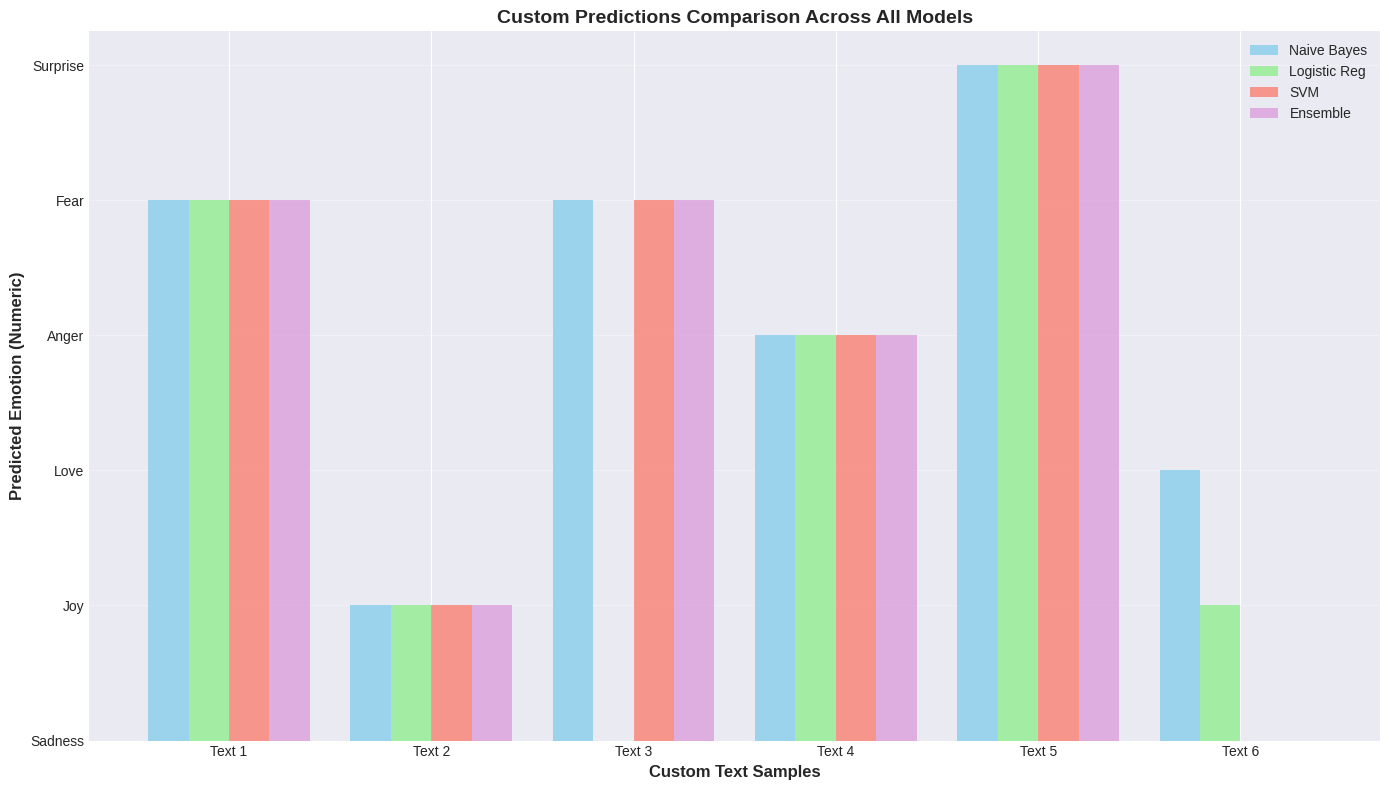

In [105]:
# Visualize custom predictions
fig, ax = plt.subplots(figsize=(14, 8))

# Prepare data for grouped bar chart
x = np.arange(len(custom_texts))
width = 0.2

models_list = ['Naive Bayes', 'Logistic Reg', 'SVM', 'Ensemble']
colors_custom = ['skyblue', 'lightgreen', 'salmon', 'plum']

for idx, (model, color) in enumerate(zip(models_list, colors_custom)):
    # Convert emotions to numeric for visualization
    emotion_to_num = {v: k for k, v in emotion_labels.items()}
    values = [emotion_to_num[row[model]] for _, row in prediction_results_df.iterrows()]

    offset = width * (idx - 1.5)
    ax.bar(x + offset, values, width, label=model, color=color, alpha=0.8)

ax.set_xlabel('Custom Text Samples', fontsize=12, fontweight='bold')
ax.set_ylabel('Predicted Emotion (Numeric)', fontsize=12, fontweight='bold')
ax.set_title('Custom Predictions Comparison Across All Models', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([f'Text {i+1}' for i in range(len(custom_texts))])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Add emotion labels on y-axis
emotion_ticks = list(emotion_labels.keys())
emotion_names = list(emotion_labels.values())
ax.set_yticks(emotion_ticks)
ax.set_yticklabels(emotion_names)

plt.tight_layout()
plt.savefig('custom_predictions_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

### Agreement analysis for custom predictions

In [106]:
# Agreement analysis for custom predictions
print("\n MODEL AGREEMENT ON CUSTOM PREDICTIONS:")
print("-" * 80)

for i, row in prediction_results_df.iterrows():
    predictions_set = set([row['Naive Bayes'], row['Logistic Reg'],
                           row['SVM'], row['Ensemble']])

    if len(predictions_set) == 1:
        agreement = "All models agree "
    elif len(predictions_set) == 2:
        agreement = "Partial agreement"
    else:
        agreement = "Models disagree"

    print(f"Text {i+1}: {agreement}")
    print(f"  Predictions: NB={row['Naive Bayes']}, LR={row['Logistic Reg']}, "
          f"SVM={row['SVM']}, Ensemble={row['Ensemble']}")



 MODEL AGREEMENT ON CUSTOM PREDICTIONS:
--------------------------------------------------------------------------------
Text 1: All models agree 
  Predictions: NB=Fear, LR=Fear, SVM=Fear, Ensemble=Fear
Text 2: All models agree 
  Predictions: NB=Joy, LR=Joy, SVM=Joy, Ensemble=Joy
Text 3: Partial agreement
  Predictions: NB=Fear, LR=Sadness, SVM=Fear, Ensemble=Fear
Text 4: All models agree 
  Predictions: NB=Anger, LR=Anger, SVM=Anger, Ensemble=Anger
Text 5: All models agree 
  Predictions: NB=Surprise, LR=Surprise, SVM=Surprise, Ensemble=Surprise
Text 6: Models disagree
  Predictions: NB=Love, LR=Joy, SVM=Sadness, Ensemble=Sadness


In [107]:
from sklearn.model_selection import (
    GridSearchCV, RandomizedSearchCV, cross_val_score,
    StratifiedKFold, learning_curve
)
from sklearn.metrics import make_scorer, f1_score

### SETUP CROSS-VALIDATION STRATEGY

In [108]:
print("\n CROSS-VALIDATION SETUP:")

# Use Stratified K-Fold to maintain class distribution
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print(" Using Stratified 5-Fold Cross-Validation")
print("   - Maintains class distribution in each fold")
print("   - Reduces variance in performance estimates")
print("   - More reliable than simple train-test split")


 CROSS-VALIDATION SETUP:
 Using Stratified 5-Fold Cross-Validation
   - Maintains class distribution in each fold
   - Reduces variance in performance estimates
   - More reliable than simple train-test split


### BASELINE CROSS-VALIDATION SCORES

In [109]:
print("\n" + "=" * 80)
print("BASELINE MODEL PERFORMANCE (Before Tuning)")
print("=" * 80)

def evaluate_model_cv(model, X, y, cv, model_name):
    """Evaluate model using cross-validation"""

    # Accuracy
    accuracy_scores = cross_val_score(model, X, y, cv=cv,
                                       scoring='accuracy', n_jobs=-1)

    # F1-Score (macro)
    f1_macro_scores = cross_val_score(model, X, y, cv=cv,
                                       scoring='f1_macro', n_jobs=-1)

    # F1-Score (weighted)
    f1_weighted_scores = cross_val_score(model, X, y, cv=cv,
                                          scoring='f1_weighted', n_jobs=-1)

    # Precision (macro)
    precision_scores = cross_val_score(model, X, y, cv=cv,
                                        scoring='precision_macro', n_jobs=-1)

    # Recall (macro)
    recall_scores = cross_val_score(model, X, y, cv=cv,
                                     scoring='recall_macro', n_jobs=-1)

    results = {
        'Model': model_name,
        'Accuracy_Mean': accuracy_scores.mean(),
        'Accuracy_Std': accuracy_scores.std(),
        'F1_Macro_Mean': f1_macro_scores.mean(),
        'F1_Macro_Std': f1_macro_scores.std(),
        'F1_Weighted_Mean': f1_weighted_scores.mean(),
        'F1_Weighted_Std': f1_weighted_scores.std(),
        'Precision_Mean': precision_scores.mean(),
        'Precision_Std': precision_scores.std(),
        'Recall_Mean': recall_scores.mean(),
        'Recall_Std': recall_scores.std()
    }

    return results

# Evaluate baseline models
print("\n Evaluating baseline models with 5-fold CV...")

baseline_results = []

# Naive Bayes
print("\n  Evaluating Naive Bayes...")
mnb_cv_results = evaluate_model_cv(mnb_model, X_train_tfidf, y_train,
                                    cv_strategy, 'Naive Bayes (Baseline)')
baseline_results.append(mnb_cv_results)

# Logistic Regression
print("  Evaluating Logistic Regression...")
lr_cv_results = evaluate_model_cv(lr_model, X_train_tfidf, y_train,
                                   cv_strategy, 'Logistic Regression (Baseline)')
baseline_results.append(lr_cv_results)

# SVM
print("  Evaluating SVM...")
svm_cv_results = evaluate_model_cv(svm_model, X_train_tfidf, y_train,
                                    cv_strategy, 'SVM (Baseline)')
baseline_results.append(svm_cv_results)

# Display baseline results
baseline_df = pd.DataFrame(baseline_results)

print("\n BASELINE CROSS-VALIDATION RESULTS:")
print("=" * 80)
print(f"\n{'Model':<35} {'Accuracy':<20} {'F1-Macro':<20}")
print("-" * 80)
for _, row in baseline_df.iterrows():
    print(f"{row['Model']:<35} {row['Accuracy_Mean']:.4f} ± {row['Accuracy_Std']:.4f}     "
          f"{row['F1_Macro_Mean']:.4f} ± {row['F1_Macro_Std']:.4f}")


BASELINE MODEL PERFORMANCE (Before Tuning)

 Evaluating baseline models with 5-fold CV...

  Evaluating Naive Bayes...
  Evaluating Logistic Regression...
  Evaluating SVM...

 BASELINE CROSS-VALIDATION RESULTS:

Model                               Accuracy             F1-Macro            
--------------------------------------------------------------------------------
Naive Bayes (Baseline)              0.8736 ± 0.0035     0.8731 ± 0.0035
Logistic Regression (Baseline)      0.9109 ± 0.0030     0.9104 ± 0.0031
SVM (Baseline)                      0.9124 ± 0.0035     0.9121 ± 0.0036


### HYPERPARAMETER TUNING - NAIVE BAYES

In [110]:
#  HYPERPARAMETER TUNING - NAIVE BAYES
print("\n" + "=" * 80)
print("HYPERPARAMETER TUNING - MULTINOMIAL NAIVE BAYES")
print("=" * 80)

print("\n Testing different alpha values (smoothing parameter)...")

# Parameter grid for Naive Bayes
mnb_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
}

# Grid Search with CV
mnb_grid_search = GridSearchCV(
    MultinomialNB(),
    param_grid=mnb_param_grid,
    cv=cv_strategy,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

mnb_grid_search.fit(X_train_tfidf, y_train)

print(f"\n Best Parameters: {mnb_grid_search.best_params_}")
print(f" Best CV F1-Score: {mnb_grid_search.best_score_:.4f}")

# Train best model
best_mnb = mnb_grid_search.best_estimator_
best_mnb_pred = best_mnb.predict(X_test_tfidf)
best_mnb_acc = accuracy_score(y_test, best_mnb_pred)
best_mnb_f1 = f1_score(y_test, best_mnb_pred, average='macro')

print(f"\n TEST SET PERFORMANCE:")
print(f"  Accuracy:  {best_mnb_acc:.4f} ({best_mnb_acc*100:.2f}%)")
print(f"  F1-Score:  {best_mnb_f1:.4f}")
print(f"  Improvement over baseline: {(best_mnb_f1 - mnb_cv_results['F1_Macro_Mean'])*100:+.2f}%")


HYPERPARAMETER TUNING - MULTINOMIAL NAIVE BAYES

 Testing different alpha values (smoothing parameter)...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

 Best Parameters: {'alpha': 2.0}
 Best CV F1-Score: 0.8809

 TEST SET PERFORMANCE:
  Accuracy:  0.8905 (89.05%)
  F1-Score:  0.8897
  Improvement over baseline: +1.66%


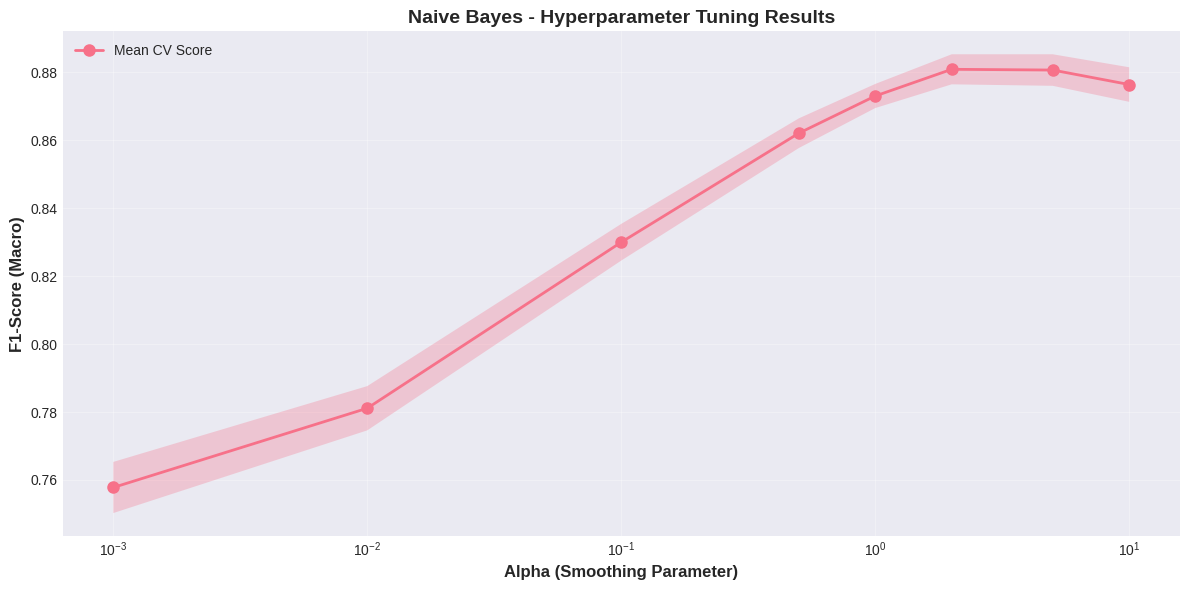

In [111]:
# Visualize hyperparameter search
mnb_results_df = pd.DataFrame(mnb_grid_search.cv_results_)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(mnb_param_grid['alpha'], mnb_results_df['mean_test_score'],
        'o-', linewidth=2, markersize=8, label='Mean CV Score')
ax.fill_between(mnb_param_grid['alpha'],
                 mnb_results_df['mean_test_score'] - mnb_results_df['std_test_score'],
                 mnb_results_df['mean_test_score'] + mnb_results_df['std_test_score'],
                 alpha=0.3)
ax.set_xlabel('Alpha (Smoothing Parameter)', fontsize=12, fontweight='bold')
ax.set_ylabel('F1-Score (Macro)', fontsize=12, fontweight='bold')
ax.set_title('Naive Bayes - Hyperparameter Tuning Results', fontsize=14, fontweight='bold')
ax.set_xscale('log')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.savefig('mnb_hyperparameter_tuning.png', dpi=300, bbox_inches='tight')
plt.show()

### HYPERPARAMETER TUNING - LOGISTIC REGRESSION

In [112]:
print("\n" + "=" * 80)
print("HYPERPARAMETER TUNING - LOGISTIC REGRESSION")
print("=" * 80)

print("\n Testing different C and solver combinations...")

# Parameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 50.0, 100.0],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [1000, 2000]
}

# Use RandomizedSearchCV for faster search
lr_random_search = RandomizedSearchCV(
    LogisticRegression( random_state=42),
    param_distributions=lr_param_grid,
    n_iter=30,  # Test 30 random combinations
    cv=cv_strategy,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

lr_random_search.fit(X_train_tfidf, y_train)

print(f"\n Best Parameters: {lr_random_search.best_params_}")
print(f" Best CV F1-Score: {lr_random_search.best_score_:.4f}")

# Train best model
best_lr = lr_random_search.best_estimator_
best_lr_pred = best_lr.predict(X_test_tfidf)
best_lr_acc = accuracy_score(y_test, best_lr_pred)
best_lr_f1 = f1_score(y_test, best_lr_pred, average='macro')

print(f"\n TEST SET PERFORMANCE:")
print(f"  Accuracy:  {best_lr_acc:.4f} ({best_lr_acc*100:.2f}%)")
print(f"  F1-Score:  {best_lr_f1:.4f}")
print(f"  Improvement over baseline: {(best_lr_f1 - lr_cv_results['F1_Macro_Mean'])*100:+.2f}%")


HYPERPARAMETER TUNING - LOGISTIC REGRESSION

 Testing different C and solver combinations...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Best Parameters: {'solver': 'liblinear', 'max_iter': 1000, 'C': 2.0}
 Best CV F1-Score: 0.9148

 TEST SET PERFORMANCE:
  Accuracy:  0.9200 (92.00%)
  F1-Score:  0.9195
  Improvement over baseline: +0.90%


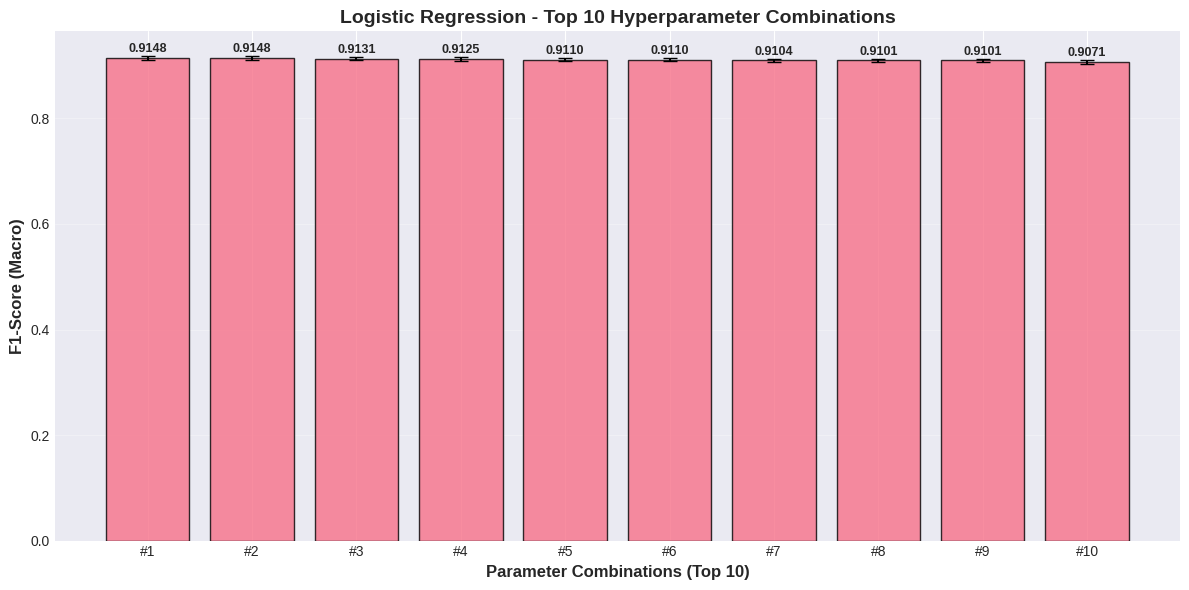

In [113]:
# Visualize top parameters
lr_results_df = pd.DataFrame(lr_random_search.cv_results_)
top_10 = lr_results_df.nlargest(10, 'mean_test_score')

fig, ax = plt.subplots(figsize=(12, 6))
x_pos = np.arange(len(top_10))
ax.bar(x_pos, top_10['mean_test_score'], yerr=top_10['std_test_score'],
       alpha=0.8, capsize=5, edgecolor='black')
ax.set_xlabel('Parameter Combinations (Top 10)', fontsize=12, fontweight='bold')
ax.set_ylabel('F1-Score (Macro)', fontsize=12, fontweight='bold')
ax.set_title('Logistic Regression - Top 10 Hyperparameter Combinations',
             fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels([f'#{i+1}' for i in range(len(top_10))], rotation=0)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, v in enumerate(top_10['mean_test_score']):
    ax.text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom',
            fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('lr_hyperparameter_tuning.png', dpi=300, bbox_inches='tight')
plt.show()

### HYPERPARAMETER TUNING - SVM

In [114]:
print("\n" + "=" * 80)
print("HYPERPARAMETER TUNING - SUPPORT VECTOR MACHINE")
print("=" * 80)

print("\n Testing different C values and loss functions...")

# Parameter grid for SVM
svm_param_grid = {
    'C': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 50.0],
    'loss': ['hinge', 'squared_hinge'],
    'max_iter': [2000, 3000]
}

svm_random_search = RandomizedSearchCV(
    LinearSVC(dual=False, random_state=42),
    param_distributions=svm_param_grid,
    n_iter=20,
    cv=cv_strategy,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

svm_random_search.fit(X_train_tfidf, y_train)

print(f"\n Best Parameters: {svm_random_search.best_params_}")
print(f" Best CV F1-Score: {svm_random_search.best_score_:.4f}")

# Train best model
best_svm = svm_random_search.best_estimator_
best_svm_pred = best_svm.predict(X_test_tfidf)
best_svm_acc = accuracy_score(y_test, best_svm_pred)
best_svm_f1 = f1_score(y_test, best_svm_pred, average='macro')

print(f"\n TEST SET PERFORMANCE:")
print(f"  Accuracy:  {best_svm_acc:.4f} ({best_svm_acc*100:.2f}%)")
print(f"  F1-Score:  {best_svm_f1:.4f}")
print(f"  Improvement over baseline: {(best_svm_f1 - svm_cv_results['F1_Macro_Mean'])*100:+.2f}%")


HYPERPARAMETER TUNING - SUPPORT VECTOR MACHINE

 Testing different C values and loss functions...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

 Best Parameters: {'max_iter': 3000, 'loss': 'squared_hinge', 'C': 0.5}
 Best CV F1-Score: 0.9169

 TEST SET PERFORMANCE:
  Accuracy:  0.9190 (91.90%)
  F1-Score:  0.9185
  Improvement over baseline: +0.64%


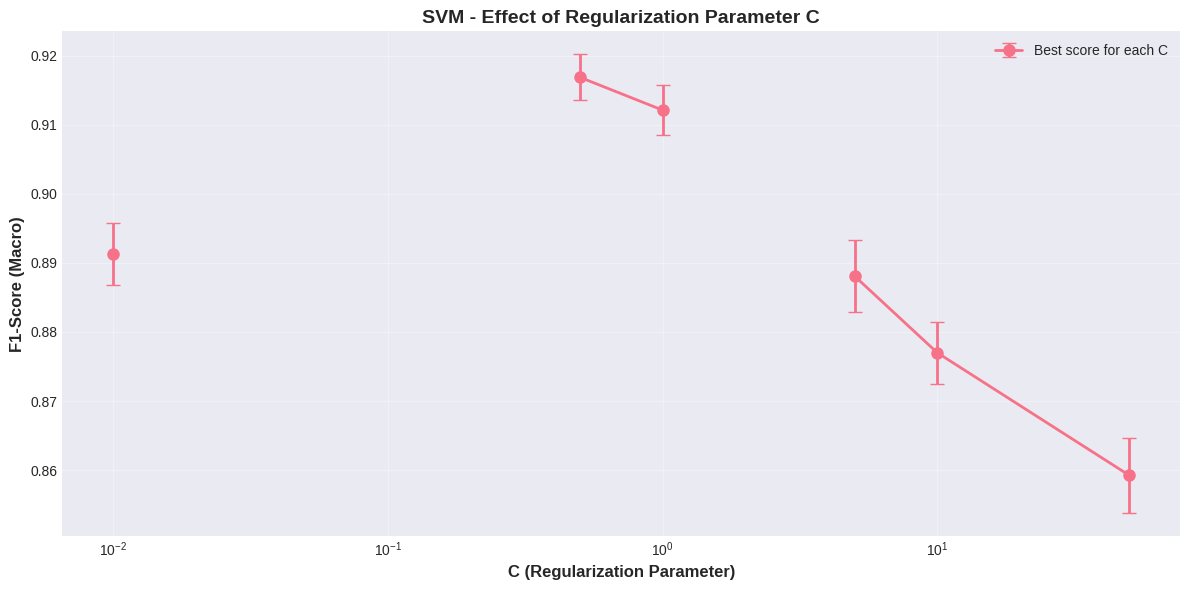

In [115]:
# Visualize C parameter effect
svm_results_df = pd.DataFrame(svm_random_search.cv_results_)

# Group by C value
c_values = []
c_scores = []
c_stds = []

for c in svm_param_grid['C']:
    mask = svm_results_df['param_C'] == c
    if mask.any():
        c_values.append(c)
        c_scores.append(svm_results_df[mask]['mean_test_score'].max())
        c_stds.append(svm_results_df[mask]['std_test_score'].mean())

fig, ax = plt.subplots(figsize=(12, 6))
ax.errorbar(c_values, c_scores, yerr=c_stds, fmt='o-', linewidth=2,
            markersize=8, capsize=5, label='Best score for each C')
ax.set_xlabel('C (Regularization Parameter)', fontsize=12, fontweight='bold')
ax.set_ylabel('F1-Score (Macro)', fontsize=12, fontweight='bold')
ax.set_title('SVM - Effect of Regularization Parameter C', fontsize=14, fontweight='bold')
ax.set_xscale('log')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.savefig('svm_hyperparameter_tuning.png', dpi=300, bbox_inches='tight')
plt.show()

### WHY MODELS CONFUSE SIMILAR EMOTIONS

In [116]:
print("\n" + "=" * 80)
print("ANALYSIS: WHY FEAR & SADNESS ARE CONFUSED")
print("=" * 80)

print("""
 ROOT CAUSES OF EMOTION CONFUSION:

1. SEMANTIC OVERLAP:
   - Fear and Sadness share negative sentiment
   - Both express distress and discomfort
   - Similar vocabulary: "worried", "upset", "bad", "terrible"

2. CONTEXTUAL AMBIGUITY:
   - "I'm worried about losing you" → Fear or Sadness?
   - "This is terrible" → Anger, Fear, or Sadness?
   - "I don't know what to do" → Fear, Sadness, or Surprise?

3. TF-IDF LIMITATIONS:
   - Doesn't capture word order or context
   - "not happy" vs "happy" treated independently
   - Misses subtle emotional nuances

4. CLASS BOUNDARY OVERLAP:
   - Emotions aren't discrete categories
   - People can feel multiple emotions simultaneously
   - Annotation subjectivity in training data

5. LIMITED FEATURES:
   - Bag-of-words loses sequential information
   - No consideration of:
     * Syntax and grammar
     * Negations and intensifiers
     * Contextual relationships
""")


ANALYSIS: WHY FEAR & SADNESS ARE CONFUSED

 ROOT CAUSES OF EMOTION CONFUSION:

1. SEMANTIC OVERLAP:
   - Fear and Sadness share negative sentiment
   - Both express distress and discomfort
   - Similar vocabulary: "worried", "upset", "bad", "terrible"

2. CONTEXTUAL AMBIGUITY:
   - "I'm worried about losing you" → Fear or Sadness?
   - "This is terrible" → Anger, Fear, or Sadness?
   - "I don't know what to do" → Fear, Sadness, or Surprise?

3. TF-IDF LIMITATIONS:
   - Doesn't capture word order or context
   - "not happy" vs "happy" treated independently
   - Misses subtle emotional nuances

4. CLASS BOUNDARY OVERLAP:
   - Emotions aren't discrete categories
   - People can feel multiple emotions simultaneously
   - Annotation subjectivity in training data

5. LIMITED FEATURES:
   - Bag-of-words loses sequential information
   - No consideration of:
     * Syntax and grammar
     * Negations and intensifiers
     * Contextual relationships



### DETAILED CONFUSION ANALYSIS

In [117]:
def analyze_confusion_pairs(y_true, y_pred, emotion_labels):
    """Analyze which emotion pairs are most confused"""

    cm = confusion_matrix(y_true, y_pred)

    confusion_pairs = []

    for i in range(len(emotion_labels)):
        for j in range(len(emotion_labels)):
            if i != j:  # Off-diagonal elements
                count = cm[i][j]
                if count > 0:
                    confusion_pairs.append({
                        'True_Emotion': emotion_labels[i],
                        'Predicted_As': emotion_labels[j],
                        'Count': count,
                        'Percentage': count / cm[i].sum() * 100
                    })

    # Sort by count
    confusion_df = pd.DataFrame(confusion_pairs)
    confusion_df = confusion_df.sort_values('Count', ascending=False)

    return confusion_df, cm

# Analyze best model (tuned Logistic Regression)
confusion_df, cm = analyze_confusion_pairs(y_test, best_lr_pred, emotion_labels)

print("\n TOP 20 MOST COMMON CONFUSION PAIRS:")
print("=" * 50)
print(confusion_df.head(20).to_string(index=False))


 TOP 20 MOST COMMON CONFUSION PAIRS:
True_Emotion Predicted_As  Count  Percentage
        Fear     Surprise     29    8.682635
         Joy         Love     28    8.383234
       Anger         Fear     16    4.804805
     Sadness         Fear      9    2.702703
       Anger      Sadness      8    2.402402
        Fear        Anger      8    2.395210
       Anger          Joy      7    2.102102
     Sadness        Anger      6    1.801802
        Fear      Sadness      5    1.497006
    Surprise         Fear      5    1.501502
         Joy     Surprise      5    1.497006
         Joy      Sadness      5    1.497006
     Sadness          Joy      5    1.501502
         Joy         Fear      5    1.497006
         Joy        Anger      4    1.197605
        Fear          Joy      3    0.898204
     Sadness     Surprise      2    0.600601
     Sadness         Love      2    0.600601
        Love      Sadness      2    0.600601
        Love          Joy      2    0.600601


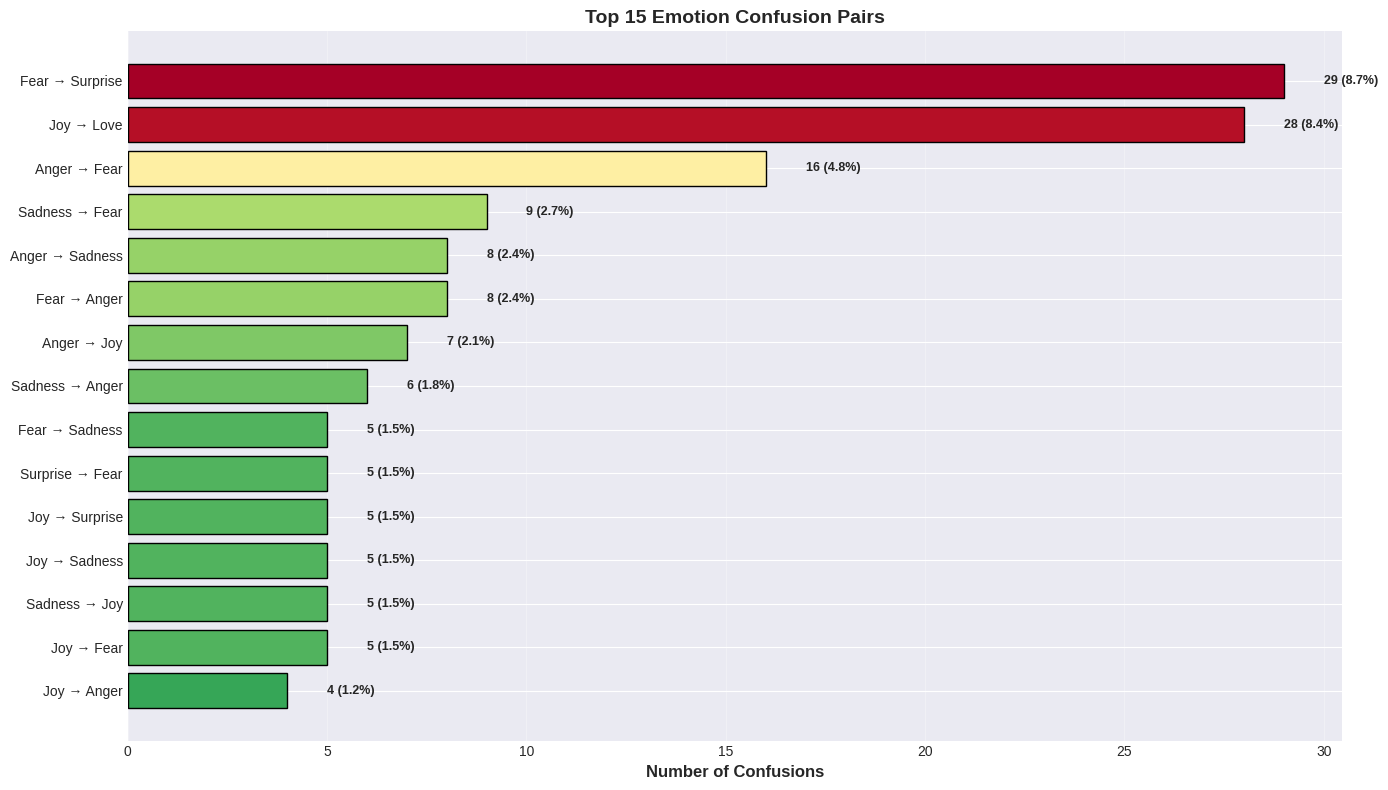

In [118]:
# Visualize confusion pairs
fig, ax = plt.subplots(figsize=(14, 8))

top_15 = confusion_df.head(15)
pairs = [f"{row['True_Emotion']} → {row['Predicted_As']}"
         for _, row in top_15.iterrows()]

colors = plt.cm.RdYlGn_r(top_15['Percentage'] / top_15['Percentage'].max())

bars = ax.barh(range(len(top_15)), top_15['Count'], color=colors, edgecolor='black')
ax.set_yticks(range(len(top_15)))
ax.set_yticklabels(pairs)
ax.set_xlabel('Number of Confusions', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Emotion Confusion Pairs', fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.grid(True, alpha=0.3, axis='x')

# Add percentage labels
for i, (bar, row) in enumerate(zip(bars, top_15.itertuples())):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{row.Count} ({row.Percentage:.1f}%)',
            ha='left', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('confusion_pairs_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

### ANALYZE CONFUSED SAMPLES - FEAR vs SADNESS

In [119]:
print("\n" + "=" * 80)
print("SAMPLE ANALYSIS: FEAR CONFUSED AS SADNESS")
print("=" * 80)
# Find Fear samples predicted as Sadness
fear_as_sadness_indices = np.where((y_test == 4) & (best_lr_pred == 0))[0]

print(f"\nTotal Fear samples confused as Sadness: {len(fear_as_sadness_indices)}")
print("\nSample Examples:")
print("-" * 80)

# Show examples
for i, idx in enumerate(fear_as_sadness_indices[:10], 1):
    actual_idx = test_df.index[idx]
    text = test_df.loc[actual_idx, 'text']
    print(f"\n{i}. {text}")
    print(f"   True: Fear | Predicted: Sadness")

print("\n" + "=" * 80)
print("SAMPLE ANALYSIS: SADNESS CONFUSED AS FEAR")
print("=" * 80)

# Find Sadness samples predicted as Fear
sadness_as_fear_indices = np.where((y_test == 0) & (best_lr_pred == 4))[0]

print(f"\nTotal Sadness samples confused as Fear: {len(sadness_as_fear_indices)}")
print("\nSample Examples:")
print("-" * 80)

for i, idx in enumerate(sadness_as_fear_indices[:10], 1):
    actual_idx = test_df.index[idx]
    text = test_df.loc[actual_idx, 'text']
    print(f"\n{i}. {text}")
    print(f"   True: Sadness | Predicted: Fear")


SAMPLE ANALYSIS: FEAR CONFUSED AS SADNESS

Total Fear samples confused as Sadness: 5

Sample Examples:
--------------------------------------------------------------------------------

1. i get stressed or discouraged because of a few bad naps or i feel confused as to what hunter wants but those moments aren t quite as common anymore
   True: Fear | Predicted: Sadness

2. as a child ie hiking in reasonably rugged bush and becoming lost for a duration of hours
   True: Fear | Predicted: Sadness

3. i have found some people feel inhibited and perhaps embarrassed to dance but there are many ways to move
   True: Fear | Predicted: Sadness

4. i feel absolutely no concern whatsoever that fully unprotected sex will have absolutely zero consequences
   True: Fear | Predicted: Sadness

5. i cant help but feel helpless n disappointed
   True: Fear | Predicted: Sadness

SAMPLE ANALYSIS: SADNESS CONFUSED AS FEAR

Total Sadness samples confused as Fear: 9

Sample Examples:
-----------------------

### WORD ANALYSIS - CONFUSED EMOTIONS

In [120]:
print("\n" + "=" * 80)
print("VOCABULARY ANALYSIS OF CONFUSED EMOTIONS")
print("=" * 80)

def get_words_from_confused_samples(test_df, y_test, y_pred,
                                     true_label, pred_label, preprocessor):
    """Extract words from confused samples"""

    confused_indices = np.where((y_test == true_label) & (y_pred == pred_label))[0]

    all_words = []
    for idx in confused_indices:
        actual_idx = test_df.index[idx]
        text = test_df.loc[actual_idx, 'text']
        cleaned = preprocessor.preprocess(text)
        words = cleaned.split()
        all_words.extend(words)

    return Counter(all_words)

# Get words from Fear confused as Sadness
fear_as_sadness_words = get_words_from_confused_samples(
    test_df, y_test, best_lr_pred, 4, 0, preprocessor
)

# Get words from Sadness confused as Fear
sadness_as_fear_words = get_words_from_confused_samples(
    test_df, y_test, best_lr_pred, 0, 4, preprocessor
)

# Get words from correctly classified Fear
fear_correct_indices = np.where((y_test == 4) & (best_lr_pred == 4))[0]
fear_correct_words = []
for idx in fear_correct_indices:
    actual_idx = test_df.index[idx]
    text = test_df.loc[actual_idx, 'text']
    cleaned = preprocessor.preprocess(text)
    fear_correct_words.extend(cleaned.split())
fear_correct_words = Counter(fear_correct_words)

# Get words from correctly classified Sadness
sadness_correct_indices = np.where((y_test == 0) & (best_lr_pred == 0))[0]
sadness_correct_words = []
for idx in sadness_correct_indices:
    actual_idx = test_df.index[idx]
    text = test_df.loc[actual_idx, 'text']
    cleaned = preprocessor.preprocess(text)
    sadness_correct_words.extend(cleaned.split())
sadness_correct_words = Counter(sadness_correct_words)

print("\n TOP WORDS IN FEAR→SADNESS CONFUSIONS:")
print("-" * 80)
for word, count in fear_as_sadness_words.most_common(20):
    print(f"  {word:.<25} {count:>4}")

print("\n TOP WORDS IN SADNESS→FEAR CONFUSIONS:")
print("-" * 80)
for word, count in sadness_as_fear_words.most_common(20):
    print(f"  {word:.<25} {count:>4}")


VOCABULARY ANALYSIS OF CONFUSED EMOTIONS

 TOP WORDS IN FEAR→SADNESS CONFUSIONS:
--------------------------------------------------------------------------------
  feel.....................    4
  absolutely...............    2
  get......................    1
  stressed.................    1
  discouraged..............    1
  bad......................    1
  nap......................    1
  confused.................    1
  hunter...................    1
  want.....................    1
  moment...................    1
  quite....................    1
  common...................    1
  anymore..................    1
  child....................    1
  ie.......................    1
  hiking...................    1
  reasonably...............    1
  rugged...................    1
  bush.....................    1

 TOP WORDS IN SADNESS→FEAR CONFUSIONS:
--------------------------------------------------------------------------------
  feel.....................    9
  helpless.............

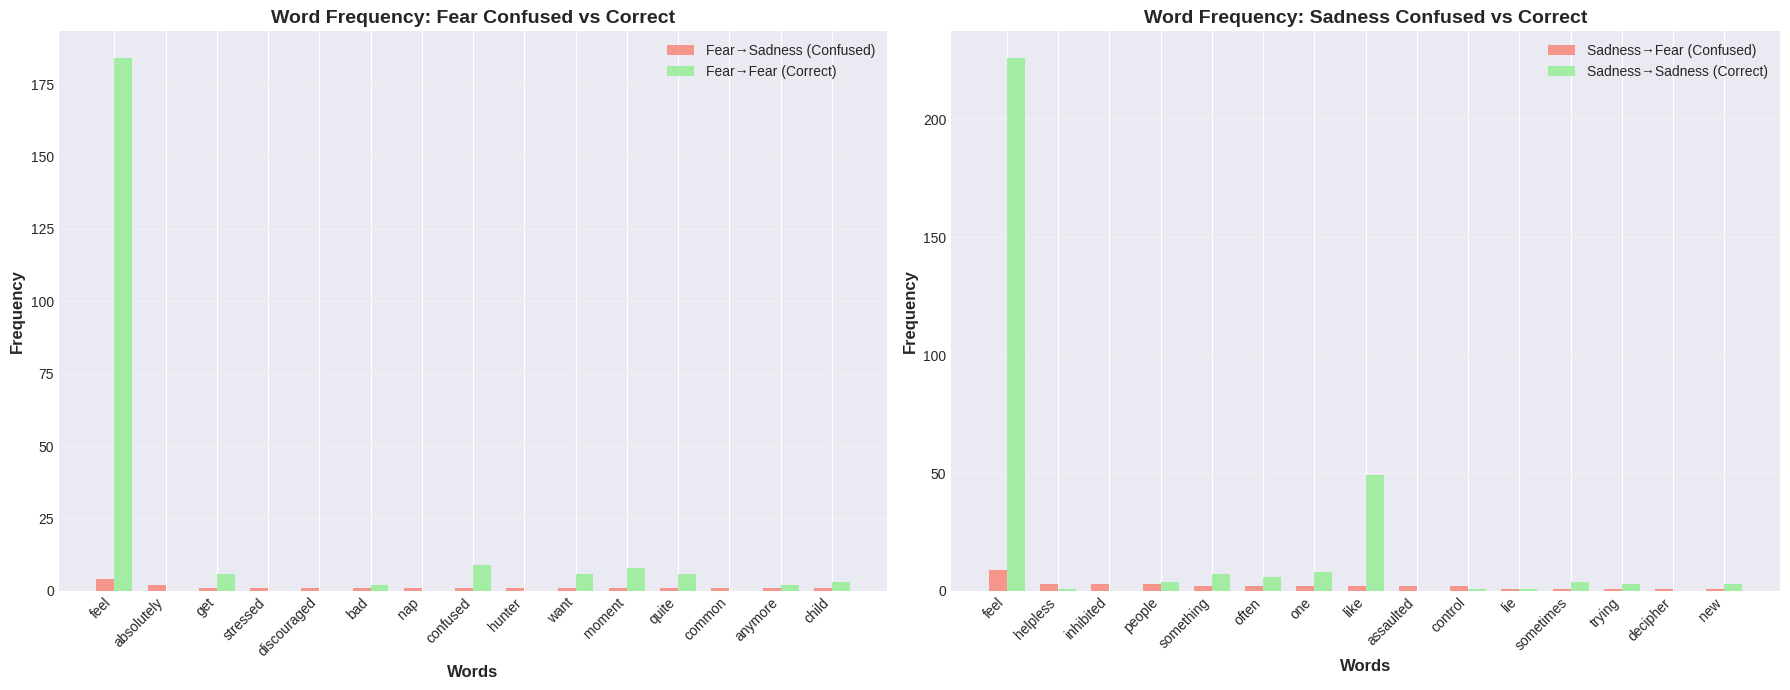

In [121]:
# Visualize overlapping words
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Fear words
fear_confused = fear_as_sadness_words.most_common(15)
fear_correct = [(w, fear_correct_words[w]) for w, _ in fear_confused]

x = np.arange(len(fear_confused))
width = 0.35

words_fear = [w for w, _ in fear_confused]
confused_counts = [c for _, c in fear_confused]
correct_counts = [c for _, c in fear_correct]

bars1 = axes[0].bar(x - width/2, confused_counts, width,
                    label='Fear→Sadness (Confused)', alpha=0.8, color='salmon')
bars2 = axes[0].bar(x + width/2, correct_counts, width,
                    label='Fear→Fear (Correct)', alpha=0.8, color='lightgreen')

axes[0].set_xlabel('Words', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Word Frequency: Fear Confused vs Correct',
                  fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(words_fear, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Sadness words
sadness_confused = sadness_as_fear_words.most_common(15)
sadness_correct = [(w, sadness_correct_words[w]) for w, _ in sadness_confused]

words_sadness = [w for w, _ in sadness_confused]
confused_counts_s = [c for _, c in sadness_confused]
correct_counts_s = [c for _, c in sadness_correct]

bars3 = axes[1].bar(x - width/2, confused_counts_s, width,
                    label='Sadness→Fear (Confused)', alpha=0.8, color='salmon')
bars4 = axes[1].bar(x + width/2, correct_counts_s, width,
                    label='Sadness→Sadness (Correct)', alpha=0.8, color='lightgreen')

axes[1].set_xlabel('Words', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_title('Word Frequency: Sadness Confused vs Correct',
                  fontsize=14, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(words_sadness, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('confused_vs_correct_words.png', dpi=300, bbox_inches='tight')
plt.show()

### IDENTIFY AMBIGUOUS WORDS

In [122]:
print("\n" + "=" * 80)
print("IDENTIFYING AMBIGUOUS WORDS (CAUSING CONFUSION)")
print("=" * 80)

# Find words that appear frequently in both Fear and Sadness
fear_words_set = set([w for w, _ in fear_correct_words.most_common(100)])
sadness_words_set = set([w for w, _ in sadness_correct_words.most_common(100)])

ambiguous_words = fear_words_set.intersection(sadness_words_set)

print(f"\n Found {len(ambiguous_words)} ambiguous words appearing in both emotions")
print("\nMost frequent ambiguous words:")
print("-" * 80)

ambiguous_freq = []
for word in ambiguous_words:
    total_freq = fear_correct_words[word] + sadness_correct_words[word]
    ambiguous_freq.append((word, fear_correct_words[word],
                           sadness_correct_words[word], total_freq))

ambiguous_freq.sort(key=lambda x: x[3], reverse=True)

print(f"\n{'Word':<20} {'Fear Freq':<15} {'Sadness Freq':<15} {'Total':<10}")
print("-" * 80)
for word, fear_f, sad_f, total in ambiguous_freq[:30]:
    print(f"{word:<20} {fear_f:<15} {sad_f:<15} {total:<10}")


IDENTIFYING AMBIGUOUS WORDS (CAUSING CONFUSION)

 Found 46 ambiguous words appearing in both emotions

Most frequent ambiguous words:
--------------------------------------------------------------------------------

Word                 Fear Freq       Sadness Freq    Total     
--------------------------------------------------------------------------------
feel                 184             226             410       
feeling              119             116             235       
like                 37              49              86        
im                   47              33              80        
not                  37              42              79        
know                 23              16              39        
time                 21              17              38        
really               19              18              37        
think                19              15              34        
still                17              16              33       

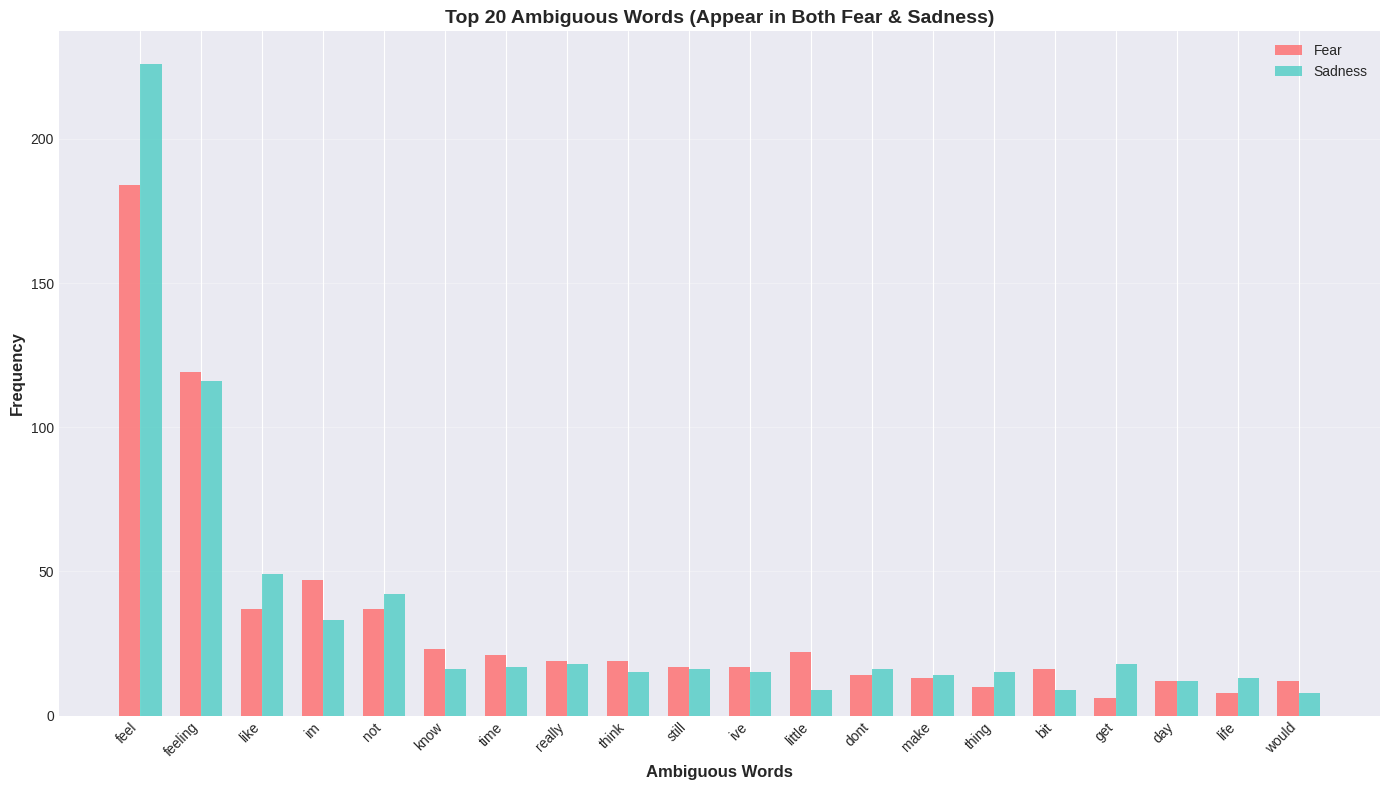

In [123]:
# Visualize ambiguous words
fig, ax = plt.subplots(figsize=(14, 8))

top_ambiguous = ambiguous_freq[:20]
words_amb = [w for w, _, _, _ in top_ambiguous]
fear_freq = [f for _, f, _, _ in top_ambiguous]
sad_freq = [s for _, _, s, _ in top_ambiguous]

x = np.arange(len(top_ambiguous))
width = 0.35

bars1 = ax.bar(x - width/2, fear_freq, width, label='Fear', alpha=0.8, color='#ff6b6b')
bars2 = ax.bar(x + width/2, sad_freq, width, label='Sadness', alpha=0.8, color='#4ecdc4')

ax.set_xlabel('Ambiguous Words', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_title('Top 20 Ambiguous Words (Appear in Both Fear & Sadness)',
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(words_amb, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('ambiguous_words_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [124]:
print("\n KEY INSIGHTS:")
print("""
1. Words like 'feel', 'want', 'know' appear in both emotions
2. These are common words that lack emotional specificity
3. Context is crucial for disambiguation
4. TF-IDF alone cannot distinguish these cases
5. Need sequential models (LSTM, BERT) for better context understanding
""")


 KEY INSIGHTS:

1. Words like 'feel', 'want', 'know' appear in both emotions
2. These are common words that lack emotional specificity
3. Context is crucial for disambiguation
4. TF-IDF alone cannot distinguish these cases
5. Need sequential models (LSTM, BERT) for better context understanding



### IMPROVED TF-IDF WITH BETTER PARAMETERS

In [125]:
print("\n" + "=" * 80)
print("OPTIMIZED TF-IDF FEATURES")
print("=" * 80)

print("\n Testing different TF-IDF configurations...")

tfidf_configs = [
    {'name': 'Baseline', 'params': {'max_features': 5000, 'ngram_range': (1, 2)}},
    {'name': 'More Features', 'params': {'max_features': 10000, 'ngram_range': (1, 2)}},
    {'name': 'Trigrams', 'params': {'max_features': 5000, 'ngram_range': (1, 3)}},
    {'name': 'Char N-grams', 'params': {'max_features': 5000, 'ngram_range': (1, 2),
                                         'analyzer': 'char', 'ngram_range': (3, 5)}},
    {'name': 'Combined', 'params': {'max_features': 10000, 'ngram_range': (1, 3),
                                     'min_df': 3, 'max_df': 0.7}},
]

tfidf_results = []

for config in tfidf_configs:
    print(f"\n  Testing: {config['name']}")

    # Create vectorizer
    if 'analyzer' in config['params']:
        vectorizer = TfidfVectorizer(**config['params'], sublinear_tf=True)
    else:
        vectorizer = TfidfVectorizer(**config['params'], sublinear_tf=True)

    # Transform data
    X_train_new = vectorizer.fit_transform(train_df['cleaned_text'])
    X_test_new = vectorizer.transform(test_df['cleaned_text'])

    # Train Logistic Regression
    lr_new = LogisticRegression(C=2.0, max_iter=1000, random_state=42,
                                 )
    lr_new.fit(X_train_new, y_train)

    # Evaluate
    y_pred_new = lr_new.predict(X_test_new)
    acc = accuracy_score(y_test, y_pred_new)
    f1 = f1_score(y_test, y_pred_new, average='macro')

    tfidf_results.append({
        'Configuration': config['name'],
        'Accuracy': acc,
        'F1-Score': f1,
        'Features': X_train_new.shape[1]
    })

    print(f"    Accuracy: {acc:.4f}, F1-Score: {f1:.4f}, Features: {X_train_new.shape[1]}")

# Display results
tfidf_results_df = pd.DataFrame(tfidf_results)
print("\n TF-IDF CONFIGURATION COMPARISON:")
print("=" * 80)
print(tfidf_results_df.to_string(index=False))


OPTIMIZED TF-IDF FEATURES

 Testing different TF-IDF configurations...

  Testing: Baseline
    Accuracy: 0.9150, F1-Score: 0.9147, Features: 5000

  Testing: More Features
    Accuracy: 0.9140, F1-Score: 0.9136, Features: 10000

  Testing: Trigrams
    Accuracy: 0.9165, F1-Score: 0.9161, Features: 5000

  Testing: Char N-grams
    Accuracy: 0.8180, F1-Score: 0.8171, Features: 5000

  Testing: Combined
    Accuracy: 0.9160, F1-Score: 0.9157, Features: 10000

 TF-IDF CONFIGURATION COMPARISON:
Configuration  Accuracy  F1-Score  Features
     Baseline    0.9150  0.914660      5000
More Features    0.9140  0.913648     10000
     Trigrams    0.9165  0.916148      5000
 Char N-grams    0.8180  0.817057      5000
     Combined    0.9160  0.915655     10000


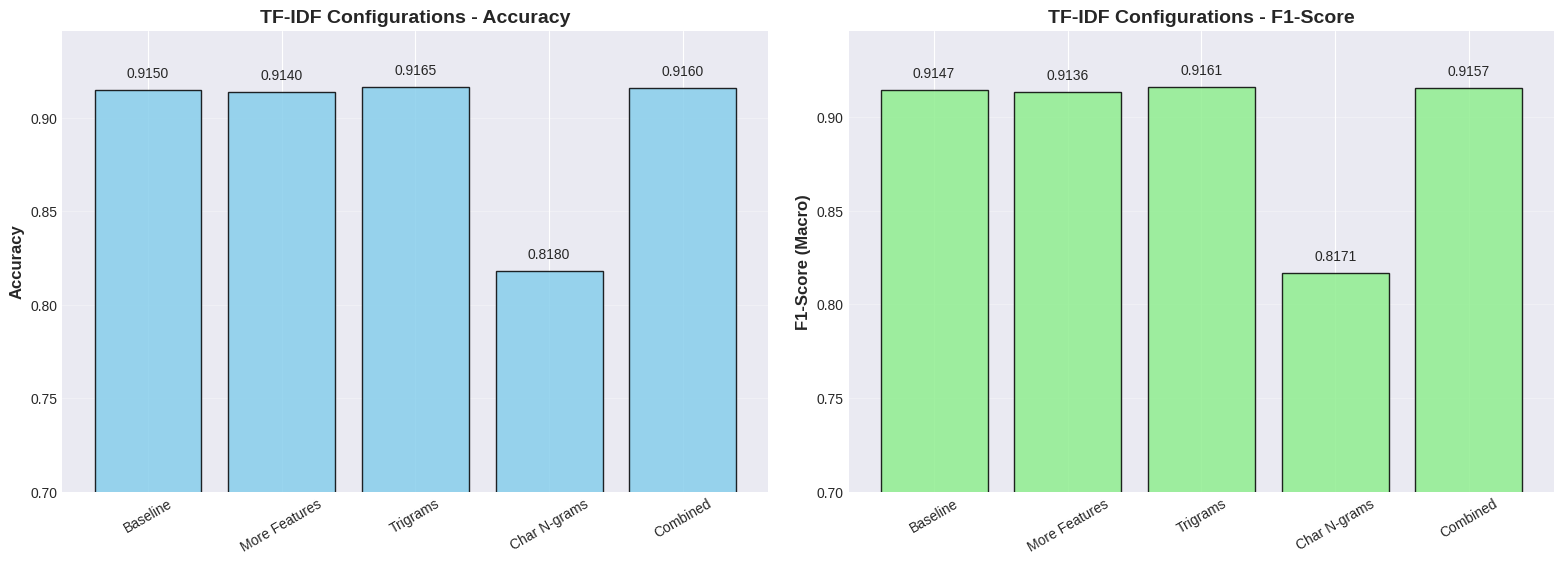

In [126]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy Plot
axes[0].bar(tfidf_results_df['Configuration'], tfidf_results_df['Accuracy'],
            alpha=0.85, edgecolor='black', color='skyblue')

axes[0].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('TF-IDF Configurations - Accuracy', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=30)
axes[0].grid(True, alpha=0.3, axis='y')

# Dynamically set ylim based on max value
acc_max = tfidf_results_df['Accuracy'].max()
axes[0].set_ylim([0.7, acc_max + 0.03])

for i, v in enumerate(tfidf_results_df['Accuracy']):
    axes[0].text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom', fontsize=10)

# F1-Score Plot
axes[1].bar(tfidf_results_df['Configuration'], tfidf_results_df['F1-Score'],
            alpha=0.85, edgecolor='black', color='lightgreen')

axes[1].set_ylabel('F1-Score (Macro)', fontsize=12, fontweight='bold')
axes[1].set_title('TF-IDF Configurations - F1-Score', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=30)
axes[1].grid(True, alpha=0.3, axis='y')

f1_max = tfidf_results_df['F1-Score'].max()
axes[1].set_ylim([0.7, f1_max + 0.03])

for i, v in enumerate(tfidf_results_df['F1-Score']):
    axes[1].text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom', fontsize=10)

# Final layout adjustments
plt.tight_layout(pad=2.0)
plt.savefig('tfidf_configurations_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


### WEIGHTED CLASSES (FOR CONFUSED EMOTIONS)

In [127]:
print("\n" + "=" * 80)
print("CLASS WEIGHTING FOR CONFUSED EMOTIONS")
print("=" * 80)

print("""
 CLASS WEIGHTING STRATEGY:

Problem: Fear and Sadness frequently confused
Solution: Assign higher penalty for misclassifying these classes

This forces the model to pay more attention to distinguishing these emotions.
""")

# Calculate class weights focusing on confused classes
from sklearn.utils.class_weight import compute_class_weight

# Standard balanced weights
classes = np.unique(y_train)
balanced_weights = compute_class_weight('balanced', classes=classes, y=y_train)

# Custom weights (emphasize Fear and Sadness)
custom_weights = balanced_weights.copy()
custom_weights[0] *= 1.5  # Sadness
custom_weights[4] *= 1.5  # Fear

class_weight_dict = {i: w for i, w in enumerate(custom_weights)}

print("\n CLASS WEIGHTS:")
print("-" * 80)
for i, (emotion, weight) in enumerate(zip(emotion_labels.values(), custom_weights)):
    print(f"  {emotion:.<20} {weight:.4f}")

# Train with class weights
lr_weighted = LogisticRegression(C=2.0, max_iter=1000, random_state=42,
                                  class_weight=class_weight_dict)
lr_weighted.fit(X_train_tfidf, y_train)

y_pred_weighted = lr_weighted.predict(X_test_tfidf)
acc_weighted = accuracy_score(y_test, y_pred_weighted)
f1_weighted = f1_score(y_test, y_pred_weighted, average='macro')

print(f"\n RESULTS WITH CLASS WEIGHTING:")
print(f"  Accuracy:  {acc_weighted:.4f} ({acc_weighted*100:.2f}%)")
print(f"  F1-Score:  {f1_weighted:.4f}")


CLASS WEIGHTING FOR CONFUSED EMOTIONS

 CLASS WEIGHTING STRATEGY:

Problem: Fear and Sadness frequently confused
Solution: Assign higher penalty for misclassifying these classes

This forces the model to pay more attention to distinguishing these emotions.


 CLASS WEIGHTS:
--------------------------------------------------------------------------------
  Sadness............. 1.4997
  Joy................. 1.0002
  Love................ 0.9998
  Anger............... 1.0002
  Fear................ 1.4997
  Surprise............ 1.0002

 RESULTS WITH CLASS WEIGHTING:
  Accuracy:  0.9100 (91.00%)
  F1-Score:  0.9097


In [128]:
# Check confusion between Fear and Sadness
cm_weighted = confusion_matrix(y_test, y_pred_weighted)
fear_as_sadness_weighted = cm_weighted[4][0]
sadness_as_fear_weighted = cm_weighted[0][4]

cm_baseline = confusion_matrix(y_test, best_lr_pred)
fear_as_sadness_baseline = cm_baseline[4][0]
sadness_as_fear_baseline = cm_baseline[0][4]

print(f"\n FEAR-SADNESS CONFUSION COMPARISON:")
print("-" * 80)
print(f"  Baseline:")
print(f"    Fear → Sadness: {fear_as_sadness_baseline}")
print(f"    Sadness → Fear: {sadness_as_fear_baseline}")
print(f"  With Class Weighting:")
print(f"    Fear → Sadness: {fear_as_sadness_weighted} ({fear_as_sadness_weighted - fear_as_sadness_baseline:+d})")
print(f"    Sadness → Fear: {sadness_as_fear_weighted} ({sadness_as_fear_weighted - sadness_as_fear_baseline:+d})")


 FEAR-SADNESS CONFUSION COMPARISON:
--------------------------------------------------------------------------------
  Baseline:
    Fear → Sadness: 5
    Sadness → Fear: 9
  With Class Weighting:
    Fear → Sadness: 4 (-1)
    Sadness → Fear: 9 (+0)


### ENSEMBLE WITH DIFFERENT FEATURES

In [129]:
print("\n" + "=" * 80)
print("STRATEGY 4: ENSEMBLE WITH DIVERSE FEATURE SETS")
print("=" * 80)

print("""
 DIVERSE ENSEMBLE STRATEGY:

Instead of ensembling models with same features:
1. Model 1: Word TF-IDF (1,2)-grams
2. Model 2: Character TF-IDF (3,5)-grams
3. Model 3: Negation-handled features

Each captures different linguistic patterns.
""")

# Already trained models with different features
# Model 1: Best LR (word features)
# Model 2: Character n-grams
vectorizer_char = TfidfVectorizer(analyzer='char', ngram_range=(3, 5),
                                   max_features=5000)
X_train_char = vectorizer_char.fit_transform(train_df['cleaned_text'])
X_test_char = vectorizer_char.transform(test_df['cleaned_text'])

lr_char = LogisticRegression(C=1.0, max_iter=1000, random_state=42,
                              )
lr_char.fit(X_train_char, y_train)

# Model 3: Negation features (already trained as lr_neg)

# Get predictions from all three
pred_word = best_lr.predict(X_test_tfidf)
pred_char = lr_char.predict(X_test_char)


# Voting ensemble
from scipy import stats
pred_ensemble_diverse = []

for i in range(len(y_test)):
    votes = [pred_word[i], pred_char[i]]
    # Majority vote
    majority = stats.mode(votes, keepdims=True)[0][0]
    pred_ensemble_diverse.append(majority)

pred_ensemble_diverse = np.array(pred_ensemble_diverse)

acc_diverse = accuracy_score(y_test, pred_ensemble_diverse)
f1_diverse = f1_score(y_test, pred_ensemble_diverse, average='macro')

print(f"\n DIVERSE ENSEMBLE RESULTS:")
print(f"  Accuracy:  {acc_diverse:.4f} ({acc_diverse*100:.2f}%)")
print(f"  F1-Score:  {f1_diverse:.4f}")
print(f"  Improvement over best single model: {(f1_diverse - best_lr_f1)*100:+.2f}%")


STRATEGY 4: ENSEMBLE WITH DIVERSE FEATURE SETS

 DIVERSE ENSEMBLE STRATEGY:

Instead of ensembling models with same features:
1. Model 1: Word TF-IDF (1,2)-grams
2. Model 2: Character TF-IDF (3,5)-grams
3. Model 3: Negation-handled features

Each captures different linguistic patterns.


 DIVERSE ENSEMBLE RESULTS:
  Accuracy:  0.8525 (85.25%)
  F1-Score:  0.8517
  Improvement over best single model: -6.78%


### POST-PROCESSING RULES

In [130]:
print("\n" + "=" * 80)
print("STRATEGY 5: RULE-BASED POST-PROCESSING")
print("=" * 80)

print("""
 POST-PROCESSING RULES:

Add domain knowledge to correct common confusions:

1. If text contains "afraid", "scared", "terrified" → Likely Fear
2. If text contains "miss", "lost", "alone" → Likely Sadness
3. If text contains "angry", "hate", "furious" → Likely Anger

Apply rules only when model confidence is low.
""")

# Define emotion-specific keywords
emotion_keywords = {
    'Sadness': ['sad', 'depressed', 'alone', 'miss', 'lost', 'cry', 'tear',
                'heartbroken', 'empty', 'miserable'],
    'Joy': ['happy', 'excited', 'great', 'wonderful', 'amazing', 'awesome',
            'fantastic', 'perfect', 'best', 'love'],
    'Love': ['love', 'adore', 'sweetheart', 'darling', 'forever', 'together',
             'romance', 'kiss', 'hug', 'heart'],
    'Anger': ['angry', 'mad', 'hate', 'furious', 'annoyed', 'frustrated',
              'pissed', 'rage', 'stupid', 'terrible'],
    'Fear': ['afraid', 'scared', 'terrified', 'worried', 'anxious', 'panic',
             'fear', 'nervous', 'frightened', 'stress'],
    'Surprise': ['wow', 'omg', 'amazing', 'unbelievable', 'shocked', 'surprised',
                 'unexpected', 'cant believe', 'never thought', 'suddenly']
}

def apply_post_processing_rules(text, prediction, confidence, threshold=0.4):
    """Apply rules when model confidence is low"""

    if confidence > threshold:
        return prediction  # High confidence, keep prediction

    # Count keyword matches for each emotion
    text_lower = text.lower()
    scores = {}

    for emotion, keywords in emotion_keywords.items():
        score = sum(1 for keyword in keywords if keyword in text_lower)
        if score > 0:
            scores[emotion] = score

    if not scores:
        return prediction  # No keyword matches, keep original

    # Get emotion with most keyword matches
    best_emotion = max(scores, key=scores.get)

    # Convert emotion name to label
    emotion_to_label = {v: k for k, v in emotion_labels.items()}
    return emotion_to_label.get(best_emotion, prediction)

# Apply post-processing
print("\n Applying post-processing rules...")

# Get probabilities from best model
proba = best_lr.predict_proba(X_test_tfidf)
confidences = proba.max(axis=1)

pred_postprocessed = []
corrections = 0

for i in range(len(y_test)):
    actual_idx = test_df.index[i]
    text = test_df.loc[actual_idx, 'text']
    original_pred = best_lr_pred[i]
    confidence = confidences[i]

    new_pred = apply_post_processing_rules(text, original_pred, confidence)
    pred_postprocessed.append(new_pred)

    if new_pred != original_pred:
        corrections += 1

pred_postprocessed = np.array(pred_postprocessed)

acc_postproc = accuracy_score(y_test, pred_postprocessed)
f1_postproc = f1_score(y_test, pred_postprocessed, average='macro')

print(f"\n POST-PROCESSING RESULTS:")
print(f"  Number of predictions corrected: {corrections}")
print(f"  Accuracy:  {acc_postproc:.4f} ({acc_postproc*100:.2f}%)")
print(f"  F1-Score:  {f1_postproc:.4f}")
print(f"  Improvement: {(f1_postproc - best_lr_f1)*100:+.2f}%")


STRATEGY 5: RULE-BASED POST-PROCESSING

 POST-PROCESSING RULES:

Add domain knowledge to correct common confusions:

1. If text contains "afraid", "scared", "terrified" → Likely Fear
2. If text contains "miss", "lost", "alone" → Likely Sadness
3. If text contains "angry", "hate", "furious" → Likely Anger

Apply rules only when model confidence is low.


 Applying post-processing rules...

 POST-PROCESSING RESULTS:
  Number of predictions corrected: 18
  Accuracy:  0.9125 (91.25%)
  F1-Score:  0.9119
  Improvement: -0.76%


In [131]:
all_models_comparison = [
    # Baseline Models
    {'Model': 'Naive Bayes (Baseline)',
     'Accuracy': mnb_test_acc,
     'F1_Macro': f1_score(y_test, mnb_test_pred, average='macro'),
     'Precision': precision_score(y_test, mnb_test_pred, average='macro'),
     'Recall': recall_score(y_test, mnb_test_pred, average='macro'),
     'Category': 'Baseline'},

    {'Model': 'Logistic Regression (Baseline)',
     'Accuracy': lr_test_acc,
     'F1_Macro': f1_score(y_test, lr_test_pred, average='macro'),
     'Precision': precision_score(y_test, lr_test_pred, average='macro'),
     'Recall': recall_score(y_test, lr_test_pred, average='macro'),
     'Category': 'Baseline'},

    {'Model': 'SVM (Baseline)',
     'Accuracy': svm_test_acc,
     'F1_Macro': f1_score(y_test, svm_test_pred, average='macro'),
     'Precision': precision_score(y_test, svm_test_pred, average='macro'),
     'Recall': recall_score(y_test, svm_test_pred, average='macro'),
     'Category': 'Baseline'},

    {'Model': 'Ensemble (Baseline)',
     'Accuracy': ensemble_test_acc,
     'F1_Macro': f1_score(y_test, ensemble_test_pred, average='macro'),
     'Precision': precision_score(y_test, ensemble_test_pred, average='macro'),
     'Recall': recall_score(y_test, ensemble_test_pred, average='macro'),
     'Category': 'Baseline'},

    # Tuned Models
    {'Model': 'Naive Bayes (Tuned)',
     'Accuracy': best_mnb_acc,
     'F1_Macro': best_mnb_f1,
     'Precision': precision_score(y_test, best_mnb_pred, average='macro'),
     'Recall': recall_score(y_test, best_mnb_pred, average='macro'),
     'Category': 'Hyperparameter Tuned'},

    {'Model': 'Logistic Regression (Tuned)',
     'Accuracy': best_lr_acc,
     'F1_Macro': best_lr_f1,
     'Precision': precision_score(y_test, best_lr_pred, average='macro'),
     'Recall': recall_score(y_test, best_lr_pred, average='macro'),
     'Category': 'Hyperparameter Tuned'},

    {'Model': 'SVM (Tuned)',
     'Accuracy': best_svm_acc,
     'F1_Macro': best_svm_f1,
     'Precision': precision_score(y_test, best_svm_pred, average='macro'),
     'Recall': recall_score(y_test, best_svm_pred, average='macro'),
     'Category': 'Hyperparameter Tuned'},


    {'Model': 'LR + Class Weighting',
     'Accuracy': acc_weighted,
     'F1_Macro': f1_weighted,
     'Precision': precision_score(y_test, y_pred_weighted, average='macro'),
     'Recall': recall_score(y_test, y_pred_weighted, average='macro'),
     'Category': 'Advanced Features'},

    {'Model': 'Diverse Ensemble',
     'Accuracy': acc_diverse,
     'F1_Macro': f1_diverse,
     'Precision': precision_score(y_test, pred_ensemble_diverse, average='macro'),
     'Recall': recall_score(y_test, pred_ensemble_diverse, average='macro'),
     'Category': 'Advanced Ensemble'},

    {'Model': 'LR + Post-Processing',
     'Accuracy': acc_postproc,
     'F1_Macro': f1_postproc,
     'Precision': precision_score(y_test, pred_postprocessed, average='macro'),
     'Recall': recall_score(y_test, pred_postprocessed, average='macro'),
     'Category': 'Advanced Features'},

]

In [132]:
comparison_df = pd.DataFrame(all_models_comparison)
comparison_df = comparison_df.sort_values('F1_Macro', ascending=False)

print("\n MODEL COMPARISON:")
print(comparison_df.to_string(index=False))


 MODEL COMPARISON:
                         Model  Accuracy  F1_Macro  Precision   Recall             Category
   Logistic Regression (Tuned)    0.9200  0.919459   0.920761 0.920058 Hyperparameter Tuned
                   SVM (Tuned)    0.9190  0.918472   0.919813 0.919055 Hyperparameter Tuned
           Ensemble (Baseline)    0.9170  0.916483   0.917725 0.917061             Baseline
Logistic Regression (Baseline)    0.9160  0.915494   0.916605 0.916058             Baseline
                SVM (Baseline)    0.9130  0.912618   0.913447 0.913051             Baseline
          LR + Post-Processing    0.9125  0.911865   0.913068 0.912559    Advanced Features
          LR + Class Weighting    0.9100  0.909748   0.911029 0.910045    Advanced Features
           Naive Bayes (Tuned)    0.8905  0.889698   0.893222 0.890567 Hyperparameter Tuned
        Naive Bayes (Baseline)    0.8835  0.882856   0.886169 0.883566             Baseline
              Diverse Ensemble    0.8525  0.851700   0.85836

In [133]:
!pip install transformers torch accelerate datasets tqdm


In [134]:
!pip install transformers torch scikit-learn --quiet

In [135]:
# Deep Learning
!pip install tf-keras
from transformers import (
    DistilBertTokenizer, DistilBertForSequenceClassification,
    Trainer, TrainingArguments
)
import torch
from torch.utils.data import Dataset

### Prepare Data for DistilBERT

In [136]:
print("\n" + "=" * 80)
print("DEEP LEARNING MODEL - DISTILBERT")
print("=" * 80)

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\n Using device: {device}")

if torch.cuda.is_available():
    print(f"   GPU: {torch.cuda.get_device_name(0)}")
    print(f"   Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
else:
    print("    CPU used.")

# Initialize tokenizer
print("\n Loading DistilBERT tokenizer...")
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
print(" Tokenizer loaded")


DEEP LEARNING MODEL - DISTILBERT

 Using device: cuda
   GPU: Tesla T4
   Memory: 15.83 GB

 Loading DistilBERT tokenizer...


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

 Tokenizer loaded


In [137]:
# Tokenize the datasets (using original text, not preprocessed)
# DistilBERT handles its own preprocessing
def tokenize_data(texts, max_length=128):
    """Tokenize texts using DistilBERT tokenizer"""
    return tokenizer(
        texts.tolist(),
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )

print("\n Tokenizing datasets...")
print("   This may take a few minutes...")

# Use original text (not preprocessed) for BERT
train_encodings = tokenize_data(train_df['text'])
val_encodings = tokenize_data(val_df['text'])
test_encodings = tokenize_data(test_df['text'])

print(" Tokenization completed")


 Tokenizing datasets...
   This may take a few minutes...
 Tokenization completed


### CREATE PYTORCH DATASET

In [138]:
class EmotionDataset(Dataset):
    """Custom Dataset for Emotion Classification"""

    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = EmotionDataset(train_encodings, y_train)
val_dataset = EmotionDataset(val_encodings, y_val)
test_dataset = EmotionDataset(test_encodings, y_test)

print(f"\n DATASET SIZES:")
print(f"   Training: {len(train_dataset)} samples")
print(f"   Validation: {len(val_dataset)} samples")
print(f"   Test: {len(test_dataset)} samples")


 DATASET SIZES:
   Training: 15999 samples
   Validation: 2000 samples
   Test: 2000 samples


### LOAD AND FINE-TUNE DISTILBERT MODEL

In [139]:
print("\n" + "=" * 80)
print("FINE-TUNING DISTILBERT MODEL")
print("=" * 80)

print("\n Loading pre-trained DistilBERT model...")
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=6  # 6 emotion classes
)
model.to(device)
print(" Model loaded and moved to device")

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to="none"  # Disable wandb
)

# Define compute metrics function
def compute_metrics(eval_pred):
    """Compute metrics for evaluation"""
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='macro')
    recall = recall_score(labels, predictions, average='macro')
    f1 = f1_score(labels, predictions, average='macro')

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

print("\n Starting training...")
print("   Progress will be shown below...")
print("-" * 80)

# Train the model
train_result = trainer.train()

print("\n Training completed!")
print(f"\n TRAINING METRICS:")
print(f"   Training Loss: {train_result.training_loss:.4f}")
print(f"   Training Time: {train_result.metrics['train_runtime']:.2f} seconds")


FINE-TUNING DISTILBERT MODEL

 Loading pre-trained DistilBERT model...


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


 Model loaded and moved to device

 Starting training...
   Progress will be shown below...
--------------------------------------------------------------------------------



 Training completed!

 TRAINING METRICS:
   Training Loss: 0.2917
   Training Time: 581.11 seconds


EVALUATE DISTILBERT MODEL


In [140]:
print("\n" + "=" * 80)
print("EVALUATING DISTILBERT MODEL")
print("=" * 80)

# Evaluate on validation set
print("\n Evaluating on validation set...")
val_results = trainer.evaluate()

print(f"\n VALIDATION METRICS:")
print(f"   Accuracy:  {val_results['eval_accuracy']:.4f} ({val_results['eval_accuracy']*100:.2f}%)")
print(f"   Precision: {val_results['eval_precision']:.4f}")
print(f"   Recall:    {val_results['eval_recall']:.4f}")
print(f"   F1-Score:  {val_results['eval_f1']:.4f}")

# Evaluate on test set
print("\n Evaluating on test set...")
test_results = trainer.evaluate(test_dataset)

print(f"\n TEST METRICS:")
print(f"   Accuracy:  {test_results['eval_accuracy']:.4f} ({test_results['eval_accuracy']*100:.2f}%)")
print(f"   Precision: {test_results['eval_precision']:.4f}")
print(f"   Recall:    {test_results['eval_recall']:.4f}")
print(f"   F1-Score:  {test_results['eval_f1']:.4f}")

# Get predictions
print("\n Generating predictions...")
test_predictions = trainer.predict(test_dataset)
bert_test_pred = np.argmax(test_predictions.predictions, axis=1)

# Save test accuracy for comparison
bert_test_acc = test_results['eval_accuracy']



EVALUATING DISTILBERT MODEL

 Evaluating on validation set...



 VALIDATION METRICS:
   Accuracy:  0.9455 (94.55%)
   Precision: 0.9470
   Recall:    0.9455
   F1-Score:  0.9452

 Evaluating on test set...

 TEST METRICS:
   Accuracy:  0.9430 (94.30%)
   Precision: 0.9442
   Recall:    0.9430
   F1-Score:  0.9429

 Generating predictions...


DISTILBERT CLASSIFICATION REPORT

In [141]:
print("\n" + "=" * 80)
print("DISTILBERT - DETAILED CLASSIFICATION REPORT")
print("=" * 80)

print(f"\nCLASSIFICATION REPORT (Test Set):")
print("-" * 80)
bert_report = classification_report(y_test, bert_test_pred,
                                     target_names=list(emotion_labels.values()),
                                     digits=4)
print(bert_report)


DISTILBERT - DETAILED CLASSIFICATION REPORT

CLASSIFICATION REPORT (Test Set):
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

     Sadness     0.9632    0.9429    0.9530       333
         Joy     0.9807    0.9132    0.9457       334
        Love     0.9320    0.9880    0.9592       333
       Anger     0.9626    0.9279    0.9450       333
        Fear     0.9200    0.8952    0.9074       334
    Surprise     0.9066    0.9910    0.9469       333

    accuracy                         0.9430      2000
   macro avg     0.9442    0.9430    0.9429      2000
weighted avg     0.9442    0.9430    0.9428      2000



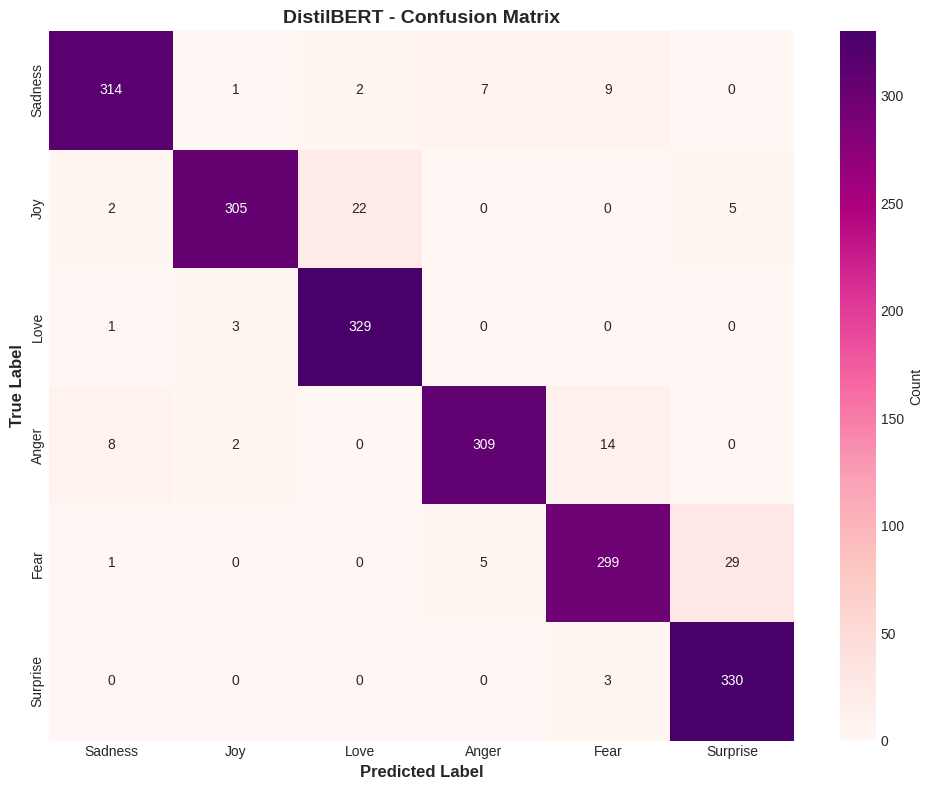

In [142]:
# Confusion Matrix
bert_cm = confusion_matrix(y_test, bert_test_pred)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(bert_cm, annot=True, fmt='d', cmap='RdPu',
            xticklabels=list(emotion_labels.values()),
            yticklabels=list(emotion_labels.values()),
            cbar_kws={'label': 'Count'})
ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax.set_title('DistilBERT - Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('distilbert_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

COMPARE TRADITIONAL ML WITH DEEP LEARNING

In [143]:
print("\n" + "=" * 80)
print("COMPARISON: TRADITIONAL ML vs DEEP LEARNING")
print("=" * 80)

# Create comprehensive comparison
final_comparison = {
    'Model': ['Naive Bayes', 'Logistic Regression', 'SVM', 'Ensemble', 'DistilBERT'],
    'Test Accuracy': [
        mnb_test_acc,
        lr_test_acc,
        svm_test_acc,
        ensemble_test_acc,
        bert_test_acc
    ],
    'Macro F1-Score': [
        f1_score(y_test, mnb_test_pred, average='macro'),
        f1_score(y_test, lr_test_pred, average='macro'),
        f1_score(y_test, svm_test_pred, average='macro'),
        f1_score(y_test, ensemble_test_pred, average='macro'),
        f1_score(y_test, bert_test_pred, average='macro')
    ],
    'Macro Precision': [
        precision_score(y_test, mnb_test_pred, average='macro'),
        precision_score(y_test, lr_test_pred, average='macro'),
        precision_score(y_test, svm_test_pred, average='macro'),
        precision_score(y_test, ensemble_test_pred, average='macro'),
        precision_score(y_test, bert_test_pred, average='macro')
    ],
    'Macro Recall': [
        recall_score(y_test, mnb_test_pred, average='macro'),
        recall_score(y_test, lr_test_pred, average='macro'),
        recall_score(y_test, svm_test_pred, average='macro'),
        recall_score(y_test, ensemble_test_pred, average='macro'),
        recall_score(y_test, bert_test_pred, average='macro')
    ],
    'Type': ['Traditional', 'Traditional', 'Traditional', 'Ensemble', 'Deep Learning']
}

final_comparison_df = pd.DataFrame(final_comparison)

print("\n FINAL MODEL COMPARISON:")
print("-" * 80)
print(final_comparison_df.to_string(index=False))


COMPARISON: TRADITIONAL ML vs DEEP LEARNING

 FINAL MODEL COMPARISON:
--------------------------------------------------------------------------------
              Model  Test Accuracy  Macro F1-Score  Macro Precision  Macro Recall          Type
        Naive Bayes         0.8835        0.882856         0.886169      0.883566   Traditional
Logistic Regression         0.9160        0.915494         0.916605      0.916058   Traditional
                SVM         0.9130        0.912618         0.913447      0.913051   Traditional
           Ensemble         0.9170        0.916483         0.917725      0.917061      Ensemble
         DistilBERT         0.9430        0.942864         0.944187      0.943039 Deep Learning


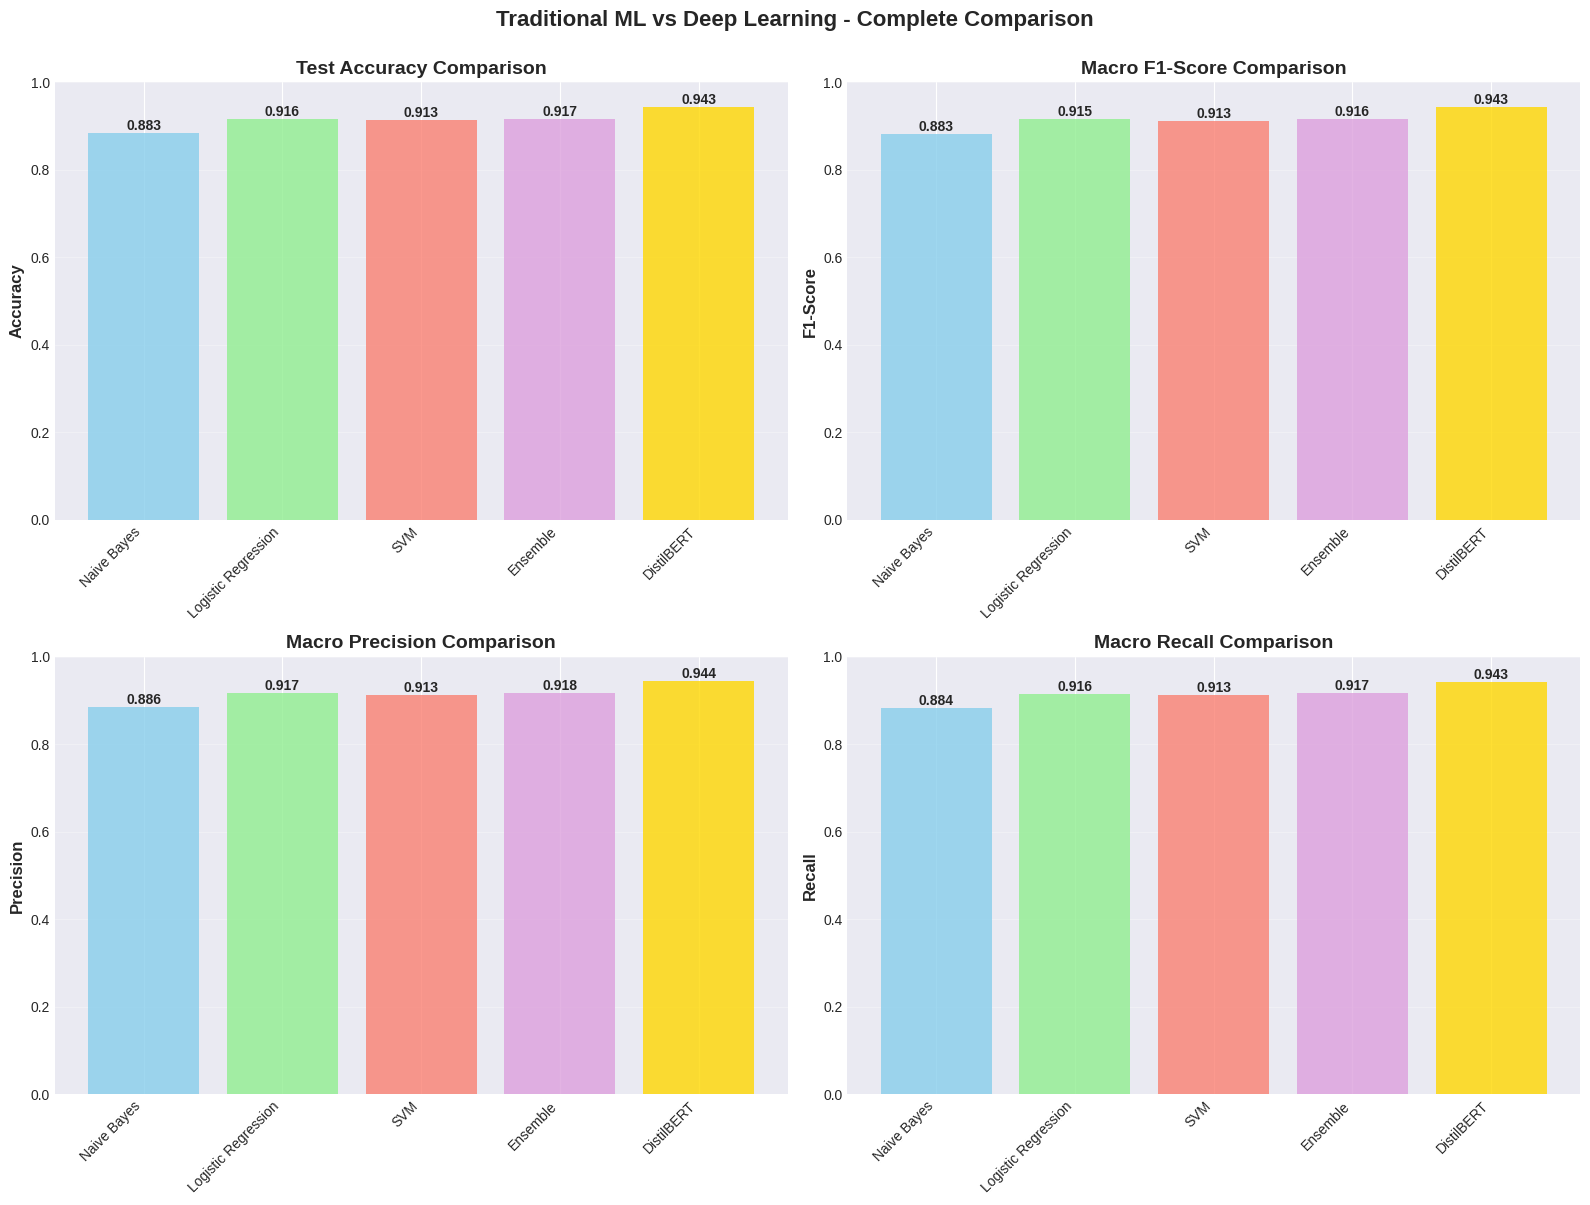

In [144]:
# Visualization: Final Comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Test Accuracy
ax1 = axes[0, 0]
colors = ['skyblue', 'lightgreen', 'salmon', 'plum', 'gold']
bars = ax1.bar(final_comparison_df['Model'],
               final_comparison_df['Test Accuracy'],
               color=colors, alpha=0.8)
ax1.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('Test Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_ylim([0, 1.0])
ax1.grid(True, alpha=0.3, axis='y')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 2: F1-Score
ax2 = axes[0, 1]
bars = ax2.bar(final_comparison_df['Model'],
               final_comparison_df['Macro F1-Score'],
               color=colors, alpha=0.8)
ax2.set_ylabel('F1-Score', fontsize=12, fontweight='bold')
ax2.set_title('Macro F1-Score Comparison', fontsize=14, fontweight='bold')
ax2.set_ylim([0, 1.0])
ax2.grid(True, alpha=0.3, axis='y')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 3: Precision
ax3 = axes[1, 0]
bars = ax3.bar(final_comparison_df['Model'],
               final_comparison_df['Macro Precision'],
               color=colors, alpha=0.8)
ax3.set_ylabel('Precision', fontsize=12, fontweight='bold')
ax3.set_title('Macro Precision Comparison', fontsize=14, fontweight='bold')
ax3.set_ylim([0, 1.0])
ax3.grid(True, alpha=0.3, axis='y')
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 4: Recall
ax4 = axes[1, 1]
bars = ax4.bar(final_comparison_df['Model'],
               final_comparison_df['Macro Recall'],
               color=colors, alpha=0.8)
ax4.set_ylabel('Recall', fontsize=12, fontweight='bold')
ax4.set_title('Macro Recall Comparison', fontsize=14, fontweight='bold')
ax4.set_ylim([0, 1.0])
ax4.grid(True, alpha=0.3, axis='y')
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.suptitle('Traditional ML vs Deep Learning - Complete Comparison',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('final_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

PER-CLASS PERFORMANCE ANALYSIS

In [145]:
# Get per-class metrics for all models
models_predictions = {
    'Naive Bayes': mnb_test_pred,
    'Logistic Regression': lr_test_pred,
    'SVM': svm_test_pred,
    'Ensemble': ensemble_test_pred,
    'DistilBERT': bert_test_pred
}

# Create detailed per-class comparison
emotion_names = list(emotion_labels.values())
per_class_metrics = []

for emotion_idx, emotion_name in enumerate(emotion_names):
    for model_name, predictions in models_predictions.items():
        prec, rec, f1, _ = precision_recall_fscore_support(
            y_test, predictions, average=None, zero_division=0
        )

        per_class_metrics.append({
            'Emotion': emotion_name,
            'Model': model_name,
            'Precision': prec[emotion_idx],
            'Recall': rec[emotion_idx],
            'F1-Score': f1[emotion_idx]
        })

per_class_df = pd.DataFrame(per_class_metrics)

# Display results
print("\n PER-CLASS PERFORMANCE METRICS:")
print("-" * 80)

for emotion in emotion_names:
    print(f"\n{emotion}:")
    emotion_data = per_class_df[per_class_df['Emotion'] == emotion]
    print(emotion_data[['Model', 'Precision', 'Recall', 'F1-Score']].to_string(index=False))


 PER-CLASS PERFORMANCE METRICS:
--------------------------------------------------------------------------------

Sadness:
              Model  Precision   Recall  F1-Score
        Naive Bayes   0.935897 0.876877  0.905426
Logistic Regression   0.936170 0.924925  0.930514
                SVM   0.939024 0.924925  0.931921
           Ensemble   0.948012 0.930931  0.939394
         DistilBERT   0.963190 0.942943  0.952959

Joy:
              Model  Precision   Recall  F1-Score
        Naive Bayes   0.909722 0.784431  0.842444
Logistic Regression   0.931373 0.853293  0.890625
                SVM   0.922330 0.853293  0.886470
           Ensemble   0.931148 0.850299  0.888889
         DistilBERT   0.980707 0.913174  0.945736

Love:
              Model  Precision   Recall  F1-Score
        Naive Bayes   0.871935 0.960961  0.914286
Logistic Regression   0.913408 0.981982  0.946454
                SVM   0.917379 0.966967  0.941520
           Ensemble   0.913408 0.981982  0.946454
         Dist

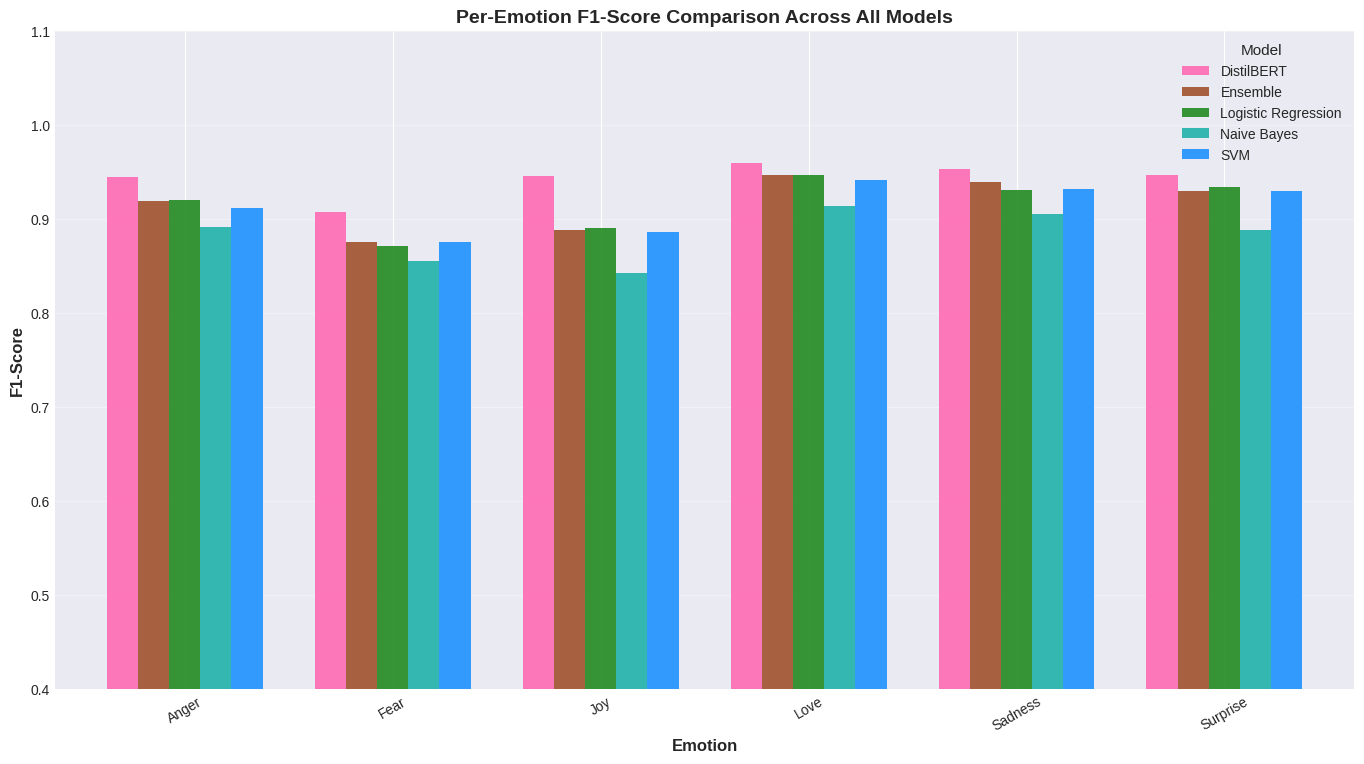

In [146]:
# Pivot the DataFrame
pivot_df = per_class_df.pivot(index='Emotion', columns='Model', values='F1-Score')

# Set consistent color palette for models
model_colors = {
    'DistilBERT': '#FF69B4',   # pink
    'Ensemble': '#A0522D',     # brown
    'Logistic Regression': '#228B22',  # green
    'Naive Bayes': '#20B2AA',  # teal
    'SVM': '#1E90FF'           # blue
}

# Reorder columns if needed
pivot_df = pivot_df[sorted(model_colors.keys())]

# Plot
fig, ax = plt.subplots(figsize=(14, 8))
pivot_df.plot(kind='bar', ax=ax, width=0.75, alpha=0.9, color=[model_colors[col] for col in pivot_df.columns])

# Axis labels and title
ax.set_xlabel('Emotion', fontsize=12, fontweight='bold')
ax.set_ylabel('F1-Score', fontsize=12, fontweight='bold')
ax.set_title('Per-Emotion F1-Score Comparison Across All Models', fontsize=14, fontweight='bold')

# Legend
ax.legend(title='Model', fontsize=10, title_fontsize=11, loc='upper right')

# Grid and limits
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0.4, 1.10])

# X-tick formatting
plt.xticks(rotation=30, ha='center')

# Layout and save
plt.tight_layout(pad=2.0)
plt.savefig('per_emotion_f1_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


ERROR ANALYSIS - MISCLASSIFICATION PATTERNS

In [147]:
print("\n" + "=" * 80)
print("ERROR ANALYSIS - MISCLASSIFICATION PATTERNS")
print("=" * 80)

# Use DistilBERT for error analysis
misclassified_indices = np.where(y_test != bert_test_pred)[0]
print(f"\n Total misclassifications: {len(misclassified_indices)} out of {len(y_test)}")
print(f"   Error rate: {len(misclassified_indices)/len(y_test)*100:.2f}%")

# Analyze confusion patterns
from collections import defaultdict

confusion_pairs = defaultdict(int)
for idx in misclassified_indices:
    true_label = emotion_labels[y_test[idx]]
    pred_label = emotion_labels[bert_test_pred[idx]]
    confusion_pairs[(true_label, pred_label)] += 1

# Get top confusion pairs
top_confusions = sorted(confusion_pairs.items(), key=lambda x: x[1], reverse=True)[:10]

print("\n TOP 10 CONFUSION PATTERNS:")
print("-" * 80)
for (true_emotion, pred_emotion), count in top_confusions:
    print(f"   {true_emotion:.<20} → {pred_emotion:.<20} {count:>3} times")

# Sample misclassified examples
print("\n SAMPLE MISCLASSIFIED EXAMPLES:")
print("-" * 80)

sample_errors = np.random.choice(misclassified_indices,
                                  min(5, len(misclassified_indices)),
                                  replace=False)

for i, idx in enumerate(sample_errors, 1):
    actual_idx = test_df.index[idx]
    text = test_df.loc[actual_idx, 'text']
    true_emotion = emotion_labels[y_test[idx]]
    pred_emotion = emotion_labels[bert_test_pred[idx]]

    print(f"\nExample {i}:")
    print(f"   Text: {text}")
    print(f"   True: {true_emotion:.<15} Predicted: {pred_emotion}")


ERROR ANALYSIS - MISCLASSIFICATION PATTERNS

 Total misclassifications: 114 out of 2000
   Error rate: 5.70%

 TOP 10 CONFUSION PATTERNS:
--------------------------------------------------------------------------------
   Fear................ → Surprise............  29 times
   Joy................. → Love................  22 times
   Anger............... → Fear................  14 times
   Sadness............. → Fear................   9 times
   Anger............... → Sadness.............   8 times
   Sadness............. → Anger...............   7 times
   Fear................ → Anger...............   5 times
   Joy................. → Surprise............   5 times
   Love................ → Joy.................   3 times
   Surprise............ → Fear................   3 times

 SAMPLE MISCLASSIFIED EXAMPLES:
--------------------------------------------------------------------------------

Example 1:
   Text: i remembered that feeling and hated it
   True: Sadness........ Predicted: 

PRACTICAL DEMONSTRATION - EMOTION PREDICTOR

In [148]:
custom_texts = [
    "I am absolutely thrilled and ecstatic about my promotion! This is the best day of my life!",
    "I feel so devastated and heartbroken. I can't stop crying since she left me.",
    "You are the love of my life. I cherish every moment we spend together.",
    "I am furious! How dare you disrespect me like that! This is completely unacceptable!",
    "I'm terrified about the surgery tomorrow. What if something goes wrong?",
    "Oh my God! I can't believe I just won the lottery! This is unbelievable!",
    "I'm feeling a bit down today, nothing seems to go right.",
    "I'm really worried about the exam results. I hope I passed.",
    "I absolutely adore spending time with you. You make me so happy!",
    "This situation makes me so anxious and nervous. I don't know what to do."
]
print("\n PREDICTING EMOTIONS FOR CUSTOM TEXTS:")

custom_predictions = []

for i, text in enumerate(custom_texts, 1):
    # Tokenize and predict
    with torch.no_grad():
        inputs = tokenizer(text, return_tensors='pt', padding='max_length',
                          truncation=True, max_length=128)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        outputs = trainer.model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=1)[0].cpu().numpy()
        prediction = torch.argmax(torch.tensor(probs)).item()

    predicted_emotion = emotion_labels[prediction]
    confidence = probs[prediction]

    # Get top 3 predictions
    top_3_idx = np.argsort(probs)[-3:][::-1]

    print(f"\n{'='*80}")
    print(f"CUSTOM PREDICTION {i}:")
    print(f"{'='*80}")
    print(f"Text: {text}")
    print(f"\n Predicted Emotion: {predicted_emotion}")
    print(f"   Confidence: {confidence:.2%}")

    print(f"\n Top 3 Predictions:")
    print("-" * 80)
    for rank, idx in enumerate(top_3_idx, 1):
        emotion = emotion_labels[idx]
        prob = probs[idx]
        print(f"  {rank}. {emotion:.<15} ({prob*100:>6.2f}%) ")

    print(f"\n All Emotion Probabilities:")
    print("-" * 80)
    for label, prob in enumerate(probs):
        emotion = emotion_labels[label]
        print(f"  {emotion:.<15} ({prob*100:>6.2f}%) ")

    custom_predictions.append({
        'Text': text[:50] + '...' if len(text) > 50 else text,
        'Predicted': predicted_emotion,
        'Confidence': f'{confidence:.2%}',
        '2nd Choice': emotion_labels[top_3_idx[1]],
        '3rd Choice': emotion_labels[top_3_idx[2]]
    })

# Summary table
custom_df = pd.DataFrame(custom_predictions)

print("\n" + "=" * 80)
print("PREDICTIONS SUMMARY:")
print("=" * 80)
print(custom_df.to_string(index=False))


 PREDICTING EMOTIONS FOR CUSTOM TEXTS:

CUSTOM PREDICTION 1:
Text: I am absolutely thrilled and ecstatic about my promotion! This is the best day of my life!

 Predicted Emotion: Joy
   Confidence: 99.96%

 Top 3 Predictions:
--------------------------------------------------------------------------------
  1. Joy............ ( 99.96%) 
  2. Sadness........ (  0.01%) 
  3. Surprise....... (  0.01%) 

 All Emotion Probabilities:
--------------------------------------------------------------------------------
  Sadness........ (  0.01%) 
  Joy............ ( 99.96%) 
  Love........... (  0.01%) 
  Anger.......... (  0.01%) 
  Fear........... (  0.01%) 
  Surprise....... (  0.01%) 

CUSTOM PREDICTION 2:
Text: I feel so devastated and heartbroken. I can't stop crying since she left me.

 Predicted Emotion: Sadness
   Confidence: 99.95%

 Top 3 Predictions:
--------------------------------------------------------------------------------
  1. Sadness........ ( 99.95%) 
  2. Fear........... (

  Creating word cloud for Sadness...
  Creating word cloud for Joy...
  Creating word cloud for Love...
  Creating word cloud for Anger...
  Creating word cloud for Fear...
  Creating word cloud for Surprise...


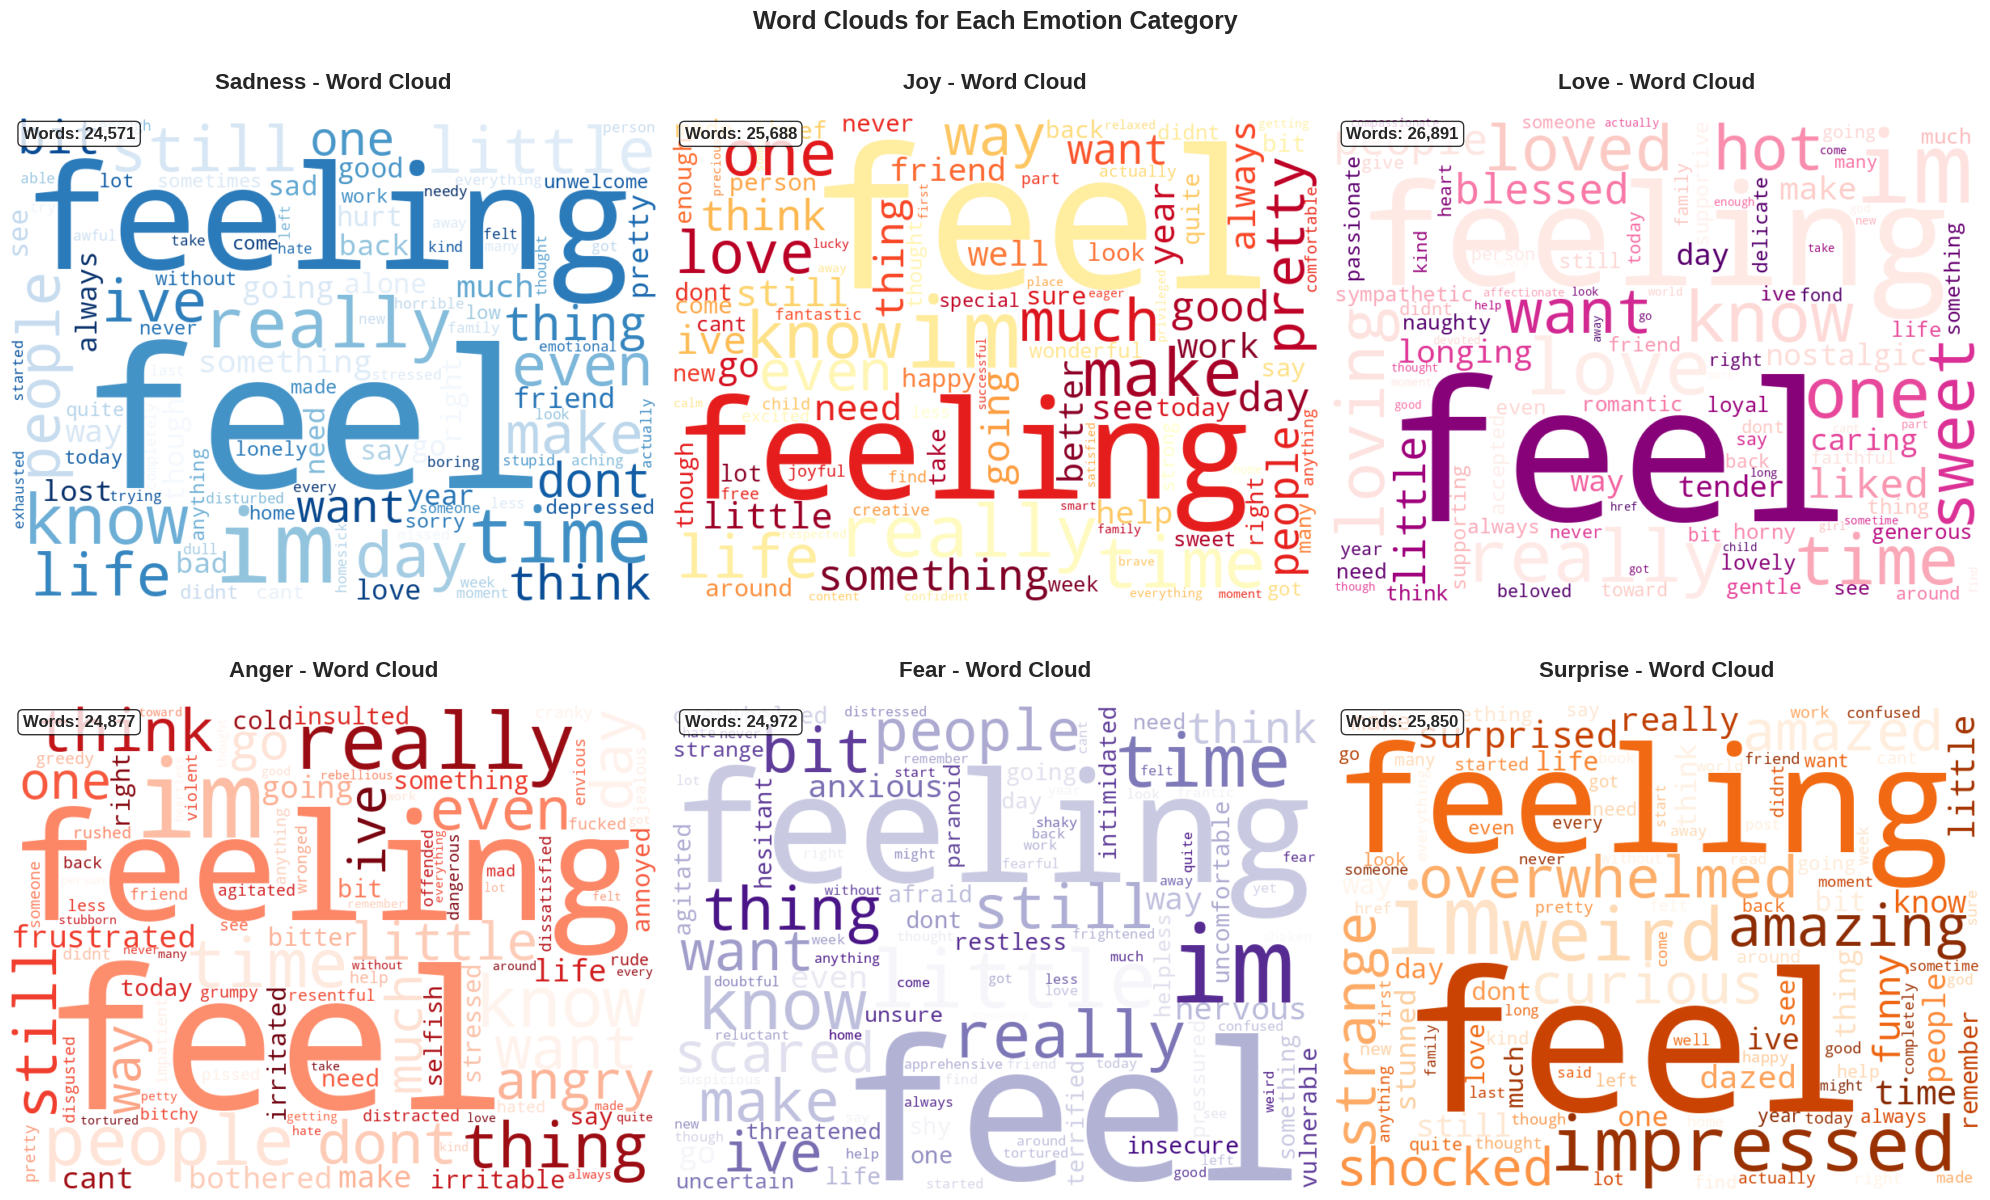

In [149]:
from wordcloud import WordCloud
# Collect text for each emotion
emotion_texts = {}

for emotion_label, emotion_name in emotion_labels.items():
    # Get all texts for this emotion
    emotion_data = train_df[train_df['label'] == emotion_label]['cleaned_text']
    combined_text = ' '.join(emotion_data.tolist())
    emotion_texts[emotion_name] = combined_text

# Create word clouds
fig, axes = plt.subplots(2, 3, figsize=(20, 13))
axes = axes.ravel()

# Color schemes for each emotion
color_schemes = {
    'Sadness': 'Blues',
    'Joy': 'YlOrRd',
    'Love': 'RdPu',
    'Anger': 'Reds',
    'Fear': 'Purples',
    'Surprise': 'Oranges'
}

for idx, (emotion_name, text) in enumerate(emotion_texts.items()):
    print(f"  Creating word cloud for {emotion_name}...")

    # Create word cloud
    wordcloud = WordCloud(
        width=800,
        height=600,
        background_color='white',
        colormap=color_schemes[emotion_name],
        max_words=100,
        relative_scaling=0.5,
        min_font_size=10,
        collocations=False
    ).generate(text)

    # Plot
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].axis('off')
    axes[idx].set_title(f'{emotion_name} - Word Cloud',
                        fontsize=16, fontweight='bold', pad=20)

    # Add word count
    word_count = len(text.split())
    axes[idx].text(0.02, 0.98, f'Words: {word_count:,}',
                   transform=axes[idx].transAxes,
                   fontsize=12, fontweight='bold',
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Word Clouds for Each Emotion Category',
             fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('emotion_wordclouds.png', dpi=300, bbox_inches='tight')
plt.show()


 UNIQUE/DISTINCTIVE WORDS FOR EACH EMOTION:

Sadness:
--------------------------------------------------------------------------------
Word                 Frequency       Uniqueness Ratio    
--------------------------------------------------------------------------------
unwelcome            45              45.00x
homesick             38              38.00x
dull                 37              37.00x
needy                42              10.50x
aching               39              9.75x
boring               36              9.00x
disturbed            42              5.25x
missed               39              3.90x
lonely               49              3.27x
awful                42              3.23x

Joy:
--------------------------------------------------------------------------------
Word                 Frequency       Uniqueness Ratio    
--------------------------------------------------------------------------------
brave                36              12.00x
joyful               

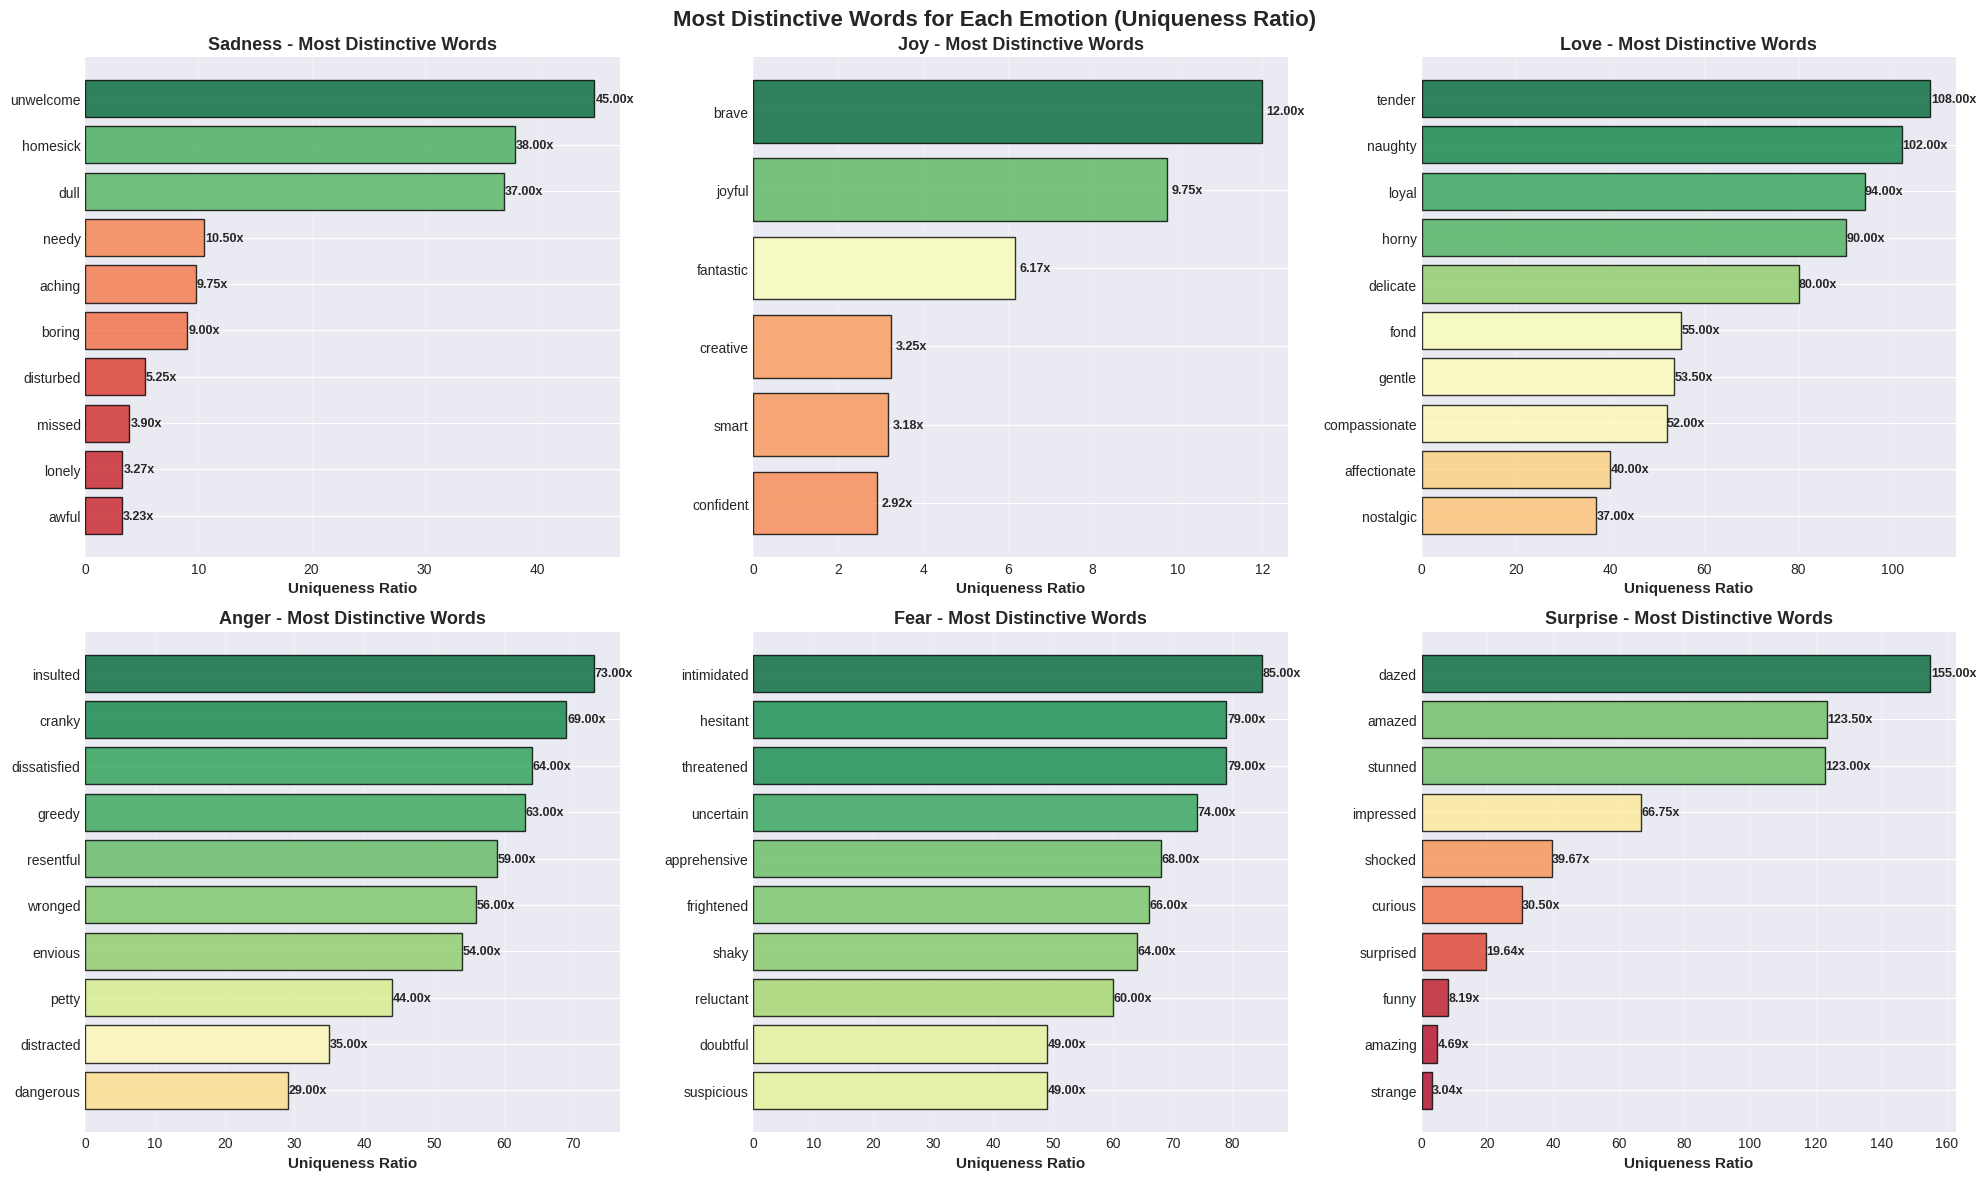

In [150]:
unique_words = {}

for emotion_name in emotion_labels.values():
    # Get word frequencies for this emotion
    emotion_words = Counter(emotion_texts[emotion_name].split())

    # Get word frequencies for all other emotions combined
    other_text = ' '.join([text for name, text in emotion_texts.items()
                           if name != emotion_name])
    other_words = Counter(other_text.split())

    # Find words that are unique to this emotion (ratio > 3)
    unique = []
    for word, count in emotion_words.most_common(100):
        if count > 10:  # Must appear at least 10 times
            other_count = other_words.get(word, 1)
            ratio = count / other_count
            if ratio > 2.0:  # Appears at least 2x more in this emotion
                unique.append((word, count, ratio))

    unique_words[emotion_name] = sorted(unique, key=lambda x: x[2], reverse=True)[:15]

# Display unique words
print("\n UNIQUE/DISTINCTIVE WORDS FOR EACH EMOTION:")
print("=" * 80)

for emotion_name, words in unique_words.items():
    print(f"\n{emotion_name}:")
    print("-" * 80)
    print(f"{'Word':<20} {'Frequency':<15} {'Uniqueness Ratio':<20}")
    print("-" * 80)
    for word, freq, ratio in words:
        print(f"{word:<20} {freq:<15} {ratio:.2f}x")

# Visualize unique words
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, (emotion_name, words) in enumerate(unique_words.items()):
    if words:
        word_list, freq_list, ratio_list = zip(*words[:10])

        # Color by ratio
        colors_unique = plt.cm.RdYlGn(np.array(ratio_list) / max(ratio_list))

        axes[idx].barh(range(len(word_list)), ratio_list, color=colors_unique,
                      alpha=0.8, edgecolor='black')
        axes[idx].set_yticks(range(len(word_list)))
        axes[idx].set_yticklabels(word_list)
        axes[idx].set_xlabel('Uniqueness Ratio', fontsize=11, fontweight='bold')
        axes[idx].set_title(f'{emotion_name} - Most Distinctive Words',
                           fontsize=13, fontweight='bold')
        axes[idx].invert_yaxis()
        axes[idx].grid(True, alpha=0.3, axis='x')

        # Add value labels
        for i, (word, ratio) in enumerate(zip(word_list, ratio_list)):
            axes[idx].text(ratio + 0.1, i, f'{ratio:.2f}x',
                          va='center', fontweight='bold', fontsize=9)

plt.suptitle('Most Distinctive Words for Each Emotion (Uniqueness Ratio)',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('unique_words_by_emotion.png', dpi=300, bbox_inches='tight')
plt.show()

COMPREHENSIVE COMPARISION OF MODEL

In [151]:
# Get predictions for all models
models_predictions = {
    'Naive Bayes (Baseline)': mnb_test_pred,
    'Naive Bayes (Tuned)': best_mnb_pred,
    'Logistic Regression (Baseline)': lr_test_pred,
    'Logistic Regression (Tuned)': best_lr_pred,
    'SVM (Baseline)': svm_test_pred,
    'SVM (Tuned)': best_svm_pred,
    'Ensemble (Baseline)': ensemble_test_pred,
    'DistilBERT': bert_test_pred
}

# Calculate all metrics
comprehensive_metrics = []

for model_name, predictions in models_predictions.items():
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, predictions),
        'Precision_Macro': precision_score(y_test, predictions, average='macro'),
        'Recall_Macro': recall_score(y_test, predictions, average='macro'),
        'F1_Macro': f1_score(y_test, predictions, average='macro'),
        'Precision_Weighted': precision_score(y_test, predictions, average='weighted'),
        'Recall_Weighted': recall_score(y_test, predictions, average='weighted'),
        'F1_Weighted': f1_score(y_test, predictions, average='weighted'),
    }

    # Determine category
    if 'DistilBERT' in model_name:
        metrics['Category'] = 'Deep Learning'
    elif 'Tuned' in model_name:
        metrics['Category'] = 'Tuned'
    elif 'Ensemble' in model_name:
        metrics['Category'] = 'Ensemble'
    else:
        metrics['Category'] = 'Baseline'

    comprehensive_metrics.append(metrics)

# Create DataFrame
metrics_df = pd.DataFrame(comprehensive_metrics)
metrics_df = metrics_df.sort_values('F1_Macro', ascending=False)

print("\n COMPREHENSIVE METRICS TABLE:")
print(metrics_df.to_string(index=False))


 COMPREHENSIVE METRICS TABLE:
                         Model  Accuracy  Precision_Macro  Recall_Macro  F1_Macro  Precision_Weighted  Recall_Weighted  F1_Weighted      Category
                    DistilBERT    0.9430         0.944187      0.943039  0.942864            0.944193           0.9430     0.942848 Deep Learning
   Logistic Regression (Tuned)    0.9200         0.920761      0.920058  0.919459            0.920757           0.9200     0.919428         Tuned
                   SVM (Tuned)    0.9190         0.919813      0.919055  0.918472            0.919808           0.9190     0.918442         Tuned
           Ensemble (Baseline)    0.9170         0.917725      0.917061  0.916483            0.917717           0.9170     0.916449      Ensemble
Logistic Regression (Baseline)    0.9160         0.916605      0.916058  0.915494            0.916595           0.9160     0.915459      Baseline
                SVM (Baseline)    0.9130         0.913447      0.913051  0.912618            

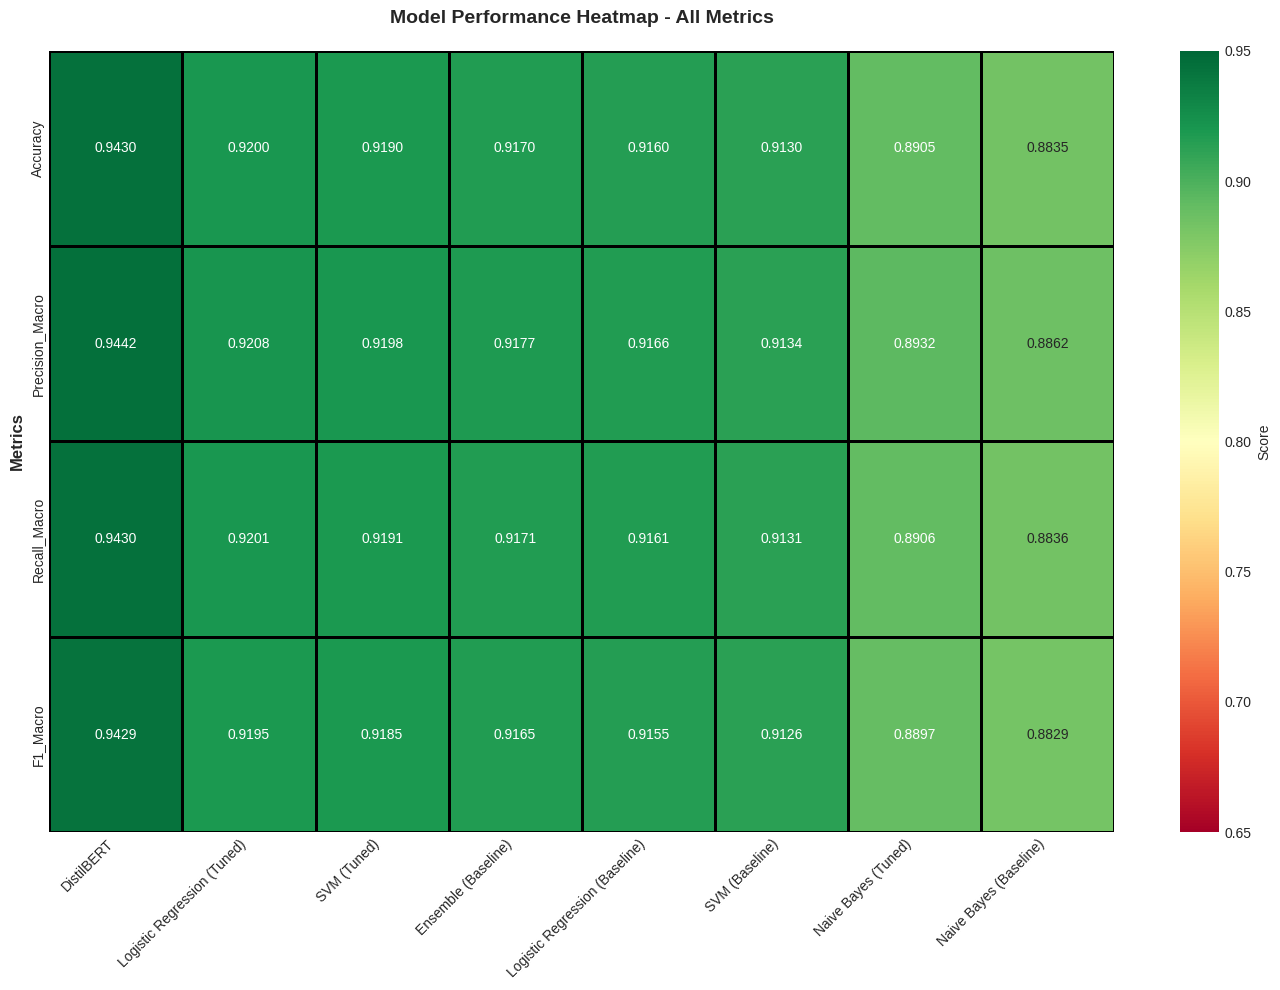

In [152]:
# Plot 2: Heatmap of All Metrics
fig, ax = plt.subplots(figsize=(14, 10))

# Prepare data for heatmap
heatmap_data = metrics_df[['Model', 'Accuracy', 'Precision_Macro',
                             'Recall_Macro', 'F1_Macro']].set_index('Model')

sns.heatmap(heatmap_data.T, annot=True, fmt='.4f', cmap='RdYlGn',
            cbar_kws={'label': 'Score'}, linewidths=1, linecolor='black',
            vmin=0.65, vmax=0.95, ax=ax)

ax.set_xlabel('', fontsize=12, fontweight='bold')
ax.set_ylabel('Metrics', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Heatmap - All Metrics',
             fontsize=14, fontweight='bold', pad=20)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('models_heatmap_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


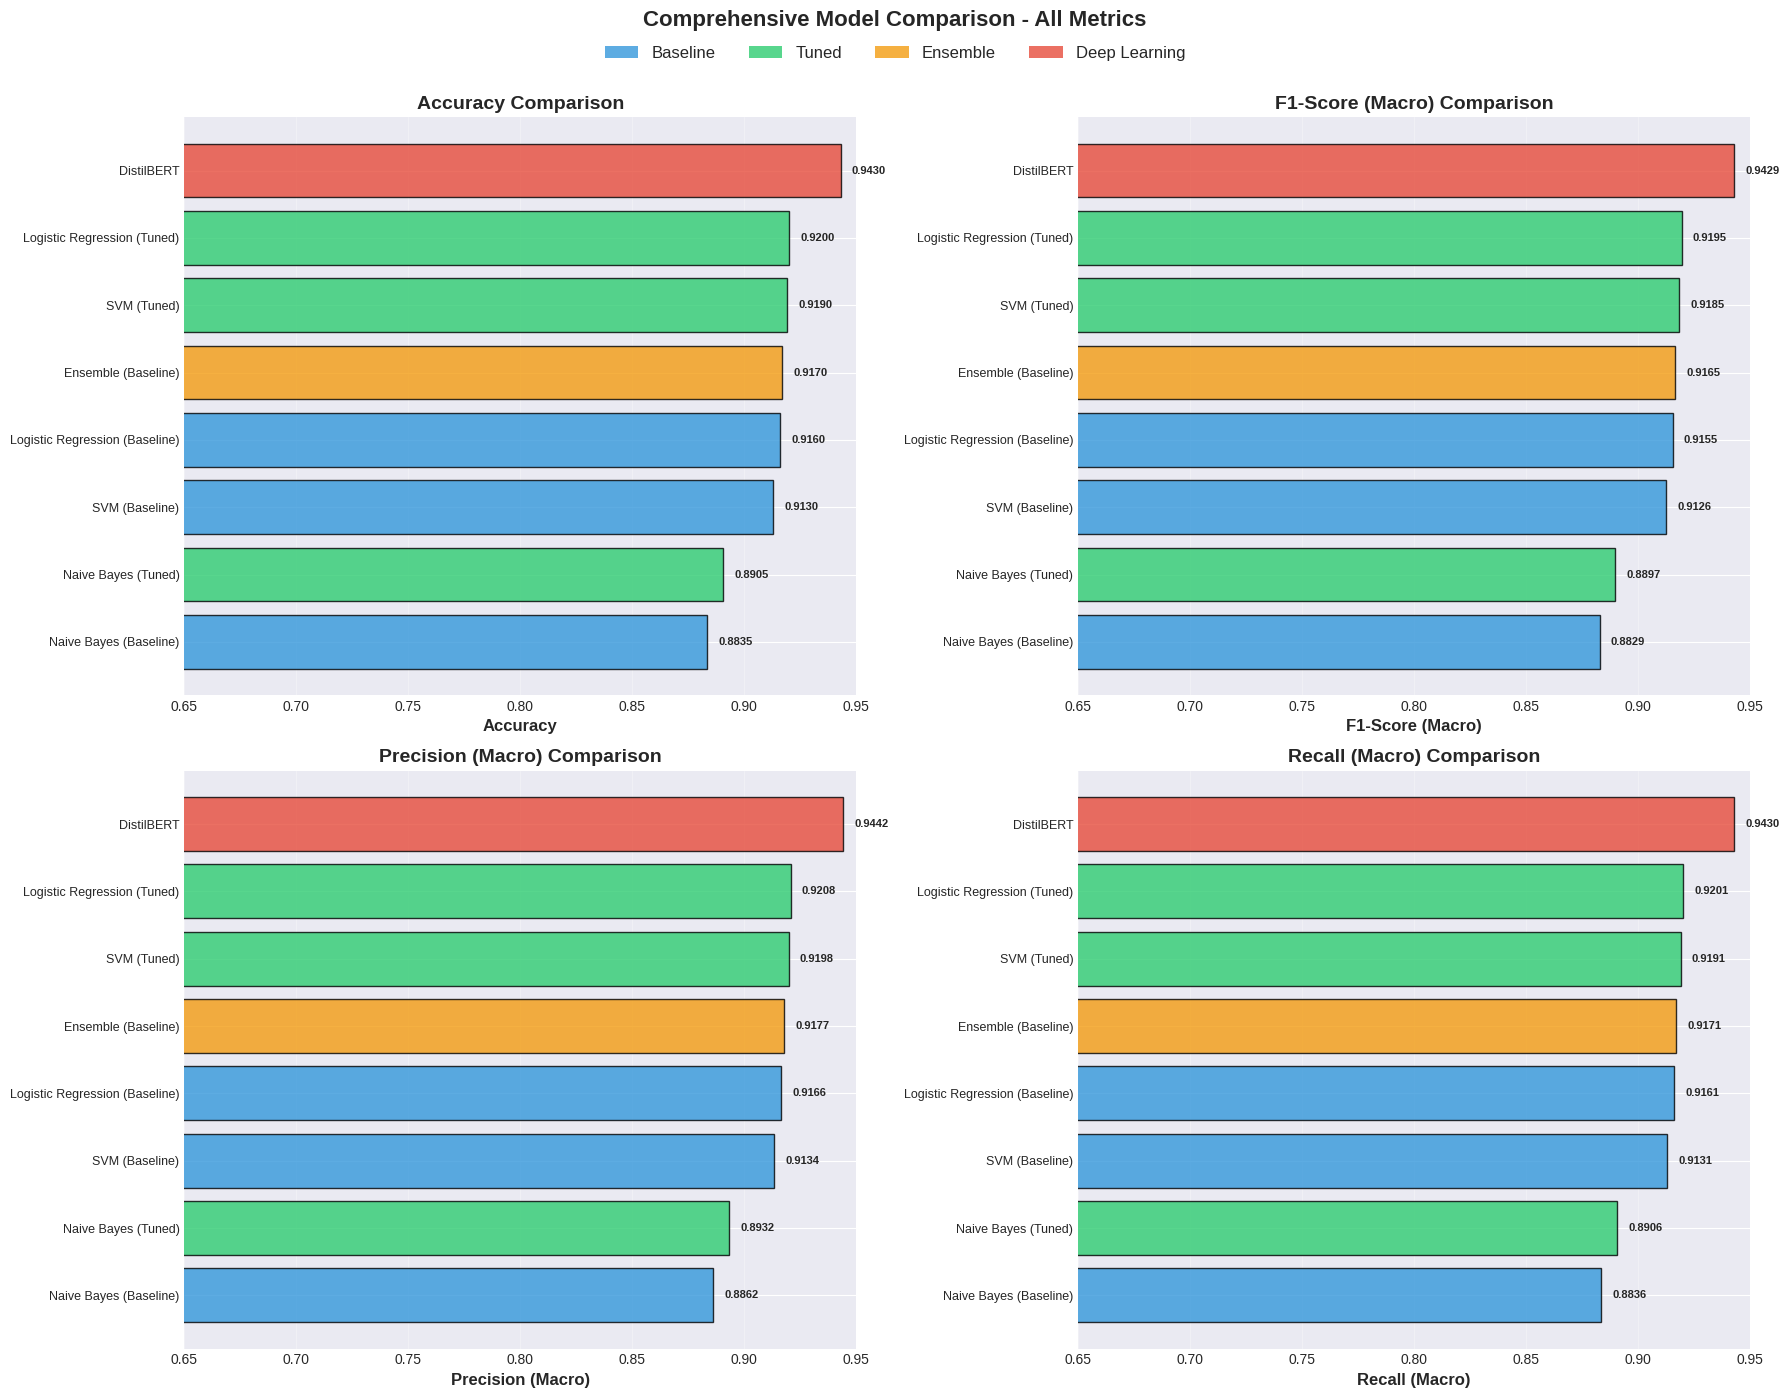

In [153]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

metrics_to_plot = [
    ('Accuracy', 'Accuracy'),
    ('F1_Macro', 'F1-Score (Macro)'),
    ('Precision_Macro', 'Precision (Macro)'),
    ('Recall_Macro', 'Recall (Macro)')
]

category_colors = {
    'Baseline': '#3498db',
    'Tuned': '#2ecc71',
    'Ensemble': '#f39c12',
    'Deep Learning': '#e74c3c'
}

for idx, (metric, title) in enumerate(metrics_to_plot):
    ax = axes[idx // 2, idx % 2]

    # Sort by this metric
    sorted_df = metrics_df.sort_values(metric, ascending=True)

    # Color by category
    colors = [category_colors[cat] for cat in sorted_df['Category']]

    bars = ax.barh(range(len(sorted_df)), sorted_df[metric],
                   color=colors, alpha=0.8, edgecolor='black')
    ax.set_yticks(range(len(sorted_df)))
    ax.set_yticklabels(sorted_df['Model'], fontsize=9)
    ax.set_xlabel(title, fontsize=12, fontweight='bold')
    ax.set_title(f'{title} Comparison', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')
    ax.set_xlim([0.65, 0.95])

    # Add value labels
    for bar, value in zip(bars, sorted_df[metric]):
        ax.text(value + 0.005, bar.get_y() + bar.get_height()/2,
                f'{value:.4f}',
                ha='left', va='center', fontweight='bold', fontsize=8)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=cat, alpha=0.8)
                   for cat, color in category_colors.items()]
fig.legend(handles=legend_elements, loc='upper center',
           bbox_to_anchor=(0.5, 0.98), ncol=4, fontsize=12)

plt.suptitle('Comprehensive Model Comparison - All Metrics',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig('comprehensive_bar_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

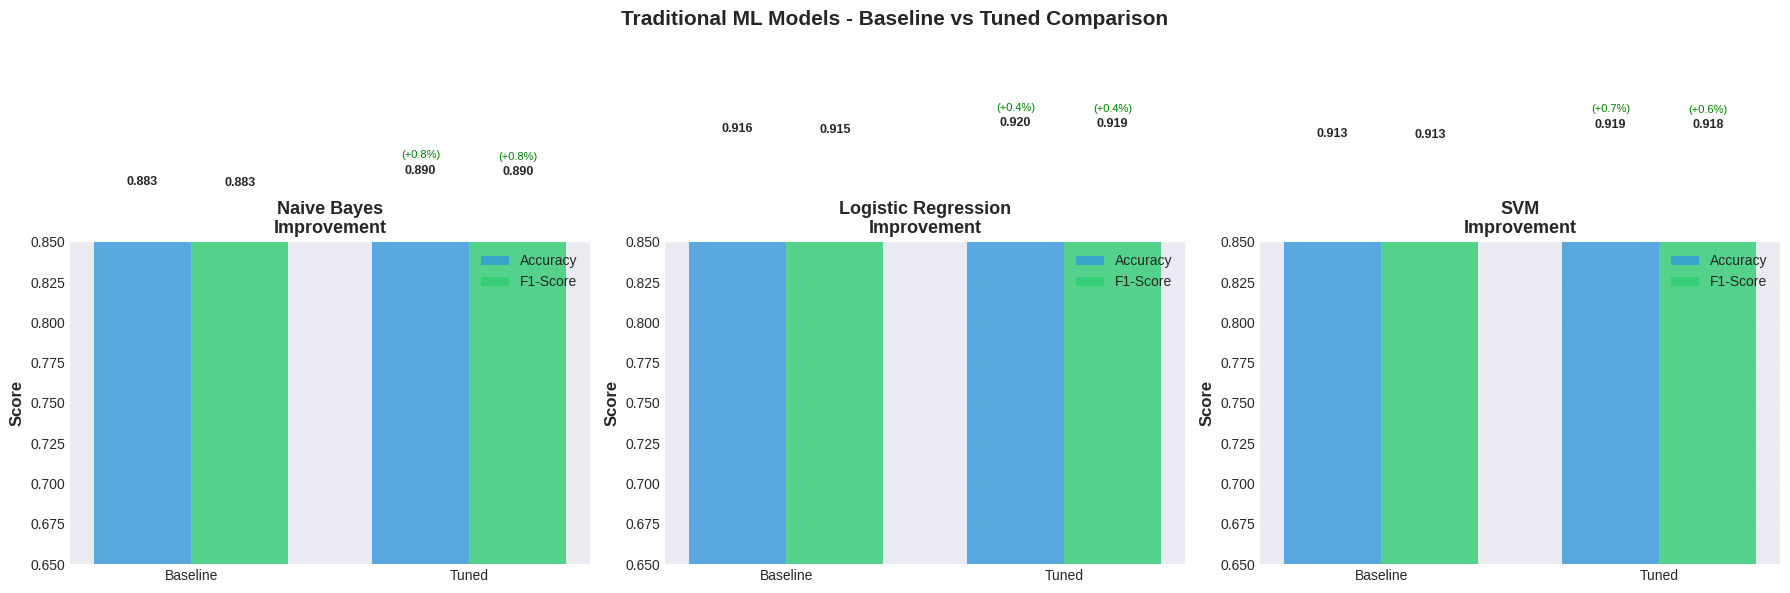

In [154]:
# Group by model type
progression = {
    'Naive Bayes': [
        ('Baseline', mnb_test_acc, f1_score(y_test, mnb_test_pred, average='macro')),
        ('Tuned', best_mnb_acc, best_mnb_f1)
    ],
    'Logistic Regression': [
        ('Baseline', lr_test_acc, f1_score(y_test, lr_test_pred, average='macro')),
        ('Tuned', best_lr_acc, best_lr_f1)
    ],
    'SVM': [
        ('Baseline', svm_test_acc, f1_score(y_test, svm_test_pred, average='macro')),
        ('Tuned', best_svm_acc, best_svm_f1)
    ]
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (model_type, improvements) in enumerate(progression.items()):
    ax = axes[idx]

    stages = [imp[0] for imp in improvements]
    accuracies = [imp[1] for imp in improvements]
    f1_scores = [imp[2] for imp in improvements]

    x = np.arange(len(stages))
    width = 0.35

    bars1 = ax.bar(x - width/2, accuracies, width, label='Accuracy',
                   alpha=0.8, color='#3498db')
    bars2 = ax.bar(x + width/2, f1_scores, width, label='F1-Score',
                   alpha=0.8, color='#2ecc71')

    ax.set_ylabel('Score', fontsize=12, fontweight='bold')
    ax.set_title(f'{model_type}\nImprovement', fontsize=13, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(stages)
    ax.legend()
    ax.set_ylim([0.65, 0.85])
    ax.grid(True, alpha=0.3, axis='y')

    # Add value labels and improvement percentages
    for bar_set in [bars1, bars2]:
        for i, bar in enumerate(bar_set):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}',
                    ha='center', va='bottom', fontweight='bold', fontsize=9)

            if i == 1:  # Show improvement for tuned version
                prev_height = bar_set[0].get_height()
                improvement = ((height - prev_height) / prev_height) * 100
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'(+{improvement:.1f}%)',
                        ha='center', va='bottom', fontsize=8, color='green')

plt.suptitle('Traditional ML Models - Baseline vs Tuned Comparison',
             fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('baseline_vs_tuned_progression.png', dpi=300, bbox_inches='tight')
plt.show()

In [155]:
print("\n" + "=" * 80)
print("FINAL SUMMARY & RECOMMENDATIONS")
print("=" * 80)

# Get best model from each category
best_baseline = metrics_df[metrics_df['Category'] == 'Baseline'].iloc[0]
best_tuned = metrics_df[metrics_df['Category'] == 'Tuned'].iloc[0]
best_ensemble = metrics_df[metrics_df['Category'] == 'Ensemble'].iloc[0]
best_dl = metrics_df[metrics_df['Category'] == 'Deep Learning'].iloc[0]

summary_comparison = pd.DataFrame([
    {
        'Category': 'Best Baseline',
        'Model': best_baseline['Model'],
        'Accuracy': best_baseline['Accuracy'],
        'F1-Score': best_baseline['F1_Macro']
    },
    {
        'Category': 'Best Tuned',
        'Model': best_tuned['Model'],
        'Accuracy': best_tuned['Accuracy'],
        'F1-Score': best_tuned['F1_Macro']
    },
    {
        'Category': 'Best Ensemble',
        'Model': best_ensemble['Model'],
        'Accuracy': best_ensemble['Accuracy'],
        'F1-Score': best_ensemble['F1_Macro']
    },
    {
        'Category': 'Best Overall (DL)',
        'Model': best_dl['Model'],
        'Accuracy': best_dl['Accuracy'],
        'F1-Score': best_dl['F1_Macro']
    }
])

print(summary_comparison.to_string(index=False))


FINAL SUMMARY & RECOMMENDATIONS
         Category                          Model  Accuracy  F1-Score
    Best Baseline Logistic Regression (Baseline)     0.916  0.915494
       Best Tuned    Logistic Regression (Tuned)     0.920  0.919459
    Best Ensemble            Ensemble (Baseline)     0.917  0.916483
Best Overall (DL)                     DistilBERT     0.943  0.942864


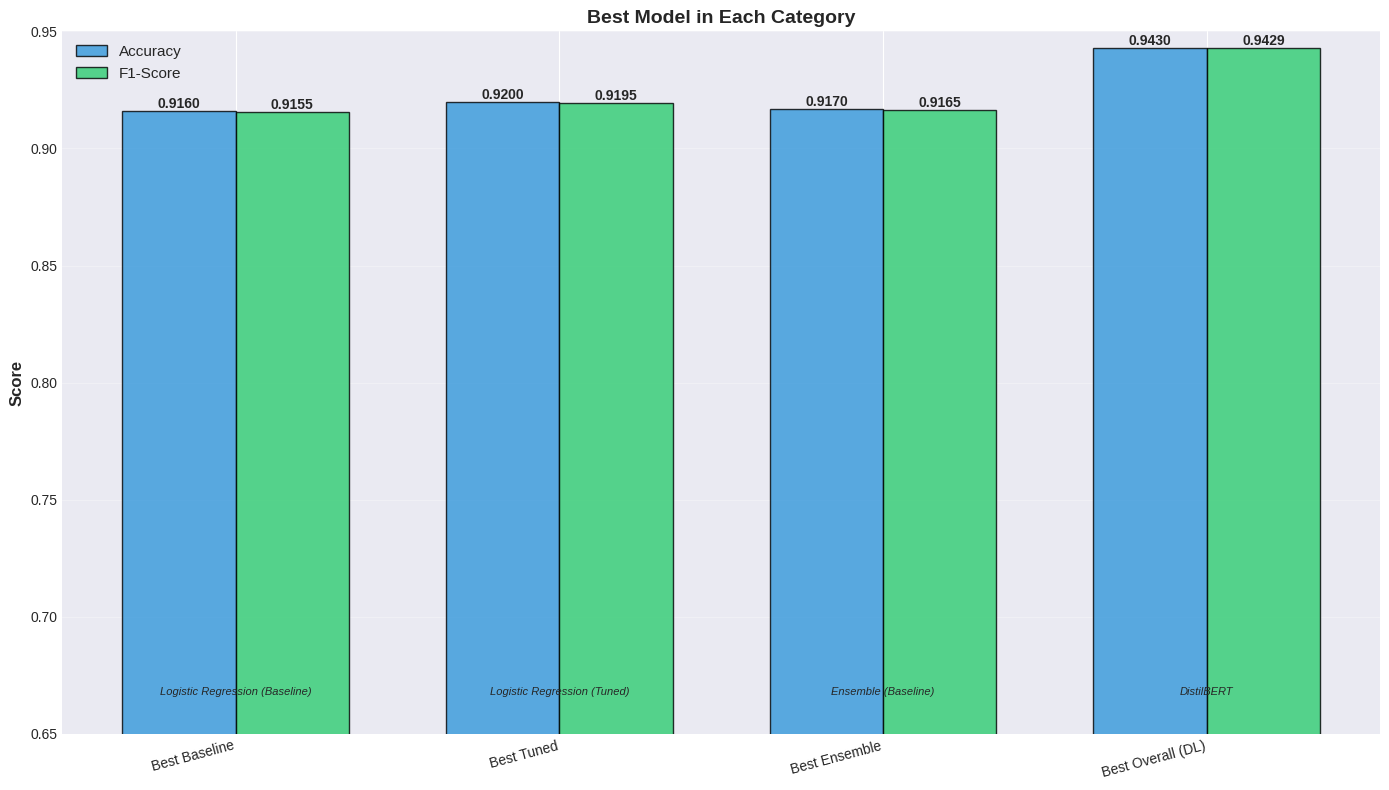

In [156]:
# Visualize category winners
fig, ax = plt.subplots(figsize=(14, 8))

categories = summary_comparison['Category']
accuracy = summary_comparison['Accuracy']
f1 = summary_comparison['F1-Score']

x = np.arange(len(categories))
width = 0.35

bars1 = ax.bar(x - width/2, accuracy, width, label='Accuracy',
               alpha=0.8, color='#3498db', edgecolor='black')
bars2 = ax.bar(x + width/2, f1, width, label='F1-Score',
               alpha=0.8, color='#2ecc71', edgecolor='black')

ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Best Model in Each Category', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=15, ha='right')
ax.legend(fontsize=11)
ax.set_ylim([0.65, 0.95])
ax.grid(True, alpha=0.3, axis='y')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

# Add model names below bars
for i, model in enumerate(summary_comparison['Model']):
    ax.text(i, 0.67, model, ha='center', va='top',
            fontsize=8, rotation=0, style='italic')

plt.tight_layout()
plt.savefig('category_winners_comparison.png', dpi=300, bbox_inches='tight')
plt.show()